In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

csv_file_path = r"D:\AI stylies\styles.csv"

# Load CSV, skipping problematic lines
data = pd.read_csv(csv_file_path, on_bad_lines='skip')

# Print the first few rows
print(data.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [5]:
# Display the initial shape and columns
print("Data Shape:", data.shape)
print("Columns:", data.columns)

Data Shape: (44424, 10)
Columns: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')


In [6]:
# Show the first 5 rows
print(data.head())

# Check data types and non-null count
print(data.info())

# Check for missing values
print(data).isnull().sum()

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column         

AttributeError: 'NoneType' object has no attribute 'isnull'

In [7]:
# Summary statistics for numerical columns
print(data.describe())

                 id          year
count  44424.000000  44423.000000
mean   29696.334301   2012.806497
std    17049.490518      2.126480
min     1163.000000   2007.000000
25%    14768.750000   2011.000000
50%    28618.500000   2012.000000
75%    44683.250000   2015.000000
max    60000.000000   2019.000000


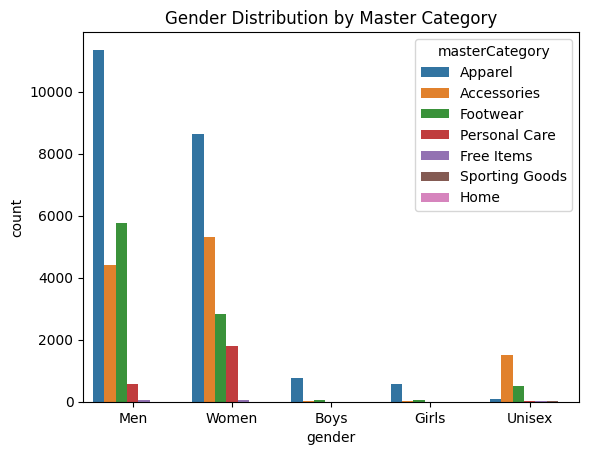

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='gender', hue='masterCategory')
plt.title('Gender Distribution by Master Category')
plt.show()

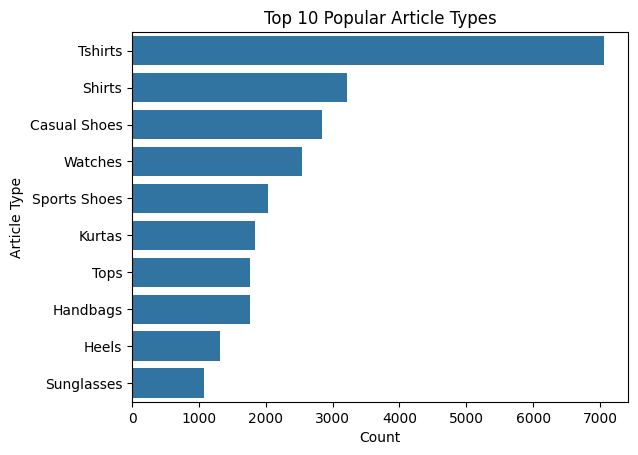

In [15]:
popular_articles = data['articleType'].value_counts().head(10)
sns.barplot(x=popular_articles.values, y=popular_articles.index)
plt.title('Top 10 Popular Article Types')
plt.xlabel('Count')
plt.ylabel('Article Type')
plt.show()


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess a single image
img_path = 'D:\\AI stylies\\images\\1163.jpg'
img = load_img(img_path, target_size=(224, 224))  # Resize image
img_array = img_to_array(img)  # Convert to array
img_array = img_array / 255.0  # Normalize
img_array = img_array.reshape((1, 224, 224, 3))  # Add batch dimension


In [1]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load Pretrained VGG16 Model
vgg_model = VGG16(weights='imagenet', include_top=False)

# Process a single image
img_path = 'D:\\AI stylies\\images\\1163.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = preprocess_input(img_array.reshape((1, 224, 224, 3)))

# Extract Features
features = vgg_model.predict(img_array)
print(features.shape)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 138s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
(1, 7, 7, 512)


In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Assume 'features' is an array of extracted image features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features.reshape(len(features), -1))
print(clusters)


ValueError: n_samples=1 should be >= n_clusters=5.

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense
from tensorflow.keras.models import Sequential

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a Sequential model
model = Sequential([
    base_model,
    GlobalMaxPooling2D(),
    Dense(256, activation='relu'),  # Fully connected layer with 256 units
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [2]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Path to the CSV file
csv_file_path = r"D:\AI stylies\styles.csv"
image_folder_path = r"D:\AI stylies\images"

# Load the CSV
df = pd.read_csv(csv_file_path)

# Step 1: Add a new column 'image_name' based on the 'id' column
df['image_name'] = df['id'].astype(str) + '.jpg'

df_subset = df.head(5000)

# Save the updated CSV (optional)
updated_csv_path = r"D:\AI stylies\updated_styles.csv"
df.to_csv(updated_csv_path, index=False)
print(f"Updated CSV saved to: {updated_csv_path}")

# Step 2: Generate image embeddings using VGG16
# Load the pre-trained VGG16 model (exclude the top layers)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract embeddings
def extract_embedding(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Generate features using VGG16
        features = vgg16_model.predict(img_array)
        return features.flatten()  # Flatten to 1D array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Initialize a list to store embeddings
embeddings = []

# Loop through the images and generate embeddings
for image_name in tqdm(df['image_name'], desc="Generating embeddings"):
    image_path = os.path.join(image_folder_path, image_name)
    if os.path.exists(image_path):
        embedding = extract_embedding(image_path)
        if embedding is not None:
            embeddings.append(embedding)
    else:
        print(f"Image not found: {image_path}")
        embeddings.append(None)

# Convert the embeddings list to a DataFrame (optional)
embeddings_df = pd.DataFrame(embeddings)
embeddings_df.to_csv(r"D:\AI stylies\image_embeddings.csv", index=False)
print("Image embeddings saved to: D:\\AI stylies\\image_embeddings.csv")


Updated CSV saved to: D:\AI stylies\updated_styles.csv


Generating embeddings:   0%|          | 0/44446 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 1/44446 [00:01<16:58:18,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Generating embeddings:   0%|          | 2/44446 [00:02<12:21:27,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings:   0%|          | 3/44446 [00:02<9:37:04,  1.28it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings:   0%|          | 4/44446 [00:03<8:18:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings:   0%|          | 5/44446 [00:03<7:31:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings:   0%|          | 6/44446 [00:04<7:00:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings:   0%|          | 7/44446 [00:04<6:45:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings:   0%|          | 8/44446 [00:05<6:41:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings:   0%|          | 9/44446 [00:05<6:32:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings:   0%|          | 10/44446 [00:06<6:27:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings:   0%|          | 11/44446 [00:06<6:21:37,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings:   0%|          | 12/44446 [00:07<6:19:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings:   0%|          | 13/44446 [00:07<6:15:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings:   0%|          | 14/44446 [00:08<6:15:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings:   0%|          | 15/44446 [00:08<6:13:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   0%|          | 16/44446 [00:09<6:18:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings:   0%|          | 17/44446 [00:09<6:16:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   0%|          | 18/44446 [00:10<6:23:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step


Generating embeddings:   0%|          | 19/44446 [00:11<8:28:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Generating embeddings:   0%|          | 20/44446 [00:12<9:05:07,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings:   0%|          | 21/44446 [00:12<8:28:17,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings:   0%|          | 22/44446 [00:13<7:49:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings:   0%|          | 23/44446 [00:13<7:24:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings:   0%|          | 24/44446 [00:14<7:24:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings:   0%|          | 25/44446 [00:14<7:05:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings:   0%|          | 26/44446 [00:15<7:28:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings:   0%|          | 27/44446 [00:16<7:26:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings:   0%|          | 28/44446 [00:16<7:39:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 29/44446 [00:18<9:57:26,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Generating embeddings:   0%|          | 30/44446 [00:18<10:21:20,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Generating embeddings:   0%|          | 31/44446 [00:19<10:16:41,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings:   0%|          | 32/44446 [00:20<9:29:49,  1.30it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step


Generating embeddings:   0%|          | 33/44446 [00:21<10:13:05,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Generating embeddings:   0%|          | 34/44446 [00:22<11:15:52,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Generating embeddings:   0%|          | 35/44446 [00:23<11:02:01,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Generating embeddings:   0%|          | 36/44446 [00:24<10:23:58,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings:   0%|          | 37/44446 [00:24<9:34:01,  1.29it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Generating embeddings:   0%|          | 38/44446 [00:25<9:46:38,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Generating embeddings:   0%|          | 39/44446 [00:26<9:53:14,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings:   0%|          | 40/44446 [00:26<8:55:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings:   0%|          | 41/44446 [00:27<8:06:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings:   0%|          | 42/44446 [00:27<7:33:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings:   0%|          | 43/44446 [00:28<7:10:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 950ms/step


Generating embeddings:   0%|          | 44/44446 [00:29<8:46:36,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Generating embeddings:   0%|          | 45/44446 [00:30<8:55:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings:   0%|          | 46/44446 [00:30<8:48:19,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings:   0%|          | 47/44446 [00:31<8:46:09,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings:   0%|          | 48/44446 [00:32<8:14:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings:   0%|          | 49/44446 [00:32<7:43:21,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings:   0%|          | 50/44446 [00:33<7:25:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings:   0%|          | 51/44446 [00:33<7:14:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings:   0%|          | 52/44446 [00:34<7:10:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings:   0%|          | 53/44446 [00:34<7:03:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings:   0%|          | 54/44446 [00:35<6:57:56,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings:   0%|          | 55/44446 [00:35<6:49:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings:   0%|          | 56/44446 [00:36<6:49:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings:   0%|          | 57/44446 [00:37<7:00:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Generating embeddings:   0%|          | 58/44446 [00:37<7:48:27,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Generating embeddings:   0%|          | 59/44446 [00:38<8:22:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


Generating embeddings:   0%|          | 60/44446 [00:39<8:58:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings:   0%|          | 61/44446 [00:40<8:31:27,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings:   0%|          | 62/44446 [00:40<8:11:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 63/44446 [00:41<10:17:40,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Generating embeddings:   0%|          | 64/44446 [00:42<10:30:16,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step


Generating embeddings:   0%|          | 65/44446 [00:43<11:16:49,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings:   0%|          | 66/44446 [00:44<10:01:43,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings:   0%|          | 67/44446 [00:45<9:08:26,  1.35it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings:   0%|          | 68/44446 [00:45<8:23:00,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings:   0%|          | 69/44446 [00:46<8:06:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step


Generating embeddings:   0%|          | 70/44446 [00:47<9:34:09,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


Generating embeddings:   0%|          | 71/44446 [00:48<10:24:39,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step


Generating embeddings:   0%|          | 72/44446 [00:49<10:49:21,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings:   0%|          | 73/44446 [00:49<10:03:38,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings:   0%|          | 74/44446 [00:50<8:58:44,  1.37it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings:   0%|          | 75/44446 [00:50<8:21:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings:   0%|          | 76/44446 [00:51<7:51:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings:   0%|          | 77/44446 [00:52<7:28:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings:   0%|          | 78/44446 [00:52<7:14:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings:   0%|          | 79/44446 [00:53<7:03:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings:   0%|          | 80/44446 [00:53<6:57:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   0%|          | 81/44446 [00:54<6:50:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings:   0%|          | 82/44446 [00:54<7:04:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings:   0%|          | 83/44446 [00:55<6:59:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings:   0%|          | 84/44446 [00:55<6:55:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


Generating embeddings:   0%|          | 85/44446 [00:56<8:16:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Generating embeddings:   0%|          | 86/44446 [00:57<8:43:07,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings:   0%|          | 87/44446 [00:58<8:26:20,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Generating embeddings:   0%|          | 88/44446 [00:59<9:00:09,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings:   0%|          | 89/44446 [00:59<8:32:43,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings:   0%|          | 90/44446 [01:00<8:12:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings:   0%|          | 91/44446 [01:00<7:48:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   0%|          | 92/44446 [01:01<7:33:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings:   0%|          | 93/44446 [01:02<7:24:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   0%|          | 94/44446 [01:02<7:36:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings:   0%|          | 95/44446 [01:03<7:30:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings:   0%|          | 96/44446 [01:03<7:30:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings:   0%|          | 97/44446 [01:04<7:27:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings:   0%|          | 98/44446 [01:05<7:20:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings:   0%|          | 99/44446 [01:05<7:12:03,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings:   0%|          | 100/44446 [01:06<7:11:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step


Generating embeddings:   0%|          | 101/44446 [01:07<8:59:11,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


Generating embeddings:   0%|          | 102/44446 [01:08<9:18:46,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings:   0%|          | 103/44446 [01:08<8:49:41,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings:   0%|          | 104/44446 [01:09<8:23:25,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings:   0%|          | 105/44446 [01:09<8:01:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings:   0%|          | 106/44446 [01:10<8:46:40,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings:   0%|          | 107/44446 [01:11<8:26:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings:   0%|          | 108/44446 [01:11<8:05:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings:   0%|          | 109/44446 [01:12<7:52:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings:   0%|          | 110/44446 [01:13<7:36:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings:   0%|          | 111/44446 [01:13<7:29:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings:   0%|          | 112/44446 [01:14<7:23:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings:   0%|          | 113/44446 [01:14<7:20:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings:   0%|          | 114/44446 [01:15<7:24:00,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings:   0%|          | 115/44446 [01:16<7:24:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings:   0%|          | 116/44446 [01:16<7:32:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings:   0%|          | 117/44446 [01:17<7:33:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


Generating embeddings:   0%|          | 118/44446 [01:18<8:10:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings:   0%|          | 119/44446 [01:18<7:49:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings:   0%|          | 120/44446 [01:19<7:54:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings:   0%|          | 121/44446 [01:20<8:01:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings:   0%|          | 122/44446 [01:20<7:43:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings:   0%|          | 123/44446 [01:21<7:28:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings:   0%|          | 124/44446 [01:21<7:22:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings:   0%|          | 125/44446 [01:22<7:12:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings:   0%|          | 126/44446 [01:22<7:05:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings:   0%|          | 127/44446 [01:23<6:56:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings:   0%|          | 128/44446 [01:23<6:55:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings:   0%|          | 129/44446 [01:24<7:00:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings:   0%|          | 130/44446 [01:25<6:57:04,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings:   0%|          | 131/44446 [01:25<7:06:31,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings:   0%|          | 132/44446 [01:26<7:01:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings:   0%|          | 133/44446 [01:26<6:55:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings:   0%|          | 134/44446 [01:27<6:52:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings:   0%|          | 135/44446 [01:27<6:50:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings:   0%|          | 136/44446 [01:28<6:49:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Generating embeddings:   0%|          | 137/44446 [01:29<7:43:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step


Generating embeddings:   0%|          | 138/44446 [01:30<9:15:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


Generating embeddings:   0%|          | 139/44446 [01:31<9:35:00,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Generating embeddings:   0%|          | 140/44446 [01:32<10:45:51,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


Generating embeddings:   0%|          | 141/44446 [01:33<11:18:06,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 142/44446 [01:34<12:17:13,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings:   0%|          | 143/44446 [01:35<10:47:12,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings:   0%|          | 144/44446 [01:35<9:47:17,  1.26it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings:   0%|          | 145/44446 [01:36<9:16:10,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


Generating embeddings:   0%|          | 146/44446 [01:37<10:06:43,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 147/44446 [01:38<11:32:32,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Generating embeddings:   0%|          | 148/44446 [01:39<11:24:27,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Generating embeddings:   0%|          | 149/44446 [01:40<10:49:22,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Generating embeddings:   0%|          | 150/44446 [01:41<10:47:53,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings:   0%|          | 151/44446 [01:41<9:52:22,  1.25it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings:   0%|          | 152/44446 [01:42<9:02:58,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings:   0%|          | 153/44446 [01:42<8:25:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings:   0%|          | 154/44446 [01:43<7:59:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings:   0%|          | 155/44446 [01:43<7:42:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings:   0%|          | 156/44446 [01:44<7:28:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings:   0%|          | 157/44446 [01:45<7:21:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings:   0%|          | 158/44446 [01:45<7:12:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings:   0%|          | 159/44446 [01:46<7:05:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings:   0%|          | 160/44446 [01:46<7:00:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings:   0%|          | 161/44446 [01:47<6:59:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings:   0%|          | 162/44446 [01:47<7:13:28,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings:   0%|          | 163/44446 [01:48<7:09:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings:   0%|          | 164/44446 [01:49<7:06:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings:   0%|          | 165/44446 [01:49<6:59:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings:   0%|          | 166/44446 [01:50<6:55:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings:   0%|          | 167/44446 [01:50<6:53:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings:   0%|          | 168/44446 [01:51<6:55:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Generating embeddings:   0%|          | 169/44446 [01:52<8:00:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


Generating embeddings:   0%|          | 170/44446 [01:53<9:18:27,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 171/44446 [01:54<10:49:45,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


Generating embeddings:   0%|          | 172/44446 [01:55<10:47:16,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 173/44446 [01:56<12:08:06,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Generating embeddings:   0%|          | 174/44446 [01:57<11:48:46,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 175/44446 [01:58<12:23:50,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Generating embeddings:   0%|          | 176/44446 [01:59<12:05:08,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 177/44446 [02:00<13:45:49,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Generating embeddings:   0%|          | 178/44446 [02:01<12:50:21,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step


Generating embeddings:   0%|          | 179/44446 [02:02<12:58:50,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings:   0%|          | 180/44446 [02:03<11:19:56,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings:   0%|          | 181/44446 [02:03<10:07:01,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings:   0%|          | 182/44446 [02:04<9:25:52,  1.30it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings:   0%|          | 183/44446 [02:05<8:37:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings:   0%|          | 184/44446 [02:05<8:04:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings:   0%|          | 185/44446 [02:06<7:41:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings:   0%|          | 186/44446 [02:06<7:23:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings:   0%|          | 187/44446 [02:07<7:25:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings:   0%|          | 188/44446 [02:07<7:16:28,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings:   0%|          | 189/44446 [02:08<7:19:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings:   0%|          | 190/44446 [02:09<7:07:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Generating embeddings:   0%|          | 191/44446 [02:09<8:09:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


Generating embeddings:   0%|          | 192/44446 [02:11<9:40:43,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step


Generating embeddings:   0%|          | 193/44446 [02:12<10:21:35,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 937ms/step


Generating embeddings:   0%|          | 194/44446 [02:13<10:56:42,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings:   0%|          | 195/44446 [02:14<12:05:23,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings:   0%|          | 196/44446 [02:15<11:43:21,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Generating embeddings:   0%|          | 197/44446 [02:15<11:02:25,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Generating embeddings:   0%|          | 198/44446 [02:16<11:14:55,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Generating embeddings:   0%|          | 199/44446 [02:17<10:50:07,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings:   0%|          | 200/44446 [02:18<10:02:05,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings:   0%|          | 201/44446 [02:18<9:23:52,  1.31it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings:   0%|          | 202/44446 [02:19<8:54:30,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings:   0%|          | 203/44446 [02:20<8:36:46,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings:   0%|          | 204/44446 [02:20<8:14:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings:   0%|          | 205/44446 [02:21<8:03:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings:   0%|          | 206/44446 [02:22<7:42:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


Generating embeddings:   0%|          | 207/44446 [02:22<8:12:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings:   0%|          | 208/44446 [02:23<8:25:27,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings:   0%|          | 209/44446 [02:24<8:07:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings:   0%|          | 210/44446 [02:24<8:13:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings:   0%|          | 211/44446 [02:25<7:44:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings:   0%|          | 212/44446 [02:25<7:26:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   0%|          | 213/44446 [02:26<7:11:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings:   0%|          | 214/44446 [02:26<7:03:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   0%|          | 215/44446 [02:27<6:56:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   0%|          | 216/44446 [02:28<6:51:08,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings:   0%|          | 217/44446 [02:28<6:46:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings:   0%|          | 218/44446 [02:29<6:41:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings:   0%|          | 219/44446 [02:29<6:40:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings:   0%|          | 220/44446 [02:30<6:38:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings:   0%|          | 221/44446 [02:30<6:37:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings:   0%|          | 222/44446 [02:31<7:01:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings:   1%|          | 223/44446 [02:31<6:52:43,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings:   1%|          | 224/44446 [02:32<6:51:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings:   1%|          | 225/44446 [02:32<6:47:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings:   1%|          | 226/44446 [02:33<6:44:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings:   1%|          | 227/44446 [02:34<6:38:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings:   1%|          | 228/44446 [02:34<6:37:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings:   1%|          | 229/44446 [02:35<7:11:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings:   1%|          | 230/44446 [02:35<7:34:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings:   1%|          | 231/44446 [02:36<7:39:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings:   1%|          | 232/44446 [02:37<8:00:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings:   1%|          | 233/44446 [02:37<7:43:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Generating embeddings:   1%|          | 234/44446 [02:38<8:19:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings:   1%|          | 235/44446 [02:39<7:59:27,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings:   1%|          | 236/44446 [02:39<7:49:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings:   1%|          | 237/44446 [02:40<7:35:06,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings:   1%|          | 238/44446 [02:41<7:34:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   1%|          | 239/44446 [02:41<7:20:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings:   1%|          | 240/44446 [02:42<7:06:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings:   1%|          | 241/44446 [02:42<6:58:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   1%|          | 242/44446 [02:43<6:56:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings:   1%|          | 243/44446 [02:43<7:04:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings:   1%|          | 244/44446 [02:44<7:00:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings:   1%|          | 245/44446 [02:44<6:54:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings:   1%|          | 246/44446 [02:45<7:16:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings:   1%|          | 247/44446 [02:46<7:12:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings:   1%|          | 248/44446 [02:46<7:10:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings:   1%|          | 249/44446 [02:47<7:25:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings:   1%|          | 250/44446 [02:48<7:27:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Generating embeddings:   1%|          | 251/44446 [02:48<8:10:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step


Generating embeddings:   1%|          | 252/44446 [02:49<9:30:45,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step


Generating embeddings:   1%|          | 253/44446 [02:50<10:21:44,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings:   1%|          | 254/44446 [02:51<9:35:36,  1.28it/s] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings:   1%|          | 255/44446 [02:52<8:44:38,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings:   1%|          | 256/44446 [02:52<8:42:00,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings:   1%|          | 257/44446 [02:53<8:35:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings:   1%|          | 258/44446 [02:54<8:00:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings:   1%|          | 259/44446 [02:54<7:37:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings:   1%|          | 260/44446 [02:55<8:17:38,  1.48it/s]


KeyboardInterrupt: 

In [3]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Path to the CSV file
csv_file_path = r"D:\AI stylies\styles.csv"
image_folder_path = r"D:\AI stylies\images"

# Load the CSV
df = pd.read_csv(csv_file_path)

# Step 1: Add a new column 'image_name' based on the 'id' column
df['image_name'] = df['id'].astype(str) + '.jpg'

# Limit to the first 5000 images
df_subset = df.head(5000)

# Save the updated CSV (optional)
updated_csv_path = r"D:\AI stylies\updated_styles_5000.csv"
df_subset.to_csv(updated_csv_path, index=False)
print(f"Updated CSV with first 5000 entries saved to: {updated_csv_path}")

# Step 2: Generate image embeddings using VGG16
# Load the pre-trained VGG16 model (exclude the top layers)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract embeddings
def extract_embedding(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Generate features using VGG16
        features = vgg16_model.predict(img_array)
        return features.flatten()  # Flatten to 1D array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Initialize a list to store embeddings
embeddings = []

# Loop through the first 5000 images and generate embeddings
for image_name in tqdm(df_subset['image_name'], desc="Generating embeddings for 5000 images"):
    image_path = os.path.join(image_folder_path, image_name)
    if os.path.exists(image_path):
        embedding = extract_embedding(image_path)
        if embedding is not None:
            embeddings.append(embedding)
    else:
        print(f"Image not found: {image_path}")
        embeddings.append(None)

# Convert the embeddings list to a DataFrame (optional)``````````````````````````````````````````````````````````````````````````````````````````````````````````
embeddings_df = pd.DataFrame(embeddings)
embeddings_csv_path = r"D:\AI stylies\image_embeddings_5000.csv"
embeddings_df.to_csv(embeddings_csv_path, index=False)
print(f"Image embeddings for the first 5000 images saved to: {embeddings_csv_path}")


Updated CSV with first 5000 entries saved to: D:\AI stylies\updated_styles_5000.csv


Generating embeddings for 5000 images:   0%|          | 0/5000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Generating embeddings for 5000 images:   0%|          | 1/5000 [00:00<1:07:24,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:   0%|          | 2/5000 [00:01<49:23,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   0%|          | 3/5000 [00:01<42:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:   0%|          | 4/5000 [00:02<39:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:   0%|          | 5/5000 [00:02<38:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:   0%|          | 6/5000 [00:03<39:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:   0%|          | 7/5000 [00:03<39:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:   0%|          | 8/5000 [00:03<38:40,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:   0%|          | 9/5000 [00:04<37:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:   0%|          | 10/5000 [00:04<37:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:   0%|          | 11/5000 [00:05<37:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:   0%|          | 12/5000 [00:05<37:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:   0%|          | 13/5000 [00:06<36:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:   0%|          | 14/5000 [00:06<36:32,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:   0%|          | 15/5000 [00:07<36:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:   0%|          | 16/5000 [00:07<37:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:   0%|          | 17/5000 [00:07<38:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:   0%|          | 18/5000 [00:08<38:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:   0%|          | 19/5000 [00:08<37:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:   0%|          | 20/5000 [00:09<37:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:   0%|          | 21/5000 [00:09<36:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:   0%|          | 22/5000 [00:10<37:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Generating embeddings for 5000 images:   0%|          | 23/5000 [00:10<37:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   0%|          | 24/5000 [00:11<35:33,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:   0%|          | 25/5000 [00:11<34:54,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:   1%|          | 26/5000 [00:11<37:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   1%|          | 27/5000 [00:12<35:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:   1%|          | 28/5000 [00:12<35:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:   1%|          | 29/5000 [00:13<34:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   1%|          | 30/5000 [00:13<33:38,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   1%|          | 31/5000 [00:13<33:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:   1%|          | 32/5000 [00:14<32:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:   1%|          | 33/5000 [00:14<32:58,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Generating embeddings for 5000 images:   1%|          | 34/5000 [00:15<32:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:   1%|          | 35/5000 [00:15<32:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   1%|          | 36/5000 [00:15<32:24,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   1%|          | 37/5000 [00:16<32:12,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Generating embeddings for 5000 images:   1%|          | 38/5000 [00:16<31:32,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:   1%|          | 39/5000 [00:17<32:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:   1%|          | 40/5000 [00:17<34:35,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:   1%|          | 41/5000 [00:17<33:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   1%|          | 42/5000 [00:18<33:18,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:   1%|          | 43/5000 [00:18<33:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:   1%|          | 44/5000 [00:19<33:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:   1%|          | 45/5000 [00:19<33:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   1%|          | 46/5000 [00:19<33:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:   1%|          | 47/5000 [00:20<32:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   1%|          | 48/5000 [00:20<32:30,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   1%|          | 49/5000 [00:21<33:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:   1%|          | 50/5000 [00:21<33:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   1%|          | 51/5000 [00:21<32:50,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:   1%|          | 52/5000 [00:22<33:01,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   1%|          | 53/5000 [00:22<32:36,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   1%|          | 54/5000 [00:23<32:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


Generating embeddings for 5000 images:   1%|          | 55/5000 [00:24<46:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


Generating embeddings for 5000 images:   1%|          | 56/5000 [00:25<56:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step


Generating embeddings for 5000 images:   1%|          | 57/5000 [00:26<1:06:06,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step


Generating embeddings for 5000 images:   1%|          | 58/5000 [00:27<1:10:21,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:   1%|          | 59/5000 [00:27<1:00:32,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:   1%|          | 60/5000 [00:27<52:54,  1.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:   1%|          | 61/5000 [00:28<47:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   1%|          | 62/5000 [00:28<44:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:   1%|▏         | 63/5000 [00:29<41:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:   1%|▏         | 64/5000 [00:29<39:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   1%|▏         | 65/5000 [00:30<39:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   1%|▏         | 66/5000 [00:30<38:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   1%|▏         | 67/5000 [00:30<37:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:   1%|▏         | 68/5000 [00:31<37:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   1%|▏         | 69/5000 [00:31<36:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:   1%|▏         | 70/5000 [00:32<36:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   1%|▏         | 71/5000 [00:32<35:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:   1%|▏         | 72/5000 [00:33<36:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:   1%|▏         | 73/5000 [00:33<36:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   1%|▏         | 74/5000 [00:34<36:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   2%|▏         | 75/5000 [00:34<36:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:   2%|▏         | 76/5000 [00:34<36:10,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   2%|▏         | 77/5000 [00:35<36:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   2%|▏         | 78/5000 [00:35<35:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:   2%|▏         | 79/5000 [00:36<36:05,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   2%|▏         | 80/5000 [00:36<35:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:   2%|▏         | 81/5000 [00:37<36:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   2%|▏         | 82/5000 [00:37<34:40,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   2%|▏         | 83/5000 [00:37<33:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:   2%|▏         | 84/5000 [00:38<33:07,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   2%|▏         | 85/5000 [00:38<33:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   2%|▏         | 86/5000 [00:39<32:33,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   2%|▏         | 87/5000 [00:39<32:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Generating embeddings for 5000 images:   2%|▏         | 88/5000 [00:39<31:45,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:   2%|▏         | 89/5000 [00:40<31:46,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Generating embeddings for 5000 images:   2%|▏         | 90/5000 [00:40<31:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   2%|▏         | 91/5000 [00:41<31:48,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:   2%|▏         | 92/5000 [00:41<31:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   2%|▏         | 93/5000 [00:41<31:42,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   2%|▏         | 94/5000 [00:42<32:26,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:   2%|▏         | 95/5000 [00:42<32:18,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   2%|▏         | 96/5000 [00:42<32:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:   2%|▏         | 97/5000 [00:43<32:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   2%|▏         | 98/5000 [00:43<31:54,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   2%|▏         | 99/5000 [00:44<31:32,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Generating embeddings for 5000 images:   2%|▏         | 100/5000 [00:44<39:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Generating embeddings for 5000 images:   2%|▏         | 101/5000 [00:46<1:01:56,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


Generating embeddings for 5000 images:   2%|▏         | 102/5000 [00:47<1:03:18,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:   2%|▏         | 103/5000 [00:47<55:07,  1.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:   2%|▏         | 104/5000 [00:47<49:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:   2%|▏         | 105/5000 [00:48<45:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:   2%|▏         | 106/5000 [00:48<42:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:   2%|▏         | 107/5000 [00:49<40:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   2%|▏         | 108/5000 [00:49<38:47,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:   2%|▏         | 109/5000 [00:50<38:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:   2%|▏         | 110/5000 [00:50<39:05,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:   2%|▏         | 111/5000 [00:51<39:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:   2%|▏         | 112/5000 [00:51<38:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:   2%|▏         | 113/5000 [00:52<37:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:   2%|▏         | 114/5000 [00:52<37:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Generating embeddings for 5000 images:   2%|▏         | 115/5000 [00:53<46:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Generating embeddings for 5000 images:   2%|▏         | 116/5000 [00:54<53:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:   2%|▏         | 117/5000 [00:54<53:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:   2%|▏         | 118/5000 [00:55<50:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:   2%|▏         | 119/5000 [00:55<45:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:   2%|▏         | 120/5000 [00:56<43:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:   2%|▏         | 121/5000 [00:56<41:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   2%|▏         | 122/5000 [00:57<40:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   2%|▏         | 123/5000 [00:57<38:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:   2%|▏         | 124/5000 [00:58<37:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:   2%|▎         | 125/5000 [00:58<38:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:   3%|▎         | 126/5000 [00:58<38:18,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:   3%|▎         | 127/5000 [00:59<38:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:   3%|▎         | 128/5000 [00:59<38:21,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:   3%|▎         | 129/5000 [01:00<38:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:   3%|▎         | 130/5000 [01:00<37:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   3%|▎         | 131/5000 [01:01<37:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:   3%|▎         | 132/5000 [01:02<43:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Generating embeddings for 5000 images:   3%|▎         | 133/5000 [01:02<52:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Generating embeddings for 5000 images:   3%|▎         | 134/5000 [01:03<56:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:   3%|▎         | 135/5000 [01:04<53:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:   3%|▎         | 136/5000 [01:04<48:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:   3%|▎         | 137/5000 [01:05<46:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:   3%|▎         | 138/5000 [01:05<46:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:   3%|▎         | 139/5000 [01:06<43:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:   3%|▎         | 140/5000 [01:06<41:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:   3%|▎         | 141/5000 [01:07<40:15,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   3%|▎         | 142/5000 [01:07<39:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:   3%|▎         | 143/5000 [01:08<38:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:   3%|▎         | 144/5000 [01:08<38:54,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:   3%|▎         | 145/5000 [01:09<37:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:   3%|▎         | 146/5000 [01:09<38:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:   3%|▎         | 147/5000 [01:09<37:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:   3%|▎         | 148/5000 [01:10<37:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:   3%|▎         | 149/5000 [01:10<37:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:   3%|▎         | 150/5000 [01:11<38:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:   3%|▎         | 151/5000 [01:11<37:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:   3%|▎         | 152/5000 [01:12<37:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:   3%|▎         | 153/5000 [01:12<37:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:   3%|▎         | 154/5000 [01:13<37:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   3%|▎         | 155/5000 [01:13<37:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   3%|▎         | 156/5000 [01:14<36:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:   3%|▎         | 157/5000 [01:14<36:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   3%|▎         | 158/5000 [01:15<35:58,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   3%|▎         | 159/5000 [01:15<35:17,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   3%|▎         | 160/5000 [01:15<34:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   3%|▎         | 161/5000 [01:16<34:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   3%|▎         | 162/5000 [01:16<34:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:   3%|▎         | 163/5000 [01:17<34:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:   3%|▎         | 164/5000 [01:17<34:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   3%|▎         | 165/5000 [01:17<34:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:   3%|▎         | 166/5000 [01:18<33:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:   3%|▎         | 167/5000 [01:18<33:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:   3%|▎         | 168/5000 [01:19<33:26,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:   3%|▎         | 169/5000 [01:19<33:42,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:   3%|▎         | 170/5000 [01:20<35:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:   3%|▎         | 171/5000 [01:20<37:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Generating embeddings for 5000 images:   3%|▎         | 172/5000 [01:21<47:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:   3%|▎         | 173/5000 [01:22<49:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:   3%|▎         | 174/5000 [01:22<50:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:   4%|▎         | 175/5000 [01:23<50:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:   4%|▎         | 176/5000 [01:24<50:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:   4%|▎         | 177/5000 [01:24<48:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:   4%|▎         | 178/5000 [01:25<47:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:   4%|▎         | 179/5000 [01:25<45:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:   4%|▎         | 180/5000 [01:26<44:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:   4%|▎         | 181/5000 [01:26<44:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:   4%|▎         | 182/5000 [01:27<44:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:   4%|▎         | 183/5000 [01:27<43:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:   4%|▎         | 184/5000 [01:28<41:07,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:   4%|▎         | 185/5000 [01:28<40:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:   4%|▎         | 186/5000 [01:29<41:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:   4%|▎         | 187/5000 [01:29<39:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:   4%|▍         | 188/5000 [01:30<41:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:   4%|▍         | 189/5000 [01:30<41:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:   4%|▍         | 190/5000 [01:31<41:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:   4%|▍         | 191/5000 [01:31<43:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:   4%|▍         | 192/5000 [01:32<41:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:   4%|▍         | 193/5000 [01:32<40:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:   4%|▍         | 194/5000 [01:33<39:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:   4%|▍         | 195/5000 [01:33<39:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:   4%|▍         | 196/5000 [01:34<38:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:   4%|▍         | 197/5000 [01:34<42:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Generating embeddings for 5000 images:   4%|▍         | 198/5000 [01:35<50:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Generating embeddings for 5000 images:   4%|▍         | 199/5000 [01:36<54:54,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:   4%|▍         | 200/5000 [01:37<50:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:   4%|▍         | 201/5000 [01:37<48:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:   4%|▍         | 202/5000 [01:38<48:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:   4%|▍         | 203/5000 [01:38<45:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:   4%|▍         | 204/5000 [01:39<43:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:   4%|▍         | 205/5000 [01:39<42:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:   4%|▍         | 206/5000 [01:40<40:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:   4%|▍         | 207/5000 [01:40<40:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:   4%|▍         | 208/5000 [01:41<39:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Generating embeddings for 5000 images:   4%|▍         | 209/5000 [01:42<46:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


Generating embeddings for 5000 images:   4%|▍         | 210/5000 [01:42<55:54,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Generating embeddings for 5000 images:   4%|▍         | 211/5000 [01:43<59:23,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Generating embeddings for 5000 images:   4%|▍         | 212/5000 [01:44<1:00:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Generating embeddings for 5000 images:   4%|▍         | 213/5000 [01:45<1:02:03,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


Generating embeddings for 5000 images:   4%|▍         | 214/5000 [01:46<1:02:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


Generating embeddings for 5000 images:   4%|▍         | 215/5000 [01:47<1:02:47,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:   4%|▍         | 216/5000 [01:47<58:04,  1.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:   4%|▍         | 217/5000 [01:48<55:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:   4%|▍         | 218/5000 [01:48<53:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:   4%|▍         | 219/5000 [01:49<51:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:   4%|▍         | 220/5000 [01:50<50:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:   4%|▍         | 221/5000 [01:50<48:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:   4%|▍         | 222/5000 [01:51<47:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:   4%|▍         | 223/5000 [01:51<47:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:   4%|▍         | 224/5000 [01:52<45:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:   4%|▍         | 225/5000 [01:52<43:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:   5%|▍         | 226/5000 [01:53<43:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:   5%|▍         | 227/5000 [01:53<42:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:   5%|▍         | 228/5000 [01:54<42:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:   5%|▍         | 229/5000 [01:54<42:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:   5%|▍         | 230/5000 [01:55<41:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:   5%|▍         | 231/5000 [01:55<42:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:   5%|▍         | 232/5000 [01:56<42:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:   5%|▍         | 233/5000 [01:56<41:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:   5%|▍         | 234/5000 [01:57<40:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:   5%|▍         | 235/5000 [01:57<39:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:   5%|▍         | 236/5000 [01:58<40:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:   5%|▍         | 237/5000 [01:58<40:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:   5%|▍         | 238/5000 [01:59<39:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:   5%|▍         | 239/5000 [01:59<39:25,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   5%|▍         | 240/5000 [02:00<38:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:   5%|▍         | 241/5000 [02:00<37:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:   5%|▍         | 242/5000 [02:01<41:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:   5%|▍         | 243/5000 [02:01<40:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:   5%|▍         | 244/5000 [02:02<39:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:   5%|▍         | 245/5000 [02:02<39:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:   5%|▍         | 246/5000 [02:03<38:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Generating embeddings for 5000 images:   5%|▍         | 247/5000 [02:03<38:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:   5%|▍         | 248/5000 [02:04<37:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:   5%|▍         | 249/5000 [02:04<37:47,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:   5%|▌         | 250/5000 [02:05<37:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   5%|▌         | 251/5000 [02:05<35:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:   5%|▌         | 252/5000 [02:06<33:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Generating embeddings for 5000 images:   5%|▌         | 253/5000 [02:06<33:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:   5%|▌         | 254/5000 [02:06<32:30,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:   5%|▌         | 255/5000 [02:07<31:55,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   5%|▌         | 256/5000 [02:07<31:17,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:   5%|▌         | 257/5000 [02:08<32:30,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:   5%|▌         | 258/5000 [02:08<32:06,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:   5%|▌         | 259/5000 [02:08<31:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   5%|▌         | 260/5000 [02:09<30:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:   5%|▌         | 261/5000 [02:09<30:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   5%|▌         | 262/5000 [02:09<30:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   5%|▌         | 263/5000 [02:10<31:05,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:   5%|▌         | 264/5000 [02:10<31:18,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:   5%|▌         | 265/5000 [02:11<31:24,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:   5%|▌         | 266/5000 [02:11<31:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:   5%|▌         | 267/5000 [02:11<32:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:   5%|▌         | 268/5000 [02:12<31:29,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   5%|▌         | 269/5000 [02:12<31:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:   5%|▌         | 270/5000 [02:13<31:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   5%|▌         | 271/5000 [02:13<31:05,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:   5%|▌         | 272/5000 [02:13<30:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:   5%|▌         | 273/5000 [02:14<30:36,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:   5%|▌         | 274/5000 [02:14<30:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   6%|▌         | 275/5000 [02:15<30:24,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:   6%|▌         | 276/5000 [02:15<31:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   6%|▌         | 277/5000 [02:15<31:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   6%|▌         | 278/5000 [02:16<31:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:   6%|▌         | 279/5000 [02:16<30:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:   6%|▌         | 280/5000 [02:17<30:19,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   6%|▌         | 281/5000 [02:17<30:21,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:   6%|▌         | 282/5000 [02:17<30:15,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:   6%|▌         | 283/5000 [02:18<30:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:   6%|▌         | 284/5000 [02:18<30:26,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:   6%|▌         | 285/5000 [02:19<31:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   6%|▌         | 286/5000 [02:19<31:13,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:   6%|▌         | 287/5000 [02:19<30:56,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:   6%|▌         | 288/5000 [02:20<30:51,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:   6%|▌         | 289/5000 [02:20<30:26,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:   6%|▌         | 290/5000 [02:20<30:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:   6%|▌         | 291/5000 [02:21<30:36,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:   6%|▌         | 292/5000 [02:21<30:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   6%|▌         | 293/5000 [02:22<30:16,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:   6%|▌         | 294/5000 [02:22<31:26,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Generating embeddings for 5000 images:   6%|▌         | 295/5000 [02:22<30:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:   6%|▌         | 296/5000 [02:23<30:44,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:   6%|▌         | 297/5000 [02:23<30:51,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   6%|▌         | 298/5000 [02:24<30:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   6%|▌         | 299/5000 [02:24<30:30,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:   6%|▌         | 300/5000 [02:24<30:15,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   6%|▌         | 301/5000 [02:25<30:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   6%|▌         | 302/5000 [02:25<29:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:   6%|▌         | 303/5000 [02:26<32:11,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   6%|▌         | 304/5000 [02:26<31:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:   6%|▌         | 305/5000 [02:26<33:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   6%|▌         | 306/5000 [02:27<32:54,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Generating embeddings for 5000 images:   6%|▌         | 307/5000 [02:28<42:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Generating embeddings for 5000 images:   6%|▌         | 308/5000 [02:29<50:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Generating embeddings for 5000 images:   6%|▌         | 309/5000 [02:30<57:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Generating embeddings for 5000 images:   6%|▌         | 310/5000 [02:30<1:00:47,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


Generating embeddings for 5000 images:   6%|▌         | 311/5000 [02:31<1:05:03,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step


Generating embeddings for 5000 images:   6%|▌         | 312/5000 [02:32<1:07:06,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Generating embeddings for 5000 images:   6%|▋         | 313/5000 [02:33<1:08:25,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:   6%|▋         | 314/5000 [02:34<1:03:28,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:   6%|▋         | 315/5000 [02:34<57:03,  1.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Generating embeddings for 5000 images:   6%|▋         | 316/5000 [02:35<1:00:31,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Generating embeddings for 5000 images:   6%|▋         | 317/5000 [02:36<1:02:44,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Generating embeddings for 5000 images:   6%|▋         | 318/5000 [02:37<1:03:44,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step


Generating embeddings for 5000 images:   6%|▋         | 319/5000 [02:38<1:07:44,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Generating embeddings for 5000 images:   6%|▋         | 320/5000 [02:39<1:06:09,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:   6%|▋         | 321/5000 [02:39<59:44,  1.31it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:   6%|▋         | 322/5000 [02:40<52:27,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:   6%|▋         | 323/5000 [02:40<49:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:   6%|▋         | 324/5000 [02:41<47:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:   6%|▋         | 325/5000 [02:41<46:20,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:   7%|▋         | 326/5000 [02:42<44:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:   7%|▋         | 327/5000 [02:42<42:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:   7%|▋         | 328/5000 [02:43<40:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:   7%|▋         | 329/5000 [02:43<38:10,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:   7%|▋         | 330/5000 [02:44<37:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:   7%|▋         | 331/5000 [02:44<38:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:   7%|▋         | 332/5000 [02:45<38:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:   7%|▋         | 333/5000 [02:45<36:41,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:   7%|▋         | 334/5000 [02:46<40:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:   7%|▋         | 335/5000 [02:46<40:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:   7%|▋         | 336/5000 [02:47<39:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:   7%|▋         | 337/5000 [02:47<40:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:   7%|▋         | 338/5000 [02:48<42:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Generating embeddings for 5000 images:   7%|▋         | 339/5000 [02:49<50:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Generating embeddings for 5000 images:   7%|▋         | 340/5000 [02:50<55:46,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:   7%|▋         | 341/5000 [02:50<52:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:   7%|▋         | 342/5000 [02:51<50:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:   7%|▋         | 343/5000 [02:52<49:20,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:   7%|▋         | 344/5000 [02:52<48:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:   7%|▋         | 345/5000 [02:53<46:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:   7%|▋         | 346/5000 [02:53<46:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:   7%|▋         | 347/5000 [02:54<44:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:   7%|▋         | 348/5000 [02:54<46:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:   7%|▋         | 349/5000 [02:55<45:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:   7%|▋         | 350/5000 [02:56<45:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:   7%|▋         | 351/5000 [02:56<43:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:   7%|▋         | 352/5000 [02:57<42:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:   7%|▋         | 353/5000 [02:57<41:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:   7%|▋         | 354/5000 [02:58<39:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:   7%|▋         | 355/5000 [02:58<36:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:   7%|▋         | 356/5000 [02:58<36:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:   7%|▋         | 357/5000 [02:59<37:22,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:   7%|▋         | 358/5000 [02:59<36:56,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:   7%|▋         | 359/5000 [03:00<37:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:   7%|▋         | 360/5000 [03:01<40:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Generating embeddings for 5000 images:   7%|▋         | 361/5000 [03:01<47:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


Generating embeddings for 5000 images:   7%|▋         | 362/5000 [03:02<54:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Generating embeddings for 5000 images:   7%|▋         | 363/5000 [03:03<59:32,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Generating embeddings for 5000 images:   7%|▋         | 364/5000 [03:04<1:00:59,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Generating embeddings for 5000 images:   7%|▋         | 365/5000 [03:05<1:01:33,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:   7%|▋         | 366/5000 [03:05<55:25,  1.39it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:   7%|▋         | 367/5000 [03:06<48:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:   7%|▋         | 368/5000 [03:06<44:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:   7%|▋         | 369/5000 [03:07<40:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:   7%|▋         | 370/5000 [03:07<37:52,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:   7%|▋         | 371/5000 [03:08<36:09,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   7%|▋         | 372/5000 [03:08<34:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:   7%|▋         | 373/5000 [03:08<33:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:   7%|▋         | 374/5000 [03:09<33:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:   8%|▊         | 375/5000 [03:09<32:54,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:   8%|▊         | 376/5000 [03:10<32:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:   8%|▊         | 377/5000 [03:10<32:32,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:   8%|▊         | 378/5000 [03:10<31:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:   8%|▊         | 379/5000 [03:11<32:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:   8%|▊         | 380/5000 [03:11<31:50,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:   8%|▊         | 381/5000 [03:12<31:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:   8%|▊         | 382/5000 [03:12<31:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:   8%|▊         | 383/5000 [03:12<31:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:   8%|▊         | 384/5000 [03:13<31:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:   8%|▊         | 385/5000 [03:13<31:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   8%|▊         | 386/5000 [03:14<31:50,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:   8%|▊         | 387/5000 [03:14<31:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:   8%|▊         | 388/5000 [03:14<31:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:   8%|▊         | 389/5000 [03:15<31:30,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   8%|▊         | 390/5000 [03:15<31:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:   8%|▊         | 391/5000 [03:16<30:23,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:   8%|▊         | 392/5000 [03:16<30:36,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


Generating embeddings for 5000 images:   8%|▊         | 393/5000 [03:16<29:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   8%|▊         | 394/5000 [03:17<29:08,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


Generating embeddings for 5000 images:   8%|▊         | 395/5000 [03:17<28:29,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


Generating embeddings for 5000 images:   8%|▊         | 396/5000 [03:18<28:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   8%|▊         | 397/5000 [03:18<28:17,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   8%|▊         | 398/5000 [03:18<29:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   8%|▊         | 399/5000 [03:19<29:01,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   8%|▊         | 400/5000 [03:19<28:52,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   8%|▊         | 401/5000 [03:19<28:24,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   8%|▊         | 402/5000 [03:20<28:21,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   8%|▊         | 403/5000 [03:20<28:17,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Generating embeddings for 5000 images:   8%|▊         | 404/5000 [03:20<27:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:   8%|▊         | 405/5000 [03:21<27:57,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   8%|▊         | 406/5000 [03:21<27:56,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   8%|▊         | 407/5000 [03:22<27:46,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:   8%|▊         | 408/5000 [03:22<28:15,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   8%|▊         | 409/5000 [03:22<28:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   8%|▊         | 410/5000 [03:23<28:00,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   8%|▊         | 411/5000 [03:23<27:57,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   8%|▊         | 412/5000 [03:23<28:04,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   8%|▊         | 413/5000 [03:24<27:59,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   8%|▊         | 414/5000 [03:24<28:05,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   8%|▊         | 415/5000 [03:25<29:09,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:   8%|▊         | 416/5000 [03:25<29:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   8%|▊         | 417/5000 [03:25<28:34,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   8%|▊         | 418/5000 [03:26<28:24,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   8%|▊         | 419/5000 [03:26<28:17,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:   8%|▊         | 420/5000 [03:26<29:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:   8%|▊         | 421/5000 [03:27<30:25,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:   8%|▊         | 422/5000 [03:27<30:30,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:   8%|▊         | 423/5000 [03:28<30:29,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   8%|▊         | 424/5000 [03:28<30:10,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   8%|▊         | 425/5000 [03:28<29:21,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   9%|▊         | 426/5000 [03:29<29:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Generating embeddings for 5000 images:   9%|▊         | 427/5000 [03:29<28:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:   9%|▊         | 428/5000 [03:30<28:24,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   9%|▊         | 429/5000 [03:30<28:31,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▊         | 430/5000 [03:30<28:11,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:   9%|▊         | 431/5000 [03:31<29:48,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:   9%|▊         | 432/5000 [03:31<29:10,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Generating embeddings for 5000 images:   9%|▊         | 433/5000 [03:31<28:45,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:   9%|▊         | 434/5000 [03:32<29:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   9%|▊         | 435/5000 [03:32<29:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:   9%|▊         | 436/5000 [03:33<28:43,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Generating embeddings for 5000 images:   9%|▊         | 437/5000 [03:33<28:23,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   9%|▉         | 438/5000 [03:33<28:12,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   9%|▉         | 439/5000 [03:34<28:01,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:   9%|▉         | 440/5000 [03:34<27:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   9%|▉         | 441/5000 [03:34<28:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:   9%|▉         | 442/5000 [03:35<28:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   9%|▉         | 443/5000 [03:35<27:52,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   9%|▉         | 444/5000 [03:36<27:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:   9%|▉         | 445/5000 [03:36<28:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▉         | 446/5000 [03:36<27:59,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:   9%|▉         | 447/5000 [03:37<29:44,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:   9%|▉         | 448/5000 [03:37<29:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Generating embeddings for 5000 images:   9%|▉         | 449/5000 [03:37<28:35,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:   9%|▉         | 450/5000 [03:38<28:31,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Generating embeddings for 5000 images:   9%|▉         | 451/5000 [03:38<28:25,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   9%|▉         | 452/5000 [03:39<28:11,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   9%|▉         | 453/5000 [03:39<28:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:   9%|▉         | 454/5000 [03:39<27:57,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▉         | 455/5000 [03:40<27:46,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▉         | 456/5000 [03:40<27:48,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▉         | 457/5000 [03:40<27:36,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   9%|▉         | 458/5000 [03:41<27:38,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


Generating embeddings for 5000 images:   9%|▉         | 459/5000 [03:41<27:32,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:   9%|▉         | 460/5000 [03:41<27:32,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:   9%|▉         | 461/5000 [03:42<27:55,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:   9%|▉         | 462/5000 [03:42<27:48,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:   9%|▉         | 463/5000 [03:43<29:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:   9%|▉         | 464/5000 [03:43<28:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:   9%|▉         | 465/5000 [03:43<28:25,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:   9%|▉         | 466/5000 [03:44<28:14,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:   9%|▉         | 467/5000 [03:44<27:48,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:   9%|▉         | 468/5000 [03:44<27:52,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:   9%|▉         | 469/5000 [03:45<28:30,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Generating embeddings for 5000 images:   9%|▉         | 470/5000 [03:45<28:18,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


Generating embeddings for 5000 images:   9%|▉         | 471/5000 [03:46<28:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:   9%|▉         | 472/5000 [03:46<27:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:   9%|▉         | 473/5000 [03:46<28:37,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:   9%|▉         | 474/5000 [03:47<28:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:  10%|▉         | 475/5000 [03:47<28:22,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:  10%|▉         | 476/5000 [03:47<28:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:  10%|▉         | 477/5000 [03:48<28:04,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  10%|▉         | 478/5000 [03:48<29:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  10%|▉         | 479/5000 [03:49<28:56,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  10%|▉         | 480/5000 [03:49<28:46,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  10%|▉         | 481/5000 [03:49<28:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  10%|▉         | 482/5000 [03:50<28:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:  10%|▉         | 483/5000 [03:50<28:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  10%|▉         | 484/5000 [03:51<28:12,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  10%|▉         | 485/5000 [03:51<28:24,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


Generating embeddings for 5000 images:  10%|▉         | 486/5000 [03:51<28:02,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  10%|▉         | 487/5000 [03:52<28:02,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:  10%|▉         | 488/5000 [03:52<27:46,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  10%|▉         | 489/5000 [03:52<27:56,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:  10%|▉         | 490/5000 [03:53<27:48,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:  10%|▉         | 491/5000 [03:53<27:46,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


Generating embeddings for 5000 images:  10%|▉         | 492/5000 [03:53<27:28,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  10%|▉         | 493/5000 [03:54<29:28,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  10%|▉         | 494/5000 [03:54<29:05,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  10%|▉         | 495/5000 [03:55<28:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:  10%|▉         | 496/5000 [03:55<28:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


Generating embeddings for 5000 images:  10%|▉         | 497/5000 [03:55<28:02,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  10%|▉         | 498/5000 [03:56<28:29,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:  10%|▉         | 499/5000 [03:56<28:19,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  10%|█         | 500/5000 [03:57<28:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:  10%|█         | 501/5000 [03:57<28:16,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:  10%|█         | 502/5000 [03:57<28:00,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:  10%|█         | 503/5000 [03:58<27:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


Generating embeddings for 5000 images:  10%|█         | 504/5000 [03:58<27:42,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  10%|█         | 505/5000 [03:58<29:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  10%|█         | 506/5000 [03:59<29:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  10%|█         | 507/5000 [03:59<29:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:  10%|█         | 508/5000 [04:00<28:43,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


Generating embeddings for 5000 images:  10%|█         | 509/5000 [04:00<28:24,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:  10%|█         | 510/5000 [04:00<27:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  10%|█         | 511/5000 [04:01<28:11,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


Generating embeddings for 5000 images:  10%|█         | 512/5000 [04:01<28:00,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  10%|█         | 513/5000 [04:02<28:57,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  10%|█         | 514/5000 [04:02<30:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step


Generating embeddings for 5000 images:  10%|█         | 515/5000 [04:03<43:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Generating embeddings for 5000 images:  10%|█         | 516/5000 [04:04<47:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  10%|█         | 517/5000 [04:04<42:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


Generating embeddings for 5000 images:  10%|█         | 518/5000 [04:05<50:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step


Generating embeddings for 5000 images:  10%|█         | 519/5000 [04:06<58:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


Generating embeddings for 5000 images:  10%|█         | 520/5000 [04:07<57:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  10%|█         | 521/5000 [04:07<53:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  10%|█         | 522/5000 [04:08<46:56,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  10%|█         | 523/5000 [04:08<42:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  10%|█         | 524/5000 [04:09<39:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  10%|█         | 525/5000 [04:09<37:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  11%|█         | 526/5000 [04:10<36:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  11%|█         | 527/5000 [04:10<35:59,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  11%|█         | 528/5000 [04:11<35:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  11%|█         | 529/5000 [04:11<35:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  11%|█         | 530/5000 [04:11<34:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  11%|█         | 531/5000 [04:12<35:55,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:  11%|█         | 532/5000 [04:12<34:41,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  11%|█         | 533/5000 [04:13<34:12,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  11%|█         | 534/5000 [04:13<33:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  11%|█         | 535/5000 [04:14<33:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  11%|█         | 536/5000 [04:14<33:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  11%|█         | 537/5000 [04:15<34:21,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  11%|█         | 538/5000 [04:15<34:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  11%|█         | 539/5000 [04:16<33:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  11%|█         | 540/5000 [04:16<33:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  11%|█         | 541/5000 [04:16<33:02,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  11%|█         | 542/5000 [04:17<33:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  11%|█         | 543/5000 [04:17<35:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  11%|█         | 544/5000 [04:18<33:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  11%|█         | 545/5000 [04:18<32:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  11%|█         | 546/5000 [04:19<31:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:  11%|█         | 547/5000 [04:19<31:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  11%|█         | 548/5000 [04:19<30:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  11%|█         | 549/5000 [04:20<30:17,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  11%|█         | 550/5000 [04:20<29:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  11%|█         | 551/5000 [04:21<29:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:  11%|█         | 552/5000 [04:21<30:05,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  11%|█         | 553/5000 [04:21<30:14,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  11%|█         | 554/5000 [04:22<30:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  11%|█         | 555/5000 [04:22<31:49,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  11%|█         | 556/5000 [04:23<31:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  11%|█         | 557/5000 [04:23<30:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  11%|█         | 558/5000 [04:24<30:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  11%|█         | 559/5000 [04:24<29:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  11%|█         | 560/5000 [04:24<29:33,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:  11%|█         | 561/5000 [04:25<29:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  11%|█         | 562/5000 [04:25<29:01,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  11%|█▏        | 563/5000 [04:25<28:45,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:  11%|█▏        | 564/5000 [04:26<29:12,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  11%|█▏        | 565/5000 [04:26<29:12,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  11%|█▏        | 566/5000 [04:27<29:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  11%|█▏        | 567/5000 [04:27<31:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  11%|█▏        | 568/5000 [04:28<30:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  11%|█▏        | 569/5000 [04:28<30:07,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  11%|█▏        | 570/5000 [04:28<29:40,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  11%|█▏        | 571/5000 [04:29<29:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  11%|█▏        | 572/5000 [04:29<29:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  11%|█▏        | 573/5000 [04:30<28:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  11%|█▏        | 574/5000 [04:30<29:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  12%|█▏        | 575/5000 [04:30<29:12,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  12%|█▏        | 576/5000 [04:31<29:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  12%|█▏        | 577/5000 [04:31<29:20,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  12%|█▏        | 578/5000 [04:32<29:20,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  12%|█▏        | 579/5000 [04:32<31:10,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  12%|█▏        | 580/5000 [04:32<30:17,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  12%|█▏        | 581/5000 [04:33<29:47,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  12%|█▏        | 582/5000 [04:33<29:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  12%|█▏        | 583/5000 [04:34<29:11,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  12%|█▏        | 584/5000 [04:34<29:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  12%|█▏        | 585/5000 [04:34<29:13,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  12%|█▏        | 586/5000 [04:35<29:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  12%|█▏        | 587/5000 [04:35<29:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  12%|█▏        | 588/5000 [04:36<29:06,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  12%|█▏        | 589/5000 [04:36<29:00,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  12%|█▏        | 590/5000 [04:36<29:01,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  12%|█▏        | 591/5000 [04:37<30:50,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  12%|█▏        | 592/5000 [04:37<30:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  12%|█▏        | 593/5000 [04:38<30:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  12%|█▏        | 594/5000 [04:38<29:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  12%|█▏        | 595/5000 [04:38<29:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  12%|█▏        | 596/5000 [04:39<29:36,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  12%|█▏        | 597/5000 [04:39<29:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  12%|█▏        | 598/5000 [04:40<29:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  12%|█▏        | 599/5000 [04:40<29:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  12%|█▏        | 600/5000 [04:40<28:44,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  12%|█▏        | 601/5000 [04:41<28:47,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  12%|█▏        | 602/5000 [04:41<28:25,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  12%|█▏        | 603/5000 [04:42<30:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  12%|█▏        | 604/5000 [04:42<30:07,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  12%|█▏        | 605/5000 [04:42<29:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  12%|█▏        | 606/5000 [04:43<29:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  12%|█▏        | 607/5000 [04:43<29:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  12%|█▏        | 608/5000 [04:44<29:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  12%|█▏        | 609/5000 [04:44<29:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  12%|█▏        | 610/5000 [04:44<28:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  12%|█▏        | 611/5000 [04:45<29:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  12%|█▏        | 612/5000 [04:45<29:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  12%|█▏        | 613/5000 [04:46<29:36,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  12%|█▏        | 614/5000 [04:46<29:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  12%|█▏        | 615/5000 [04:47<31:14,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  12%|█▏        | 616/5000 [04:47<30:49,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  12%|█▏        | 617/5000 [04:47<30:05,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  12%|█▏        | 618/5000 [04:48<29:40,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  12%|█▏        | 619/5000 [04:48<29:19,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  12%|█▏        | 620/5000 [04:48<29:03,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  12%|█▏        | 621/5000 [04:49<28:51,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  12%|█▏        | 622/5000 [04:49<28:20,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  12%|█▏        | 623/5000 [04:50<28:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Generating embeddings for 5000 images:  12%|█▏        | 624/5000 [04:50<28:39,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  12%|█▎        | 625/5000 [04:50<29:42,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  13%|█▎        | 626/5000 [04:51<29:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  13%|█▎        | 627/5000 [04:51<30:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  13%|█▎        | 628/5000 [04:52<29:56,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  13%|█▎        | 629/5000 [04:52<29:45,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  13%|█▎        | 630/5000 [04:53<29:04,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  13%|█▎        | 631/5000 [04:53<28:45,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  13%|█▎        | 632/5000 [04:53<28:36,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  13%|█▎        | 633/5000 [04:54<28:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  13%|█▎        | 634/5000 [04:54<28:41,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  13%|█▎        | 635/5000 [04:55<29:02,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  13%|█▎        | 636/5000 [04:55<29:35,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  13%|█▎        | 637/5000 [04:55<29:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  13%|█▎        | 638/5000 [04:56<31:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  13%|█▎        | 639/5000 [04:56<30:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:  13%|█▎        | 640/5000 [04:57<29:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  13%|█▎        | 641/5000 [04:57<29:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  13%|█▎        | 642/5000 [04:57<29:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  13%|█▎        | 643/5000 [04:58<29:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  13%|█▎        | 644/5000 [04:58<29:01,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  13%|█▎        | 645/5000 [04:59<28:41,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  13%|█▎        | 646/5000 [04:59<28:55,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  13%|█▎        | 647/5000 [04:59<28:51,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:  13%|█▎        | 648/5000 [05:00<28:22,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  13%|█▎        | 649/5000 [05:00<29:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  13%|█▎        | 650/5000 [05:01<29:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  13%|█▎        | 651/5000 [05:01<29:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  13%|█▎        | 652/5000 [05:01<29:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:  13%|█▎        | 653/5000 [05:02<29:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  13%|█▎        | 654/5000 [05:02<29:54,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  13%|█▎        | 655/5000 [05:03<29:43,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  13%|█▎        | 656/5000 [05:03<29:40,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  13%|█▎        | 657/5000 [05:03<29:17,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  13%|█▎        | 658/5000 [05:04<29:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  13%|█▎        | 659/5000 [05:04<28:47,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  13%|█▎        | 660/5000 [05:05<30:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  13%|█▎        | 661/5000 [05:05<29:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:  13%|█▎        | 662/5000 [05:05<29:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


Generating embeddings for 5000 images:  13%|█▎        | 663/5000 [05:06<28:55,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  13%|█▎        | 664/5000 [05:06<28:48,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  13%|█▎        | 665/5000 [05:07<28:57,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  13%|█▎        | 666/5000 [05:07<29:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  13%|█▎        | 667/5000 [05:08<29:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  13%|█▎        | 668/5000 [05:08<29:09,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  13%|█▎        | 669/5000 [05:08<29:08,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  13%|█▎        | 670/5000 [05:09<28:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  13%|█▎        | 671/5000 [05:09<30:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  13%|█▎        | 672/5000 [05:10<30:04,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  13%|█▎        | 673/5000 [05:10<29:18,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  13%|█▎        | 674/5000 [05:10<29:07,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:  14%|█▎        | 675/5000 [05:11<29:30,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  14%|█▎        | 676/5000 [05:11<29:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  14%|█▎        | 677/5000 [05:12<28:47,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  14%|█▎        | 678/5000 [05:12<28:43,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  14%|█▎        | 679/5000 [05:12<28:36,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  14%|█▎        | 680/5000 [05:13<28:43,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  14%|█▎        | 681/5000 [05:13<28:27,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  14%|█▎        | 682/5000 [05:14<30:20,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  14%|█▎        | 683/5000 [05:14<29:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  14%|█▎        | 684/5000 [05:14<29:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  14%|█▎        | 685/5000 [05:15<29:13,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  14%|█▎        | 686/5000 [05:15<28:54,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  14%|█▎        | 687/5000 [05:16<28:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  14%|█▍        | 688/5000 [05:16<28:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  14%|█▍        | 689/5000 [05:16<28:16,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  14%|█▍        | 690/5000 [05:17<28:12,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  14%|█▍        | 691/5000 [05:17<28:10,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  14%|█▍        | 692/5000 [05:18<28:10,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:  14%|█▍        | 693/5000 [05:18<30:00,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  14%|█▍        | 694/5000 [05:18<29:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  14%|█▍        | 695/5000 [05:19<29:21,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  14%|█▍        | 696/5000 [05:19<29:17,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  14%|█▍        | 697/5000 [05:20<29:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  14%|█▍        | 698/5000 [05:20<28:44,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  14%|█▍        | 699/5000 [05:20<28:25,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  14%|█▍        | 700/5000 [05:21<28:51,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  14%|█▍        | 701/5000 [05:21<28:29,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  14%|█▍        | 702/5000 [05:22<28:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  14%|█▍        | 703/5000 [05:22<28:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  14%|█▍        | 704/5000 [05:22<30:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  14%|█▍        | 705/5000 [05:23<29:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  14%|█▍        | 706/5000 [05:23<29:14,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  14%|█▍        | 707/5000 [05:24<28:43,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  14%|█▍        | 708/5000 [05:24<28:41,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  14%|█▍        | 709/5000 [05:24<28:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:  14%|█▍        | 710/5000 [05:25<28:50,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  14%|█▍        | 711/5000 [05:25<28:48,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  14%|█▍        | 712/5000 [05:26<28:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  14%|█▍        | 713/5000 [05:26<28:45,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  14%|█▍        | 714/5000 [05:27<30:24,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  14%|█▍        | 715/5000 [05:27<29:55,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  14%|█▍        | 716/5000 [05:27<29:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  14%|█▍        | 717/5000 [05:28<28:49,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  14%|█▍        | 718/5000 [05:28<28:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  14%|█▍        | 719/5000 [05:28<27:57,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  14%|█▍        | 720/5000 [05:29<28:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  14%|█▍        | 721/5000 [05:29<28:28,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  14%|█▍        | 722/5000 [05:30<28:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:  14%|█▍        | 723/5000 [05:30<28:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  14%|█▍        | 724/5000 [05:31<29:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  14%|█▍        | 725/5000 [05:31<29:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  15%|█▍        | 726/5000 [05:31<29:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  15%|█▍        | 727/5000 [05:32<29:04,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  15%|█▍        | 728/5000 [05:32<28:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  15%|█▍        | 729/5000 [05:33<28:28,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  15%|█▍        | 730/5000 [05:33<28:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  15%|█▍        | 731/5000 [05:33<28:12,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  15%|█▍        | 732/5000 [05:34<28:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  15%|█▍        | 733/5000 [05:34<28:10,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  15%|█▍        | 734/5000 [05:35<30:03,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  15%|█▍        | 735/5000 [05:35<29:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  15%|█▍        | 736/5000 [05:35<29:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  15%|█▍        | 737/5000 [05:36<28:50,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  15%|█▍        | 738/5000 [05:36<28:33,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  15%|█▍        | 739/5000 [05:37<28:08,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  15%|█▍        | 740/5000 [05:37<27:59,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  15%|█▍        | 741/5000 [05:37<28:10,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  15%|█▍        | 742/5000 [05:38<28:08,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  15%|█▍        | 743/5000 [05:38<28:27,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  15%|█▍        | 744/5000 [05:39<30:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  15%|█▍        | 745/5000 [05:39<29:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  15%|█▍        | 746/5000 [05:39<29:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  15%|█▍        | 747/5000 [05:40<28:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  15%|█▍        | 748/5000 [05:40<28:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  15%|█▍        | 749/5000 [05:41<27:59,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  15%|█▌        | 750/5000 [05:41<28:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  15%|█▌        | 751/5000 [05:42<28:53,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  15%|█▌        | 752/5000 [05:42<28:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  15%|█▌        | 753/5000 [05:42<28:46,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  15%|█▌        | 754/5000 [05:43<30:51,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  15%|█▌        | 755/5000 [05:43<29:58,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  15%|█▌        | 756/5000 [05:44<29:15,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  15%|█▌        | 757/5000 [05:44<28:46,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


Generating embeddings for 5000 images:  15%|█▌        | 758/5000 [05:44<28:15,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  15%|█▌        | 759/5000 [05:45<28:03,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  15%|█▌        | 760/5000 [05:45<28:02,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  15%|█▌        | 761/5000 [05:46<27:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  15%|█▌        | 762/5000 [05:46<28:20,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  15%|█▌        | 763/5000 [05:46<28:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  15%|█▌        | 764/5000 [05:47<30:30,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  15%|█▌        | 765/5000 [05:47<30:10,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  15%|█▌        | 766/5000 [05:48<29:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  15%|█▌        | 767/5000 [05:48<28:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  15%|█▌        | 768/5000 [05:48<28:28,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  15%|█▌        | 769/5000 [05:49<28:18,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  15%|█▌        | 770/5000 [05:49<28:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  15%|█▌        | 771/5000 [05:50<30:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  15%|█▌        | 772/5000 [05:50<29:44,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  15%|█▌        | 773/5000 [05:51<29:13,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  15%|█▌        | 774/5000 [05:51<29:43,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  16%|█▌        | 775/5000 [05:51<29:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  16%|█▌        | 776/5000 [05:52<28:57,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  16%|█▌        | 777/5000 [05:52<28:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  16%|█▌        | 778/5000 [05:53<29:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  16%|█▌        | 779/5000 [05:53<29:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  16%|█▌        | 780/5000 [05:53<28:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  16%|█▌        | 781/5000 [05:54<28:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  16%|█▌        | 782/5000 [05:54<28:26,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  16%|█▌        | 783/5000 [05:55<28:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:  16%|█▌        | 784/5000 [05:55<28:37,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  16%|█▌        | 785/5000 [05:56<30:30,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  16%|█▌        | 786/5000 [05:56<30:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  16%|█▌        | 787/5000 [05:56<29:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  16%|█▌        | 788/5000 [05:57<28:51,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  16%|█▌        | 789/5000 [05:57<28:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  16%|█▌        | 790/5000 [05:58<28:04,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  16%|█▌        | 791/5000 [05:58<28:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  16%|█▌        | 792/5000 [05:58<29:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  16%|█▌        | 793/5000 [05:59<29:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  16%|█▌        | 794/5000 [05:59<28:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  16%|█▌        | 795/5000 [06:00<28:14,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  16%|█▌        | 796/5000 [06:00<27:56,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  16%|█▌        | 797/5000 [06:00<27:43,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  16%|█▌        | 798/5000 [06:01<27:44,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  16%|█▌        | 799/5000 [06:01<29:27,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  16%|█▌        | 800/5000 [06:02<29:13,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  16%|█▌        | 801/5000 [06:02<29:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  16%|█▌        | 802/5000 [06:02<28:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  16%|█▌        | 803/5000 [06:03<28:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  16%|█▌        | 804/5000 [06:03<29:28,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  16%|█▌        | 805/5000 [06:04<30:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  16%|█▌        | 806/5000 [06:04<32:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  16%|█▌        | 807/5000 [06:05<31:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  16%|█▌        | 808/5000 [06:05<31:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  16%|█▌        | 809/5000 [06:06<33:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  16%|█▌        | 810/5000 [06:06<37:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Generating embeddings for 5000 images:  16%|█▌        | 811/5000 [06:07<41:28,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  16%|█▌        | 812/5000 [06:08<41:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Generating embeddings for 5000 images:  16%|█▋        | 813/5000 [06:09<45:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  16%|█▋        | 814/5000 [06:09<45:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  16%|█▋        | 815/5000 [06:10<44:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  16%|█▋        | 816/5000 [06:10<42:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  16%|█▋        | 817/5000 [06:11<42:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  16%|█▋        | 818/5000 [06:11<40:09,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  16%|█▋        | 819/5000 [06:12<37:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  16%|█▋        | 820/5000 [06:13<39:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  16%|█▋        | 821/5000 [06:13<39:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  16%|█▋        | 822/5000 [06:14<38:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  16%|█▋        | 823/5000 [06:14<38:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  16%|█▋        | 824/5000 [06:15<36:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  16%|█▋        | 825/5000 [06:15<35:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  17%|█▋        | 826/5000 [06:16<34:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  17%|█▋        | 827/5000 [06:16<34:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  17%|█▋        | 828/5000 [06:16<32:38,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  17%|█▋        | 829/5000 [06:17<31:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  17%|█▋        | 830/5000 [06:17<31:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  17%|█▋        | 831/5000 [06:18<32:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  17%|█▋        | 832/5000 [06:18<31:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  17%|█▋        | 833/5000 [06:19<30:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  17%|█▋        | 834/5000 [06:19<30:40,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  17%|█▋        | 835/5000 [06:20<30:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  17%|█▋        | 836/5000 [06:20<30:01,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  17%|█▋        | 837/5000 [06:20<29:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  17%|█▋        | 838/5000 [06:21<31:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  17%|█▋        | 839/5000 [06:21<31:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  17%|█▋        | 840/5000 [06:22<32:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  17%|█▋        | 841/5000 [06:22<32:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  17%|█▋        | 842/5000 [06:23<31:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  17%|█▋        | 843/5000 [06:23<31:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  17%|█▋        | 844/5000 [06:24<30:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  17%|█▋        | 845/5000 [06:24<31:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  17%|█▋        | 846/5000 [06:25<34:19,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Generating embeddings for 5000 images:  17%|█▋        | 847/5000 [06:26<42:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Generating embeddings for 5000 images:  17%|█▋        | 848/5000 [06:26<47:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  17%|█▋        | 849/5000 [06:27<46:20,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


Generating embeddings for 5000 images:  17%|█▋        | 850/5000 [06:28<48:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  17%|█▋        | 851/5000 [06:28<43:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  17%|█▋        | 852/5000 [06:29<43:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  17%|█▋        | 853/5000 [06:29<40:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  17%|█▋        | 854/5000 [06:30<38:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  17%|█▋        | 855/5000 [06:30<36:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  17%|█▋        | 856/5000 [06:31<35:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  17%|█▋        | 857/5000 [06:31<33:42,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  17%|█▋        | 858/5000 [06:32<32:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  17%|█▋        | 859/5000 [06:32<34:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  17%|█▋        | 860/5000 [06:33<33:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  17%|█▋        | 861/5000 [06:33<33:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  17%|█▋        | 862/5000 [06:34<34:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  17%|█▋        | 863/5000 [06:34<33:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  17%|█▋        | 864/5000 [06:35<33:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  17%|█▋        | 865/5000 [06:35<32:26,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  17%|█▋        | 866/5000 [06:36<33:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  17%|█▋        | 867/5000 [06:36<32:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  17%|█▋        | 868/5000 [06:37<32:17,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  17%|█▋        | 869/5000 [06:37<32:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  17%|█▋        | 870/5000 [06:37<32:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  17%|█▋        | 871/5000 [06:38<32:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  17%|█▋        | 872/5000 [06:38<32:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


Generating embeddings for 5000 images:  17%|█▋        | 873/5000 [06:39<37:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  17%|█▋        | 874/5000 [06:40<42:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  18%|█▊        | 875/5000 [06:41<42:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  18%|█▊        | 876/5000 [06:41<43:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  18%|█▊        | 877/5000 [06:42<42:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  18%|█▊        | 878/5000 [06:42<39:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  18%|█▊        | 879/5000 [06:43<41:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  18%|█▊        | 880/5000 [06:44<41:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  18%|█▊        | 881/5000 [06:44<41:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  18%|█▊        | 882/5000 [06:45<38:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  18%|█▊        | 883/5000 [06:45<36:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  18%|█▊        | 884/5000 [06:46<35:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  18%|█▊        | 885/5000 [06:46<34:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  18%|█▊        | 886/5000 [06:47<35:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  18%|█▊        | 887/5000 [06:47<33:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  18%|█▊        | 888/5000 [06:47<32:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  18%|█▊        | 889/5000 [06:48<32:30,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  18%|█▊        | 890/5000 [06:48<33:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  18%|█▊        | 891/5000 [06:49<37:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  18%|█▊        | 892/5000 [06:50<40:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  18%|█▊        | 893/5000 [06:51<43:52,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  18%|█▊        | 894/5000 [06:51<45:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  18%|█▊        | 895/5000 [06:52<42:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  18%|█▊        | 896/5000 [06:52<41:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  18%|█▊        | 897/5000 [06:53<40:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  18%|█▊        | 898/5000 [06:54<39:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Generating embeddings for 5000 images:  18%|█▊        | 899/5000 [06:54<46:26,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  18%|█▊        | 900/5000 [06:55<44:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  18%|█▊        | 901/5000 [06:56<44:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  18%|█▊        | 902/5000 [06:56<43:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  18%|█▊        | 903/5000 [06:57<41:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Generating embeddings for 5000 images:  18%|█▊        | 904/5000 [06:58<45:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Generating embeddings for 5000 images:  18%|█▊        | 905/5000 [06:58<48:33,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  18%|█▊        | 906/5000 [06:59<45:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Generating embeddings for 5000 images:  18%|█▊        | 907/5000 [07:00<48:15,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  18%|█▊        | 908/5000 [07:00<45:59,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  18%|█▊        | 909/5000 [07:01<45:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Generating embeddings for 5000 images:  18%|█▊        | 910/5000 [07:02<47:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


Generating embeddings for 5000 images:  18%|█▊        | 911/5000 [07:03<49:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Generating embeddings for 5000 images:  18%|█▊        | 912/5000 [07:03<50:46,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Generating embeddings for 5000 images:  18%|█▊        | 913/5000 [07:04<50:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Generating embeddings for 5000 images:  18%|█▊        | 914/5000 [07:05<51:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  18%|█▊        | 915/5000 [07:06<48:22,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Generating embeddings for 5000 images:  18%|█▊        | 916/5000 [07:06<49:31,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  18%|█▊        | 917/5000 [07:07<47:35,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  18%|█▊        | 918/5000 [07:07<44:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  18%|█▊        | 919/5000 [07:08<41:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  18%|█▊        | 920/5000 [07:08<38:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  18%|█▊        | 921/5000 [07:09<35:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  18%|█▊        | 922/5000 [07:09<33:53,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  18%|█▊        | 923/5000 [07:10<31:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  18%|█▊        | 924/5000 [07:10<30:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


Generating embeddings for 5000 images:  18%|█▊        | 925/5000 [07:10<28:46,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  19%|█▊        | 926/5000 [07:11<27:48,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  19%|█▊        | 927/5000 [07:11<27:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  19%|█▊        | 928/5000 [07:12<27:36,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  19%|█▊        | 929/5000 [07:12<28:40,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  19%|█▊        | 930/5000 [07:13<28:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  19%|█▊        | 931/5000 [07:13<28:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  19%|█▊        | 932/5000 [07:14<31:25,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  19%|█▊        | 933/5000 [07:14<30:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  19%|█▊        | 934/5000 [07:14<30:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  19%|█▊        | 935/5000 [07:15<29:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


Generating embeddings for 5000 images:  19%|█▊        | 936/5000 [07:15<28:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  19%|█▊        | 937/5000 [07:16<31:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  19%|█▉        | 938/5000 [07:16<34:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  19%|█▉        | 939/5000 [07:17<33:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  19%|█▉        | 940/5000 [07:17<31:31,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  19%|█▉        | 941/5000 [07:18<34:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  19%|█▉        | 942/5000 [07:18<36:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  19%|█▉        | 943/5000 [07:19<35:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  19%|█▉        | 944/5000 [07:19<33:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  19%|█▉        | 945/5000 [07:20<32:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  19%|█▉        | 946/5000 [07:20<34:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  19%|█▉        | 947/5000 [07:21<34:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  19%|█▉        | 948/5000 [07:21<32:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  19%|█▉        | 949/5000 [07:22<35:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  19%|█▉        | 950/5000 [07:23<38:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step


Generating embeddings for 5000 images:  19%|█▉        | 951/5000 [07:24<47:11,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Generating embeddings for 5000 images:  19%|█▉        | 952/5000 [07:25<51:35,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Generating embeddings for 5000 images:  19%|█▉        | 953/5000 [07:25<54:11,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  19%|█▉        | 954/5000 [07:26<51:09,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Generating embeddings for 5000 images:  19%|█▉        | 955/5000 [07:27<55:09,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


Generating embeddings for 5000 images:  19%|█▉        | 956/5000 [07:28<53:53,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Generating embeddings for 5000 images:  19%|█▉        | 957/5000 [07:29<56:52,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  19%|█▉        | 958/5000 [07:29<51:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  19%|█▉        | 959/5000 [07:30<46:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  19%|█▉        | 960/5000 [07:30<42:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  19%|█▉        | 961/5000 [07:31<40:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  19%|█▉        | 962/5000 [07:31<38:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  19%|█▉        | 963/5000 [07:32<35:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  19%|█▉        | 964/5000 [07:32<32:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  19%|█▉        | 965/5000 [07:33<31:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  19%|█▉        | 966/5000 [07:33<30:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  19%|█▉        | 967/5000 [07:33<28:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  19%|█▉        | 968/5000 [07:34<28:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  19%|█▉        | 969/5000 [07:34<27:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  19%|█▉        | 970/5000 [07:35<26:58,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  19%|█▉        | 971/5000 [07:35<26:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  19%|█▉        | 972/5000 [07:35<27:59,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  19%|█▉        | 973/5000 [07:36<27:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  19%|█▉        | 974/5000 [07:36<27:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  20%|█▉        | 975/5000 [07:37<26:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:  20%|█▉        | 976/5000 [07:37<27:03,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  20%|█▉        | 977/5000 [07:37<27:28,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  20%|█▉        | 978/5000 [07:38<26:52,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  20%|█▉        | 979/5000 [07:38<26:42,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  20%|█▉        | 980/5000 [07:39<26:18,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


Generating embeddings for 5000 images:  20%|█▉        | 981/5000 [07:39<26:06,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  20%|█▉        | 982/5000 [07:39<27:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  20%|█▉        | 983/5000 [07:40<27:04,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  20%|█▉        | 984/5000 [07:40<26:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


Generating embeddings for 5000 images:  20%|█▉        | 985/5000 [07:41<26:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  20%|█▉        | 986/5000 [07:41<26:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  20%|█▉        | 987/5000 [07:41<26:28,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  20%|█▉        | 988/5000 [07:42<26:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  20%|█▉        | 989/5000 [07:42<26:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  20%|█▉        | 990/5000 [07:43<26:00,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  20%|█▉        | 991/5000 [07:43<25:58,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  20%|█▉        | 992/5000 [07:43<27:15,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  20%|█▉        | 993/5000 [07:44<26:38,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  20%|█▉        | 994/5000 [07:44<26:23,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


Generating embeddings for 5000 images:  20%|█▉        | 995/5000 [07:45<26:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  20%|█▉        | 996/5000 [07:45<26:17,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  20%|█▉        | 997/5000 [07:45<26:04,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  20%|█▉        | 998/5000 [07:46<25:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  20%|█▉        | 999/5000 [07:46<27:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  20%|██        | 1000/5000 [07:47<28:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  20%|██        | 1001/5000 [07:47<27:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  20%|██        | 1002/5000 [07:47<27:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  20%|██        | 1003/5000 [07:48<28:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:  20%|██        | 1004/5000 [07:48<27:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  20%|██        | 1005/5000 [07:49<26:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  20%|██        | 1006/5000 [07:49<29:55,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  20%|██        | 1007/5000 [07:50<32:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  20%|██        | 1008/5000 [07:50<36:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  20%|██        | 1009/5000 [07:51<38:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


Generating embeddings for 5000 images:  20%|██        | 1010/5000 [07:52<43:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  20%|██        | 1011/5000 [07:53<43:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


Generating embeddings for 5000 images:  20%|██        | 1012/5000 [07:54<50:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  20%|██        | 1013/5000 [07:54<45:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  20%|██        | 1014/5000 [07:55<41:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  20%|██        | 1015/5000 [07:55<41:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  20%|██        | 1016/5000 [07:56<42:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  20%|██        | 1017/5000 [07:56<39:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  20%|██        | 1018/5000 [07:57<36:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  20%|██        | 1019/5000 [07:57<36:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:  20%|██        | 1020/5000 [07:58<33:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  20%|██        | 1021/5000 [07:58<32:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  20%|██        | 1022/5000 [07:59<32:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  20%|██        | 1023/5000 [07:59<30:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  20%|██        | 1024/5000 [07:59<29:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  20%|██        | 1025/5000 [08:00<27:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  21%|██        | 1026/5000 [08:00<27:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  21%|██        | 1027/5000 [08:01<27:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:  21%|██        | 1028/5000 [08:01<28:21,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  21%|██        | 1029/5000 [08:02<29:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  21%|██        | 1030/5000 [08:02<34:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  21%|██        | 1031/5000 [08:03<34:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  21%|██        | 1032/5000 [08:04<36:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  21%|██        | 1033/5000 [08:04<35:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  21%|██        | 1034/5000 [08:04<34:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  21%|██        | 1035/5000 [08:05<34:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  21%|██        | 1036/5000 [08:05<33:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:  21%|██        | 1037/5000 [08:06<31:36,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  21%|██        | 1038/5000 [08:06<30:08,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  21%|██        | 1039/5000 [08:07<28:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  21%|██        | 1040/5000 [08:07<27:52,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  21%|██        | 1041/5000 [08:07<27:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  21%|██        | 1042/5000 [08:08<26:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  21%|██        | 1043/5000 [08:08<28:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  21%|██        | 1044/5000 [08:09<27:21,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  21%|██        | 1045/5000 [08:09<27:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  21%|██        | 1046/5000 [08:10<27:05,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Generating embeddings for 5000 images:  21%|██        | 1047/5000 [08:10<33:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  21%|██        | 1048/5000 [08:11<33:10,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  21%|██        | 1049/5000 [08:11<33:10,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  21%|██        | 1050/5000 [08:12<31:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  21%|██        | 1051/5000 [08:12<35:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  21%|██        | 1052/5000 [08:13<34:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  21%|██        | 1053/5000 [08:13<32:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  21%|██        | 1054/5000 [08:14<31:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:  21%|██        | 1055/5000 [08:14<30:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  21%|██        | 1056/5000 [08:15<29:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  21%|██        | 1057/5000 [08:15<28:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  21%|██        | 1058/5000 [08:15<27:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  21%|██        | 1059/5000 [08:16<28:42,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:  21%|██        | 1060/5000 [08:16<28:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  21%|██        | 1061/5000 [08:17<30:37,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  21%|██        | 1062/5000 [08:17<33:20,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1063/5000 [08:18<33:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1064/5000 [08:18<32:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1065/5000 [08:19<29:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1066/5000 [08:19<29:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1067/5000 [08:20<31:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1068/5000 [08:20<30:28,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1069/5000 [08:21<29:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1070/5000 [08:21<28:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1071/5000 [08:21<29:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1072/5000 [08:22<29:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1073/5000 [08:22<28:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  21%|██▏       | 1074/5000 [08:23<27:40,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1075/5000 [08:23<28:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1076/5000 [08:24<28:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1077/5000 [08:24<28:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1078/5000 [08:24<28:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1079/5000 [08:25<28:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1080/5000 [08:25<28:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1081/5000 [08:26<27:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1082/5000 [08:26<27:01,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1083/5000 [08:27<28:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1084/5000 [08:27<27:15,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1085/5000 [08:27<26:34,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1086/5000 [08:28<26:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1087/5000 [08:28<27:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1088/5000 [08:29<27:44,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1089/5000 [08:29<28:35,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1090/5000 [08:29<27:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1091/5000 [08:30<28:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1092/5000 [08:30<28:05,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1093/5000 [08:31<27:19,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1094/5000 [08:31<28:56,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1095/5000 [08:32<33:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1096/5000 [08:33<35:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1097/5000 [08:33<35:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1098/5000 [08:34<33:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1099/5000 [08:34<33:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1100/5000 [08:35<33:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1101/5000 [08:35<33:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1102/5000 [08:36<33:22,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1103/5000 [08:36<33:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1104/5000 [08:37<32:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1105/5000 [08:37<32:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1106/5000 [08:37<30:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1107/5000 [08:38<32:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1108/5000 [08:39<32:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1109/5000 [08:39<32:49,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1110/5000 [08:40<31:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1111/5000 [08:40<33:06,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1112/5000 [08:41<32:15,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1113/5000 [08:41<34:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1114/5000 [08:42<33:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1115/5000 [08:42<36:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1116/5000 [08:43<40:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1117/5000 [08:44<36:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1118/5000 [08:44<36:19,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1119/5000 [08:45<36:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1120/5000 [08:45<37:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1121/5000 [08:46<36:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1122/5000 [08:47<43:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


Generating embeddings for 5000 images:  22%|██▏       | 1123/5000 [08:48<46:41,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  22%|██▏       | 1124/5000 [08:49<58:45,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  22%|██▎       | 1125/5000 [08:50<1:08:03,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1126/5000 [08:51<1:01:03,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1127/5000 [08:52<1:10:47,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1128/5000 [08:54<1:17:01,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  23%|██▎       | 1129/5000 [08:56<1:27:47,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1130/5000 [08:56<1:13:40,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1131/5000 [08:57<1:06:33,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  23%|██▎       | 1132/5000 [08:59<1:22:26,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  23%|██▎       | 1133/5000 [09:01<1:29:45,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1134/5000 [09:02<1:32:46,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1135/5000 [09:04<1:35:48,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  23%|██▎       | 1136/5000 [09:06<1:42:17,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1137/5000 [09:07<1:37:20,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1138/5000 [09:08<1:35:52,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1139/5000 [09:09<1:21:27,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1140/5000 [09:10<1:10:10,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1141/5000 [09:11<1:06:42,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1142/5000 [09:11<1:02:09,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1143/5000 [09:12<1:00:38,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1144/5000 [09:14<1:06:35,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1145/5000 [09:15<1:13:53,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1146/5000 [09:16<1:03:52,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1147/5000 [09:16<1:00:18,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1148/5000 [09:17<55:35,  1.15it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1149/5000 [09:18<50:34,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1150/5000 [09:19<50:58,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1151/5000 [09:19<51:46,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  23%|██▎       | 1152/5000 [09:21<1:02:06,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1153/5000 [09:22<1:00:04,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1154/5000 [09:22<56:30,  1.13it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1155/5000 [09:23<51:17,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1156/5000 [09:24<46:59,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1157/5000 [09:24<43:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1158/5000 [09:24<38:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1159/5000 [09:25<34:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1160/5000 [09:25<32:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1161/5000 [09:26<30:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1162/5000 [09:26<28:31,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1163/5000 [09:27<30:53,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1164/5000 [09:27<30:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1165/5000 [09:28<29:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1166/5000 [09:28<30:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1167/5000 [09:29<30:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1168/5000 [09:29<32:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1169/5000 [09:30<31:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1170/5000 [09:30<30:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1171/5000 [09:30<29:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1172/5000 [09:31<29:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1173/5000 [09:31<29:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


Generating embeddings for 5000 images:  23%|██▎       | 1174/5000 [09:32<27:57,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1175/5000 [09:32<27:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1176/5000 [09:33<26:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1177/5000 [09:33<26:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1178/5000 [09:34<32:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1179/5000 [09:34<31:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1180/5000 [09:35<38:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1181/5000 [09:36<44:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1182/5000 [09:37<45:38,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1183/5000 [09:37<40:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1184/5000 [09:38<36:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1185/5000 [09:38<36:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1186/5000 [09:39<33:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  24%|██▎       | 1187/5000 [09:39<32:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1188/5000 [09:39<30:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1189/5000 [09:40<30:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1190/5000 [09:40<31:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1191/5000 [09:41<30:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1192/5000 [09:41<29:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1193/5000 [09:42<29:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1194/5000 [09:42<29:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1195/5000 [09:43<30:16,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1196/5000 [09:43<29:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1197/5000 [09:44<29:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1198/5000 [09:44<29:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1199/5000 [09:45<29:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1200/5000 [09:45<30:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1201/5000 [09:46<30:37,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1202/5000 [09:46<29:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1203/5000 [09:46<29:22,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1204/5000 [09:47<31:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1205/5000 [09:48<37:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1206/5000 [09:48<36:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1207/5000 [09:49<38:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1208/5000 [09:50<37:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1209/5000 [09:50<34:04,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1210/5000 [09:51<32:48,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1211/5000 [09:51<31:01,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1212/5000 [09:51<29:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1213/5000 [09:52<28:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1214/5000 [09:52<28:07,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1215/5000 [09:53<29:04,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1216/5000 [09:53<28:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1217/5000 [09:54<28:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1218/5000 [09:54<28:43,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1219/5000 [09:55<28:40,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1220/5000 [09:55<29:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1221/5000 [09:55<28:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1222/5000 [09:56<28:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1223/5000 [09:56<27:54,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1224/5000 [09:57<27:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  24%|██▍       | 1225/5000 [09:57<29:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1226/5000 [09:58<28:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1227/5000 [09:58<29:05,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1228/5000 [09:59<28:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1229/5000 [09:59<27:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1230/5000 [10:00<28:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1231/5000 [10:00<29:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1232/5000 [10:01<30:47,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1233/5000 [10:01<31:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1234/5000 [10:02<31:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1235/5000 [10:03<42:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1236/5000 [10:04<46:46,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1237/5000 [10:04<49:49,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1238/5000 [10:05<47:15,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1239/5000 [10:06<42:51,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1240/5000 [10:06<42:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1241/5000 [10:07<38:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1242/5000 [10:07<36:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1243/5000 [10:08<35:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1244/5000 [10:08<35:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1245/5000 [10:09<36:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1246/5000 [10:09<34:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1247/5000 [10:10<35:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1248/5000 [10:11<37:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  25%|██▍       | 1249/5000 [10:11<39:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1250/5000 [10:12<39:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1251/5000 [10:13<36:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1252/5000 [10:13<33:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1253/5000 [10:14<35:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1254/5000 [10:14<36:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1255/5000 [10:15<39:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1256/5000 [10:16<38:56,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1257/5000 [10:16<38:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1258/5000 [10:17<37:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1259/5000 [10:17<35:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1260/5000 [10:18<37:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1261/5000 [10:19<37:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1262/5000 [10:19<35:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1263/5000 [10:20<33:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1264/5000 [10:20<34:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1265/5000 [10:21<35:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1266/5000 [10:21<32:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1267/5000 [10:22<33:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1268/5000 [10:22<32:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1269/5000 [10:23<32:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1270/5000 [10:23<34:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1271/5000 [10:24<33:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1272/5000 [10:24<31:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1273/5000 [10:25<29:56,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  25%|██▌       | 1274/5000 [10:25<31:07,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1275/5000 [10:26<34:15,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1276/5000 [10:26<33:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1277/5000 [10:27<32:00,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1278/5000 [10:27<30:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1279/5000 [10:28<31:00,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1280/5000 [10:28<33:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1281/5000 [10:29<35:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1282/5000 [10:30<36:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1283/5000 [10:30<36:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1284/5000 [10:31<36:06,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1285/5000 [10:32<38:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1286/5000 [10:32<36:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1287/5000 [10:33<33:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1288/5000 [10:33<30:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1289/5000 [10:33<29:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1290/5000 [10:34<33:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1291/5000 [10:35<32:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1292/5000 [10:35<30:37,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1293/5000 [10:35<28:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1294/5000 [10:36<27:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1295/5000 [10:36<28:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1296/5000 [10:37<29:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1297/5000 [10:37<30:51,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1298/5000 [10:38<30:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1299/5000 [10:38<33:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1300/5000 [10:39<36:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1301/5000 [10:40<36:27,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1302/5000 [10:40<36:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1303/5000 [10:41<34:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1304/5000 [10:41<33:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1305/5000 [10:42<33:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1306/5000 [10:42<32:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1307/5000 [10:43<33:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1308/5000 [10:43<31:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1309/5000 [10:44<32:56,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1310/5000 [10:45<35:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1311/5000 [10:45<34:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  26%|██▌       | 1312/5000 [10:46<33:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1313/5000 [10:46<33:03,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1314/5000 [10:47<31:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1315/5000 [10:47<32:49,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1316/5000 [10:48<31:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1317/5000 [10:48<31:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1318/5000 [10:49<34:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1319/5000 [10:50<34:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1320/5000 [10:50<35:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1321/5000 [10:51<35:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1322/5000 [10:51<33:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1323/5000 [10:52<33:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1324/5000 [10:52<33:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  26%|██▋       | 1325/5000 [10:53<34:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1326/5000 [10:53<33:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1327/5000 [10:54<34:27,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1328/5000 [10:55<34:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1329/5000 [10:55<33:39,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1330/5000 [10:56<35:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1331/5000 [10:56<36:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1332/5000 [10:57<35:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1333/5000 [10:57<34:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1334/5000 [10:58<33:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1335/5000 [10:59<34:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1336/5000 [10:59<32:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1337/5000 [10:59<30:58,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1338/5000 [11:00<31:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1339/5000 [11:01<32:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1340/5000 [11:01<33:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1341/5000 [11:02<33:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1342/5000 [11:02<33:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1343/5000 [11:03<32:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1344/5000 [11:03<32:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1345/5000 [11:04<37:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1346/5000 [11:05<38:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1347/5000 [11:05<39:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1348/5000 [11:06<39:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1349/5000 [11:06<34:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1350/5000 [11:07<33:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1351/5000 [11:07<30:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1352/5000 [11:08<28:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1353/5000 [11:08<27:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1354/5000 [11:09<26:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1355/5000 [11:09<30:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1356/5000 [11:10<31:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1357/5000 [11:10<32:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1358/5000 [11:11<29:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1359/5000 [11:11<28:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1360/5000 [11:12<28:17,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1361/5000 [11:12<27:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1362/5000 [11:12<26:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1363/5000 [11:13<25:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1364/5000 [11:13<29:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1365/5000 [11:14<30:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1366/5000 [11:15<30:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1367/5000 [11:15<29:44,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1368/5000 [11:16<30:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1369/5000 [11:16<33:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1370/5000 [11:17<33:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1371/5000 [11:17<35:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1372/5000 [11:18<35:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1373/5000 [11:19<34:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  27%|██▋       | 1374/5000 [11:19<33:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1375/5000 [11:20<31:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1376/5000 [11:20<30:00,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1377/5000 [11:20<28:52,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1378/5000 [11:21<27:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1379/5000 [11:21<28:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1380/5000 [11:22<29:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1381/5000 [11:22<30:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1382/5000 [11:23<31:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1383/5000 [11:23<30:11,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1384/5000 [11:24<29:02,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1385/5000 [11:24<31:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1386/5000 [11:25<32:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1387/5000 [11:25<30:43,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1388/5000 [11:26<32:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1389/5000 [11:27<33:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1390/5000 [11:27<35:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1391/5000 [11:28<33:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1392/5000 [11:28<35:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1393/5000 [11:29<35:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1394/5000 [11:30<36:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1395/5000 [11:30<34:49,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1396/5000 [11:31<35:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1397/5000 [11:31<34:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1398/5000 [11:32<39:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1399/5000 [11:33<36:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1400/5000 [11:33<35:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1401/5000 [11:34<33:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1402/5000 [11:34<32:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1403/5000 [11:35<31:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1404/5000 [11:35<32:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1405/5000 [11:36<30:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1406/5000 [11:36<29:06,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1407/5000 [11:37<27:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1408/5000 [11:37<28:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1409/5000 [11:37<26:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1410/5000 [11:38<26:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1411/5000 [11:38<27:40,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1412/5000 [11:39<27:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1413/5000 [11:39<26:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1414/5000 [11:40<26:27,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1415/5000 [11:40<25:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1416/5000 [11:41<26:50,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1417/5000 [11:41<27:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1418/5000 [11:42<27:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1419/5000 [11:42<27:09,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1420/5000 [11:43<29:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1421/5000 [11:43<28:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1422/5000 [11:44<28:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1423/5000 [11:44<28:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1424/5000 [11:44<28:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  28%|██▊       | 1425/5000 [11:45<27:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1426/5000 [11:45<27:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1427/5000 [11:46<27:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1428/5000 [11:46<29:56,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1429/5000 [11:47<28:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1430/5000 [11:47<28:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1431/5000 [11:48<27:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1432/5000 [11:48<28:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1433/5000 [11:49<28:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1434/5000 [11:49<27:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1435/5000 [11:50<27:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1436/5000 [11:50<28:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  29%|██▊       | 1437/5000 [11:51<27:40,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1438/5000 [11:51<27:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1439/5000 [11:51<26:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1440/5000 [11:52<28:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1441/5000 [11:52<27:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1442/5000 [11:53<27:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1443/5000 [11:53<27:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1444/5000 [11:54<29:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1445/5000 [11:54<28:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1446/5000 [11:55<28:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1447/5000 [11:55<29:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1448/5000 [11:56<28:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1449/5000 [11:56<26:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1450/5000 [11:57<26:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1451/5000 [11:57<28:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1452/5000 [11:58<27:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1453/5000 [11:58<26:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1454/5000 [11:59<27:12,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1455/5000 [11:59<28:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1456/5000 [12:00<27:32,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1457/5000 [12:00<27:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1458/5000 [12:00<26:17,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1459/5000 [12:01<26:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1460/5000 [12:01<25:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1461/5000 [12:02<25:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1462/5000 [12:02<24:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1463/5000 [12:03<26:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1464/5000 [12:03<26:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1465/5000 [12:04<26:50,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1466/5000 [12:04<26:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1467/5000 [12:04<28:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1468/5000 [12:05<28:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1469/5000 [12:05<27:25,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1470/5000 [12:06<27:41,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1471/5000 [12:06<28:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1472/5000 [12:07<27:26,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1473/5000 [12:07<26:09,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  29%|██▉       | 1474/5000 [12:08<26:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1475/5000 [12:08<27:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1476/5000 [12:09<29:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1477/5000 [12:09<28:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1478/5000 [12:10<28:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1479/5000 [12:10<29:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1480/5000 [12:11<28:50,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1481/5000 [12:11<28:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1482/5000 [12:12<27:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1483/5000 [12:12<29:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1484/5000 [12:13<28:03,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1485/5000 [12:13<28:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1486/5000 [12:14<27:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1487/5000 [12:14<29:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1488/5000 [12:15<28:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1489/5000 [12:15<27:46,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1490/5000 [12:15<27:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1491/5000 [12:16<28:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1492/5000 [12:16<27:05,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1493/5000 [12:17<26:41,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1494/5000 [12:17<26:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1495/5000 [12:18<28:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1496/5000 [12:18<27:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1497/5000 [12:19<26:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1498/5000 [12:19<25:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  30%|██▉       | 1499/5000 [12:20<26:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  30%|███       | 1500/5000 [12:20<26:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  30%|███       | 1501/5000 [12:21<26:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  30%|███       | 1502/5000 [12:21<26:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  30%|███       | 1503/5000 [12:21<27:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  30%|███       | 1504/5000 [12:22<26:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  30%|███       | 1505/5000 [12:22<25:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  30%|███       | 1506/5000 [12:23<24:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  30%|███       | 1507/5000 [12:23<27:59,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  30%|███       | 1508/5000 [12:24<27:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  30%|███       | 1509/5000 [12:24<26:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


Generating embeddings for 5000 images:  30%|███       | 1510/5000 [12:25<25:21,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  30%|███       | 1511/5000 [12:25<26:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  30%|███       | 1512/5000 [12:25<25:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  30%|███       | 1513/5000 [12:26<25:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  30%|███       | 1514/5000 [12:26<24:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  30%|███       | 1515/5000 [12:27<25:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  30%|███       | 1516/5000 [12:27<25:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  30%|███       | 1517/5000 [12:28<26:47,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  30%|███       | 1518/5000 [12:28<26:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  30%|███       | 1519/5000 [12:29<27:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  30%|███       | 1520/5000 [12:29<27:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  30%|███       | 1521/5000 [12:30<27:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  30%|███       | 1522/5000 [12:30<27:12,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  30%|███       | 1523/5000 [12:31<27:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  30%|███       | 1524/5000 [12:31<27:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  30%|███       | 1525/5000 [12:31<26:38,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  31%|███       | 1526/5000 [12:32<27:02,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  31%|███       | 1527/5000 [12:32<27:21,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  31%|███       | 1528/5000 [12:33<26:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  31%|███       | 1529/5000 [12:33<25:16,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  31%|███       | 1530/5000 [12:34<24:37,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  31%|███       | 1531/5000 [12:34<25:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  31%|███       | 1532/5000 [12:35<26:47,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  31%|███       | 1533/5000 [12:35<26:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  31%|███       | 1534/5000 [12:36<25:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  31%|███       | 1535/5000 [12:36<26:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


Generating embeddings for 5000 images:  31%|███       | 1536/5000 [12:36<25:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  31%|███       | 1537/5000 [12:37<25:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  31%|███       | 1538/5000 [12:37<25:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  31%|███       | 1539/5000 [12:38<26:54,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:  31%|███       | 1540/5000 [12:38<26:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  31%|███       | 1541/5000 [12:39<25:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


Generating embeddings for 5000 images:  31%|███       | 1542/5000 [12:39<24:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  31%|███       | 1543/5000 [12:40<26:04,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  31%|███       | 1544/5000 [12:40<27:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  31%|███       | 1545/5000 [12:41<28:30,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step


Generating embeddings for 5000 images:  31%|███       | 1546/5000 [12:42<37:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Generating embeddings for 5000 images:  31%|███       | 1547/5000 [12:43<46:42,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


Generating embeddings for 5000 images:  31%|███       | 1548/5000 [12:44<48:49,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  31%|███       | 1549/5000 [12:44<44:49,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  31%|███       | 1550/5000 [12:45<40:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  31%|███       | 1551/5000 [12:45<36:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  31%|███       | 1552/5000 [12:46<34:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  31%|███       | 1553/5000 [12:46<33:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  31%|███       | 1554/5000 [12:47<32:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  31%|███       | 1555/5000 [12:47<31:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  31%|███       | 1556/5000 [12:48<31:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  31%|███       | 1557/5000 [12:49<32:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  31%|███       | 1558/5000 [12:49<31:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  31%|███       | 1559/5000 [12:50<33:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  31%|███       | 1560/5000 [12:50<34:32,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  31%|███       | 1561/5000 [12:51<34:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  31%|███       | 1562/5000 [12:52<34:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1563/5000 [12:52<34:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1564/5000 [12:53<35:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1565/5000 [12:54<37:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1566/5000 [12:54<39:28,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1567/5000 [12:55<39:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1568/5000 [12:56<40:45,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1569/5000 [12:57<41:21,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1570/5000 [12:57<37:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1571/5000 [12:58<35:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1572/5000 [12:58<33:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1573/5000 [12:59<34:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  31%|███▏      | 1574/5000 [12:59<33:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1575/5000 [13:00<33:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1576/5000 [13:01<35:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1577/5000 [13:01<39:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1578/5000 [13:02<39:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1579/5000 [13:03<40:23,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1580/5000 [13:04<39:48,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1581/5000 [13:04<41:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1582/5000 [13:05<43:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1583/5000 [13:06<41:53,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1584/5000 [13:06<38:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1585/5000 [13:07<38:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1586/5000 [13:08<39:08,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1587/5000 [13:09<38:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1588/5000 [13:09<38:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1589/5000 [13:10<39:08,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1590/5000 [13:11<38:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1591/5000 [13:11<42:55,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1592/5000 [13:12<41:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1593/5000 [13:13<43:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1594/5000 [13:14<41:19,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1595/5000 [13:14<38:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1596/5000 [13:15<35:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1597/5000 [13:16<39:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1598/5000 [13:16<41:33,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1599/5000 [13:17<38:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1600/5000 [13:17<35:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1601/5000 [13:18<38:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1602/5000 [13:19<40:47,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1603/5000 [13:20<41:43,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1604/5000 [13:20<39:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1605/5000 [13:21<37:37,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1606/5000 [13:22<34:45,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1607/5000 [13:22<32:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1608/5000 [13:22<30:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1609/5000 [13:23<29:49,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1610/5000 [13:23<28:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1611/5000 [13:24<27:10,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1612/5000 [13:24<26:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1613/5000 [13:25<26:50,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1614/5000 [13:25<25:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1615/5000 [13:26<25:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1616/5000 [13:26<25:04,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1617/5000 [13:27<26:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1618/5000 [13:27<26:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1619/5000 [13:27<25:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1620/5000 [13:28<25:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1621/5000 [13:28<27:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1622/5000 [13:29<25:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1623/5000 [13:29<24:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:  32%|███▏      | 1624/5000 [13:30<24:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  32%|███▎      | 1625/5000 [13:30<25:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1626/5000 [13:31<25:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1627/5000 [13:31<25:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1628/5000 [13:32<25:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1629/5000 [13:32<27:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1630/5000 [13:33<26:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1631/5000 [13:33<26:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1632/5000 [13:33<25:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1633/5000 [13:34<25:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1634/5000 [13:34<25:27,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1635/5000 [13:35<24:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1636/5000 [13:35<26:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1637/5000 [13:36<26:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1638/5000 [13:36<25:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1639/5000 [13:37<24:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1640/5000 [13:37<23:55,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1641/5000 [13:37<25:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1642/5000 [13:38<25:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1643/5000 [13:38<25:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1644/5000 [13:39<25:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1645/5000 [13:39<26:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1646/5000 [13:40<26:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1647/5000 [13:40<26:06,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1648/5000 [13:41<26:06,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1649/5000 [13:41<26:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1650/5000 [13:42<25:07,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1651/5000 [13:42<24:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1652/5000 [13:43<25:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1653/5000 [13:43<27:32,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1654/5000 [13:44<26:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1655/5000 [13:44<25:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1656/5000 [13:44<24:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1657/5000 [13:45<25:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1658/5000 [13:45<25:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1659/5000 [13:46<24:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1660/5000 [13:46<24:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1661/5000 [13:47<24:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1662/5000 [13:47<24:54,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1663/5000 [13:48<25:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1664/5000 [13:48<25:04,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1665/5000 [13:48<25:31,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1666/5000 [13:49<24:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1667/5000 [13:49<24:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1668/5000 [13:50<24:26,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1669/5000 [13:50<27:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1670/5000 [13:51<29:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1671/5000 [13:52<29:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1672/5000 [13:52<28:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1673/5000 [13:53<29:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  33%|███▎      | 1674/5000 [13:53<27:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1675/5000 [13:53<26:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1676/5000 [13:54<25:36,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1677/5000 [13:54<25:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1678/5000 [13:55<24:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1679/5000 [13:55<24:08,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1680/5000 [13:56<23:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1681/5000 [13:56<24:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1682/5000 [13:56<24:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1683/5000 [13:57<25:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1684/5000 [13:57<25:37,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1685/5000 [13:58<26:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1686/5000 [13:58<25:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  34%|███▎      | 1687/5000 [13:59<26:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1688/5000 [13:59<25:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1689/5000 [14:00<29:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1690/5000 [14:01<31:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1691/5000 [14:01<31:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1692/5000 [14:02<31:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1693/5000 [14:03<37:13,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1694/5000 [14:04<41:01,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1695/5000 [14:05<44:19,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1696/5000 [14:06<47:32,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1697/5000 [14:07<50:41,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1698/5000 [14:08<51:20,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1699/5000 [14:08<45:45,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1700/5000 [14:09<41:36,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1701/5000 [14:09<37:37,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  34%|███▍      | 1702/5000 [14:10<44:40,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1703/5000 [14:11<44:20,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1704/5000 [14:12<41:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1705/5000 [14:13<39:56,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1706/5000 [14:13<38:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1707/5000 [14:14<34:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1708/5000 [14:14<32:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1709/5000 [14:15<31:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1710/5000 [14:15<28:26,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1711/5000 [14:15<26:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1712/5000 [14:16<25:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1713/5000 [14:16<25:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1714/5000 [14:17<26:45,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1715/5000 [14:18<29:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1716/5000 [14:18<28:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1717/5000 [14:19<29:11,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1718/5000 [14:19<28:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1719/5000 [14:20<27:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1720/5000 [14:20<28:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1721/5000 [14:21<28:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1722/5000 [14:21<27:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1723/5000 [14:22<27:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1724/5000 [14:22<26:45,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  34%|███▍      | 1725/5000 [14:23<27:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1726/5000 [14:23<27:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1727/5000 [14:24<26:44,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1728/5000 [14:24<26:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1729/5000 [14:25<27:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1730/5000 [14:25<28:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1731/5000 [14:26<27:32,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1732/5000 [14:26<29:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1733/5000 [14:27<28:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1734/5000 [14:27<29:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1735/5000 [14:28<28:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1736/5000 [14:28<28:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1737/5000 [14:29<27:52,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1738/5000 [14:29<28:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1739/5000 [14:30<27:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1740/5000 [14:30<28:44,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1741/5000 [14:31<29:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1742/5000 [14:32<30:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1743/5000 [14:32<29:46,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1744/5000 [14:33<30:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1745/5000 [14:33<30:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1746/5000 [14:34<31:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1747/5000 [14:34<31:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1748/5000 [14:35<30:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  35%|███▍      | 1749/5000 [14:35<29:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1750/5000 [14:36<30:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1751/5000 [14:36<28:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1752/5000 [14:37<27:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1753/5000 [14:38<28:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1754/5000 [14:38<26:33,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1755/5000 [14:38<25:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1756/5000 [14:39<24:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1757/5000 [14:39<26:48,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1758/5000 [14:40<25:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1759/5000 [14:40<24:26,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1760/5000 [14:41<23:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1761/5000 [14:41<23:54,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1762/5000 [14:42<25:54,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1763/5000 [14:42<25:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1764/5000 [14:42<24:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1765/5000 [14:43<26:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1766/5000 [14:43<25:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1767/5000 [14:44<24:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1768/5000 [14:44<23:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1769/5000 [14:45<22:58,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1770/5000 [14:45<23:45,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1771/5000 [14:46<23:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1772/5000 [14:46<23:00,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1773/5000 [14:46<23:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  35%|███▌      | 1774/5000 [14:47<23:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1775/5000 [14:47<22:44,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1776/5000 [14:48<22:34,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1777/5000 [14:48<22:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1778/5000 [14:49<22:55,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1779/5000 [14:49<22:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1780/5000 [14:49<22:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1781/5000 [14:50<21:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1782/5000 [14:50<22:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1783/5000 [14:51<22:30,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1784/5000 [14:51<22:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1785/5000 [14:51<21:56,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1786/5000 [14:52<23:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1787/5000 [14:52<22:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1788/5000 [14:53<22:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1789/5000 [14:53<22:03,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1790/5000 [14:54<22:46,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1791/5000 [14:54<22:32,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1792/5000 [14:54<22:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1793/5000 [14:55<22:01,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1794/5000 [14:55<23:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1795/5000 [14:56<27:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1796/5000 [14:57<29:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1797/5000 [14:57<31:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1798/5000 [14:58<31:51,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1799/5000 [14:59<33:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1800/5000 [14:59<31:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1801/5000 [15:00<29:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1802/5000 [15:00<28:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1803/5000 [15:01<30:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1804/5000 [15:01<30:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1805/5000 [15:02<30:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1806/5000 [15:02<30:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1807/5000 [15:03<30:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1808/5000 [15:04<30:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1809/5000 [15:04<29:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1810/5000 [15:05<28:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1811/5000 [15:05<29:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  36%|███▌      | 1812/5000 [15:06<28:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1813/5000 [15:06<27:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1814/5000 [15:07<27:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1815/5000 [15:07<27:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1816/5000 [15:08<27:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1817/5000 [15:08<27:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1818/5000 [15:09<26:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1819/5000 [15:09<27:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1820/5000 [15:10<26:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1821/5000 [15:10<25:10,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1822/5000 [15:11<24:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1823/5000 [15:11<25:48,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1824/5000 [15:12<25:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  36%|███▋      | 1825/5000 [15:12<24:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1826/5000 [15:12<24:07,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1827/5000 [15:13<26:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1828/5000 [15:14<28:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1829/5000 [15:14<30:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1830/5000 [15:15<29:19,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1831/5000 [15:15<31:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1832/5000 [15:16<30:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1833/5000 [15:17<29:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1834/5000 [15:17<29:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1835/5000 [15:18<28:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1836/5000 [15:18<27:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1837/5000 [15:19<30:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1838/5000 [15:19<31:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1839/5000 [15:20<30:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1840/5000 [15:20<29:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1841/5000 [15:21<28:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1842/5000 [15:21<27:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1843/5000 [15:22<26:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1844/5000 [15:22<26:34,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1845/5000 [15:23<28:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1846/5000 [15:24<31:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1847/5000 [15:24<31:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1848/5000 [15:25<29:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1849/5000 [15:25<28:30,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1850/5000 [15:26<27:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1851/5000 [15:26<25:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1852/5000 [15:27<23:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1853/5000 [15:27<22:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1854/5000 [15:27<21:47,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1855/5000 [15:28<21:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1856/5000 [15:28<21:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1857/5000 [15:29<20:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1858/5000 [15:29<20:59,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1859/5000 [15:29<20:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1860/5000 [15:30<20:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1861/5000 [15:30<20:38,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1862/5000 [15:31<20:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1863/5000 [15:31<20:33,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1864/5000 [15:31<20:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1865/5000 [15:32<20:48,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1866/5000 [15:32<20:59,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1867/5000 [15:33<20:52,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1868/5000 [15:33<20:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1869/5000 [15:33<20:46,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1870/5000 [15:34<20:44,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1871/5000 [15:34<20:43,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1872/5000 [15:34<20:41,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1873/5000 [15:35<20:48,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  37%|███▋      | 1874/5000 [15:35<20:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1875/5000 [15:36<20:30,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1876/5000 [15:36<20:36,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1877/5000 [15:36<20:22,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1878/5000 [15:37<20:31,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1879/5000 [15:37<20:24,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1880/5000 [15:38<20:20,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1881/5000 [15:38<20:43,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1882/5000 [15:38<20:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1883/5000 [15:39<20:28,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1884/5000 [15:39<20:27,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1885/5000 [15:40<20:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1886/5000 [15:40<20:23,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1887/5000 [15:41<21:59,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1888/5000 [15:41<21:54,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1889/5000 [15:41<21:20,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1890/5000 [15:42<21:05,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1891/5000 [15:42<25:12,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1892/5000 [15:43<25:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1893/5000 [15:43<24:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1894/5000 [15:44<23:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1895/5000 [15:44<24:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1896/5000 [15:45<23:43,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1897/5000 [15:45<23:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1898/5000 [15:46<25:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1899/5000 [15:47<35:42,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1900/5000 [15:47<35:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1901/5000 [15:48<33:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1902/5000 [15:49<33:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1903/5000 [15:49<30:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1904/5000 [15:50<30:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1905/5000 [15:50<29:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1906/5000 [15:51<28:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1907/5000 [15:51<27:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1908/5000 [15:52<26:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1909/5000 [15:52<26:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1910/5000 [15:53<25:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1911/5000 [15:53<25:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1912/5000 [15:54<25:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1913/5000 [15:54<25:14,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1914/5000 [15:55<25:06,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1915/5000 [15:55<25:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1916/5000 [15:56<24:50,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1917/5000 [15:56<27:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1918/5000 [15:57<26:24,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1919/5000 [15:57<26:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1920/5000 [15:58<25:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1921/5000 [15:58<26:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1922/5000 [15:59<25:28,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1923/5000 [15:59<24:46,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1924/5000 [16:00<24:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  38%|███▊      | 1925/5000 [16:00<25:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1926/5000 [16:01<24:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1927/5000 [16:01<23:53,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1928/5000 [16:01<23:30,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1929/5000 [16:02<25:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1930/5000 [16:03<24:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1931/5000 [16:03<24:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1932/5000 [16:03<23:41,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1933/5000 [16:04<24:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1934/5000 [16:04<24:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1935/5000 [16:05<24:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1936/5000 [16:05<23:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  39%|███▊      | 1937/5000 [16:06<24:09,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1938/5000 [16:06<23:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1939/5000 [16:07<23:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1940/5000 [16:07<25:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1941/5000 [16:08<31:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1942/5000 [16:09<36:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1943/5000 [16:10<38:07,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1944/5000 [16:11<39:13,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1945/5000 [16:11<35:36,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1946/5000 [16:12<31:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1947/5000 [16:12<30:05,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1948/5000 [16:13<27:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1949/5000 [16:13<28:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1950/5000 [16:14<27:09,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1951/5000 [16:14<25:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1952/5000 [16:15<24:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1953/5000 [16:15<26:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1954/5000 [16:16<24:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1955/5000 [16:16<24:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1956/5000 [16:17<23:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1957/5000 [16:17<24:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1958/5000 [16:18<24:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1959/5000 [16:18<23:47,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1960/5000 [16:18<23:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1961/5000 [16:19<24:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1962/5000 [16:19<24:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1963/5000 [16:20<23:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1964/5000 [16:20<23:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1965/5000 [16:21<24:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1966/5000 [16:21<24:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1967/5000 [16:22<24:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1968/5000 [16:22<23:37,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1969/5000 [16:23<24:31,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1970/5000 [16:23<24:30,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1971/5000 [16:24<24:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1972/5000 [16:24<23:54,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1973/5000 [16:25<24:54,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  39%|███▉      | 1974/5000 [16:25<24:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1975/5000 [16:26<23:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1976/5000 [16:26<23:43,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1977/5000 [16:27<24:43,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1978/5000 [16:27<24:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1979/5000 [16:28<24:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1980/5000 [16:28<23:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1981/5000 [16:29<24:50,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1982/5000 [16:29<24:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1983/5000 [16:29<24:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1984/5000 [16:30<23:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1985/5000 [16:30<24:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1986/5000 [16:31<24:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1987/5000 [16:31<24:07,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1988/5000 [16:32<23:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1989/5000 [16:32<24:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1990/5000 [16:33<24:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1991/5000 [16:33<24:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1992/5000 [16:34<24:02,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1993/5000 [16:34<24:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1994/5000 [16:35<24:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1995/5000 [16:35<23:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1996/5000 [16:36<23:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1997/5000 [16:36<24:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1998/5000 [16:37<23:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  40%|███▉      | 1999/5000 [16:37<23:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  40%|████      | 2000/5000 [16:38<23:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  40%|████      | 2001/5000 [16:38<24:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  40%|████      | 2002/5000 [16:39<24:45,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  40%|████      | 2003/5000 [16:39<26:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  40%|████      | 2004/5000 [16:40<28:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  40%|████      | 2005/5000 [16:41<28:19,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Generating embeddings for 5000 images:  40%|████      | 2006/5000 [16:41<30:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  40%|████      | 2007/5000 [16:42<29:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  40%|████      | 2008/5000 [16:42<28:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


Generating embeddings for 5000 images:  40%|████      | 2009/5000 [16:43<32:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  40%|████      | 2010/5000 [16:44<31:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  40%|████      | 2011/5000 [16:44<30:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  40%|████      | 2012/5000 [16:45<29:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  40%|████      | 2013/5000 [16:45<29:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  40%|████      | 2014/5000 [16:46<29:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  40%|████      | 2015/5000 [16:47<29:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  40%|████      | 2016/5000 [16:47<29:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  40%|████      | 2017/5000 [16:48<29:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  40%|████      | 2018/5000 [16:48<28:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  40%|████      | 2019/5000 [16:49<28:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  40%|████      | 2020/5000 [16:49<27:51,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  40%|████      | 2021/5000 [16:50<29:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  40%|████      | 2022/5000 [16:51<28:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  40%|████      | 2023/5000 [16:51<27:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  40%|████      | 2024/5000 [16:52<27:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  40%|████      | 2025/5000 [16:52<28:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  41%|████      | 2026/5000 [16:53<27:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  41%|████      | 2027/5000 [16:53<27:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  41%|████      | 2028/5000 [16:54<27:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  41%|████      | 2029/5000 [16:55<28:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  41%|████      | 2030/5000 [16:55<28:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  41%|████      | 2031/5000 [16:56<28:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  41%|████      | 2032/5000 [16:56<28:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  41%|████      | 2033/5000 [16:57<28:39,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  41%|████      | 2034/5000 [16:57<27:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  41%|████      | 2035/5000 [16:58<26:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  41%|████      | 2036/5000 [16:59<27:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  41%|████      | 2037/5000 [16:59<28:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  41%|████      | 2038/5000 [17:00<27:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  41%|████      | 2039/5000 [17:00<26:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  41%|████      | 2040/5000 [17:01<28:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  41%|████      | 2041/5000 [17:01<27:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  41%|████      | 2042/5000 [17:02<27:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  41%|████      | 2043/5000 [17:02<27:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  41%|████      | 2044/5000 [17:03<28:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  41%|████      | 2045/5000 [17:04<27:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  41%|████      | 2046/5000 [17:04<27:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  41%|████      | 2047/5000 [17:05<26:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  41%|████      | 2048/5000 [17:05<27:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  41%|████      | 2049/5000 [17:06<27:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  41%|████      | 2050/5000 [17:06<27:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  41%|████      | 2051/5000 [17:07<27:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  41%|████      | 2052/5000 [17:07<27:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  41%|████      | 2053/5000 [17:08<27:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  41%|████      | 2054/5000 [17:09<26:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  41%|████      | 2055/5000 [17:09<27:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  41%|████      | 2056/5000 [17:10<26:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  41%|████      | 2057/5000 [17:10<26:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  41%|████      | 2058/5000 [17:11<26:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  41%|████      | 2059/5000 [17:11<27:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  41%|████      | 2060/5000 [17:12<27:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  41%|████      | 2061/5000 [17:12<27:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  41%|████      | 2062/5000 [17:13<26:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2063/5000 [17:14<28:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2064/5000 [17:14<27:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2065/5000 [17:15<27:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2066/5000 [17:15<28:19,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2067/5000 [17:16<29:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2068/5000 [17:17<29:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2069/5000 [17:17<33:00,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2070/5000 [17:18<32:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2071/5000 [17:19<33:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2072/5000 [17:20<34:41,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2073/5000 [17:20<35:15,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Generating embeddings for 5000 images:  41%|████▏     | 2074/5000 [17:21<36:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2075/5000 [17:22<38:18,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2076/5000 [17:23<36:04,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2077/5000 [17:23<33:17,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2078/5000 [17:24<31:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2079/5000 [17:24<30:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2080/5000 [17:25<29:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2081/5000 [17:26<31:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2082/5000 [17:27<37:15,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2083/5000 [17:28<40:39,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2084/5000 [17:29<42:24,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2085/5000 [17:30<43:07,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2086/5000 [17:30<39:03,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2087/5000 [17:31<36:58,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2088/5000 [17:32<38:38,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2089/5000 [17:33<39:38,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2090/5000 [17:34<40:20,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2091/5000 [17:34<39:07,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2092/5000 [17:35<36:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2093/5000 [17:36<34:53,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2094/5000 [17:36<32:37,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2095/5000 [17:37<34:12,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2096/5000 [17:38<37:56,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2097/5000 [17:39<40:48,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2098/5000 [17:40<41:27,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2099/5000 [17:41<44:18,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2100/5000 [17:42<44:43,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2101/5000 [17:43<44:32,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2102/5000 [17:44<44:45,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2103/5000 [17:45<45:09,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2104/5000 [17:45<44:20,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2105/5000 [17:46<43:45,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2106/5000 [17:47<39:29,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2107/5000 [17:48<36:59,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2108/5000 [17:48<33:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2109/5000 [17:49<32:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2110/5000 [17:49<30:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2111/5000 [17:50<30:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2112/5000 [17:51<30:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2113/5000 [17:51<31:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2114/5000 [17:52<30:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2115/5000 [17:52<30:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2116/5000 [17:53<29:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2117/5000 [17:54<29:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2118/5000 [17:54<28:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2119/5000 [17:55<28:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2120/5000 [17:55<30:20,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  42%|████▏     | 2121/5000 [17:57<38:24,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2122/5000 [17:57<38:12,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2123/5000 [17:58<34:06,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  42%|████▏     | 2124/5000 [17:59<32:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  42%|████▎     | 2125/5000 [17:59<30:55,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2126/5000 [18:00<29:33,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2127/5000 [18:00<27:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2128/5000 [18:01<31:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2129/5000 [18:02<34:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2130/5000 [18:03<37:17,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2131/5000 [18:03<35:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2132/5000 [18:04<35:44,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2133/5000 [18:05<32:16,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2134/5000 [18:05<30:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2135/5000 [18:06<28:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2136/5000 [18:06<28:02,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2137/5000 [18:07<26:21,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2138/5000 [18:07<26:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2139/5000 [18:08<25:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2140/5000 [18:08<25:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2141/5000 [18:09<26:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2142/5000 [18:10<28:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2143/5000 [18:10<26:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2144/5000 [18:11<25:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2145/5000 [18:11<24:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2146/5000 [18:12<24:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2147/5000 [18:12<23:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2148/5000 [18:13<23:30,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2149/5000 [18:13<22:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2150/5000 [18:14<23:02,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2151/5000 [18:14<22:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2152/5000 [18:14<22:57,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2153/5000 [18:15<22:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2154/5000 [18:15<22:33,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2155/5000 [18:16<22:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2156/5000 [18:16<23:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2157/5000 [18:17<22:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2158/5000 [18:17<23:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2159/5000 [18:18<22:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2160/5000 [18:18<23:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2161/5000 [18:19<22:51,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2162/5000 [18:19<23:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2163/5000 [18:20<22:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2164/5000 [18:20<23:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2165/5000 [18:21<22:47,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2166/5000 [18:21<23:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2167/5000 [18:22<22:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2168/5000 [18:22<23:39,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2169/5000 [18:23<22:46,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2170/5000 [18:23<23:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2171/5000 [18:24<22:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2172/5000 [18:24<23:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2173/5000 [18:25<22:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  43%|████▎     | 2174/5000 [18:25<22:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2175/5000 [18:26<22:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2176/5000 [18:26<22:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2177/5000 [18:27<22:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2178/5000 [18:27<22:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2179/5000 [18:27<22:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2180/5000 [18:28<22:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2181/5000 [18:28<22:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2182/5000 [18:29<22:30,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2183/5000 [18:29<22:04,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2184/5000 [18:30<22:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2185/5000 [18:30<22:33,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2186/5000 [18:31<22:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  44%|████▎     | 2187/5000 [18:31<21:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2188/5000 [18:32<22:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2189/5000 [18:32<22:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2190/5000 [18:33<22:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2191/5000 [18:33<22:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2192/5000 [18:34<22:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2193/5000 [18:34<22:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2194/5000 [18:35<22:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2195/5000 [18:35<21:53,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2196/5000 [18:36<22:14,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2197/5000 [18:36<22:34,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2198/5000 [18:37<22:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2199/5000 [18:37<22:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2200/5000 [18:38<22:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2201/5000 [18:38<22:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2202/5000 [18:38<22:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2203/5000 [18:39<22:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2204/5000 [18:39<22:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2205/5000 [18:40<21:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2206/5000 [18:40<22:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2207/5000 [18:41<21:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2208/5000 [18:41<22:31,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2209/5000 [18:42<21:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2210/5000 [18:42<22:25,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2211/5000 [18:43<21:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2212/5000 [18:43<22:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2213/5000 [18:44<21:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2214/5000 [18:44<22:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2215/5000 [18:45<21:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2216/5000 [18:45<22:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2217/5000 [18:46<21:36,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2218/5000 [18:46<22:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2219/5000 [18:47<22:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2220/5000 [18:47<22:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2221/5000 [18:48<24:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2222/5000 [18:48<26:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2223/5000 [18:49<30:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2224/5000 [18:50<30:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  44%|████▍     | 2225/5000 [18:51<30:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2226/5000 [18:51<28:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2227/5000 [18:52<26:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2228/5000 [18:52<25:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2229/5000 [18:53<24:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2230/5000 [18:53<26:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2231/5000 [18:54<27:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2232/5000 [18:55<29:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2233/5000 [18:55<27:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2234/5000 [18:56<26:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2235/5000 [18:56<25:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2236/5000 [18:57<25:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2237/5000 [18:57<24:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2238/5000 [18:58<24:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2239/5000 [18:58<23:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2240/5000 [18:59<24:18,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2241/5000 [18:59<23:53,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2242/5000 [19:00<24:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2243/5000 [19:00<23:35,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2244/5000 [19:01<23:35,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2245/5000 [19:01<23:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2246/5000 [19:02<22:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2247/5000 [19:02<23:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2248/5000 [19:03<22:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  45%|████▍     | 2249/5000 [19:03<23:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2250/5000 [19:04<23:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2251/5000 [19:04<24:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2252/5000 [19:05<23:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2253/5000 [19:05<24:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2254/5000 [19:06<23:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2255/5000 [19:06<23:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2256/5000 [19:07<23:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2257/5000 [19:07<24:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2258/5000 [19:08<23:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2259/5000 [19:09<24:11,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2260/5000 [19:09<23:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2261/5000 [19:10<23:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2262/5000 [19:10<23:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2263/5000 [19:11<24:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2264/5000 [19:11<24:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2265/5000 [19:12<25:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2266/5000 [19:12<24:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2267/5000 [19:13<24:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2268/5000 [19:13<23:44,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2269/5000 [19:14<22:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2270/5000 [19:14<23:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2271/5000 [19:15<23:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2272/5000 [19:15<23:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2273/5000 [19:16<23:11,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  45%|████▌     | 2274/5000 [19:16<23:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2275/5000 [19:17<22:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2276/5000 [19:17<23:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2277/5000 [19:18<22:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2278/5000 [19:18<23:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2279/5000 [19:19<22:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2280/5000 [19:19<23:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2281/5000 [19:20<22:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2282/5000 [19:20<23:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2283/5000 [19:21<22:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2284/5000 [19:21<23:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2285/5000 [19:22<23:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2286/5000 [19:22<23:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2287/5000 [19:23<23:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2288/5000 [19:24<23:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2289/5000 [19:24<22:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2290/5000 [19:24<23:02,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2291/5000 [19:25<22:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2292/5000 [19:26<22:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2293/5000 [19:26<22:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2294/5000 [19:27<22:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2295/5000 [19:27<23:05,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2296/5000 [19:28<23:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2297/5000 [19:28<22:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2298/5000 [19:29<23:03,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2299/5000 [19:29<22:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2300/5000 [19:30<22:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2301/5000 [19:30<23:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2302/5000 [19:31<22:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2303/5000 [19:31<23:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2304/5000 [19:32<22:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2305/5000 [19:32<23:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2306/5000 [19:33<22:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2307/5000 [19:33<23:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2308/5000 [19:34<22:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2309/5000 [19:34<23:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2310/5000 [19:35<22:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2311/5000 [19:35<23:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  46%|████▌     | 2312/5000 [19:36<23:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2313/5000 [19:36<23:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2314/5000 [19:37<23:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2315/5000 [19:37<23:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2316/5000 [19:38<22:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2317/5000 [19:38<23:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2318/5000 [19:39<22:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2319/5000 [19:39<23:00,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2320/5000 [19:40<22:36,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2321/5000 [19:40<23:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2322/5000 [19:41<22:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2323/5000 [19:41<23:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2324/5000 [19:42<22:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  46%|████▋     | 2325/5000 [19:42<23:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2326/5000 [19:43<22:42,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2327/5000 [19:43<23:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2328/5000 [19:44<22:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2329/5000 [19:45<22:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2330/5000 [19:45<22:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2331/5000 [19:46<22:54,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2332/5000 [19:46<22:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2333/5000 [19:47<22:46,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2334/5000 [19:47<22:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2335/5000 [19:48<22:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2336/5000 [19:48<22:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2337/5000 [19:49<23:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2338/5000 [19:49<23:35,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2339/5000 [19:50<24:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2340/5000 [19:50<24:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2341/5000 [19:51<25:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2342/5000 [19:52<25:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2343/5000 [19:52<25:44,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2344/5000 [19:53<24:25,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2345/5000 [19:53<24:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2346/5000 [19:54<23:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2347/5000 [19:54<23:32,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2348/5000 [19:55<22:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2349/5000 [19:55<23:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2350/5000 [19:56<22:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2351/5000 [19:56<23:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2352/5000 [19:57<22:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2353/5000 [19:57<23:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2354/5000 [19:58<22:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2355/5000 [19:58<23:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2356/5000 [19:59<22:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2357/5000 [19:59<23:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2358/5000 [20:00<22:40,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2359/5000 [20:00<22:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2360/5000 [20:01<23:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2361/5000 [20:02<23:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2362/5000 [20:02<23:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2363/5000 [20:03<23:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2364/5000 [20:03<22:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2365/5000 [20:04<23:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2366/5000 [20:04<22:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2367/5000 [20:05<23:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2368/5000 [20:05<22:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2369/5000 [20:06<23:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2370/5000 [20:06<23:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2371/5000 [20:07<23:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2372/5000 [20:07<22:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2373/5000 [20:08<22:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  47%|████▋     | 2374/5000 [20:08<23:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2375/5000 [20:09<23:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2376/5000 [20:09<22:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2377/5000 [20:10<23:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2378/5000 [20:10<22:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2379/5000 [20:11<23:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2380/5000 [20:11<22:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2381/5000 [20:12<23:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2382/5000 [20:13<22:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2383/5000 [20:13<23:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2384/5000 [20:14<22:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2385/5000 [20:14<23:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2386/5000 [20:15<22:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2387/5000 [20:15<23:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2388/5000 [20:16<22:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2389/5000 [20:16<23:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2390/5000 [20:17<22:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2391/5000 [20:17<23:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2392/5000 [20:18<22:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2393/5000 [20:18<23:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2394/5000 [20:19<22:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2395/5000 [20:19<22:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2396/5000 [20:20<22:15,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2397/5000 [20:20<22:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2398/5000 [20:21<22:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2399/5000 [20:21<22:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2400/5000 [20:22<22:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2401/5000 [20:23<24:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2402/5000 [20:23<24:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2403/5000 [20:24<24:18,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2404/5000 [20:24<23:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2405/5000 [20:25<23:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2406/5000 [20:25<23:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2407/5000 [20:26<24:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2408/5000 [20:26<23:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2409/5000 [20:27<25:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2410/5000 [20:28<25:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2411/5000 [20:28<25:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2412/5000 [20:29<24:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2413/5000 [20:29<24:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2414/5000 [20:30<23:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2415/5000 [20:30<23:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2416/5000 [20:31<23:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2417/5000 [20:32<23:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2418/5000 [20:32<23:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2419/5000 [20:33<23:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2420/5000 [20:33<23:30,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2421/5000 [20:34<23:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2422/5000 [20:34<23:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2423/5000 [20:35<24:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2424/5000 [20:35<23:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Generating embeddings for 5000 images:  48%|████▊     | 2425/5000 [20:36<25:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2426/5000 [20:37<26:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2427/5000 [20:38<29:18,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2428/5000 [20:38<28:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2429/5000 [20:39<28:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2430/5000 [20:40<27:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2431/5000 [20:40<26:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2432/5000 [20:41<24:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2433/5000 [20:41<23:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2434/5000 [20:41<22:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2435/5000 [20:42<22:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2436/5000 [20:42<21:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  49%|████▊     | 2437/5000 [20:43<21:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2438/5000 [20:43<20:40,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2439/5000 [20:44<20:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2440/5000 [20:44<20:23,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2441/5000 [20:45<20:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2442/5000 [20:45<20:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2443/5000 [20:46<21:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2444/5000 [20:46<20:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2445/5000 [20:47<20:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2446/5000 [20:47<20:21,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2447/5000 [20:48<20:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2448/5000 [20:48<20:08,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2449/5000 [20:49<20:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2450/5000 [20:49<21:11,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2451/5000 [20:50<21:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2452/5000 [20:50<21:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2453/5000 [20:51<21:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2454/5000 [20:51<20:41,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2455/5000 [20:52<20:49,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2456/5000 [20:52<20:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2457/5000 [20:53<20:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2458/5000 [20:53<20:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2459/5000 [20:54<20:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2460/5000 [20:54<19:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2461/5000 [20:55<20:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2462/5000 [20:55<20:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2463/5000 [20:56<20:30,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2464/5000 [20:56<20:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2465/5000 [20:56<20:31,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2466/5000 [20:57<20:13,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2467/5000 [20:57<20:31,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2468/5000 [20:58<21:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2469/5000 [20:59<22:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2470/5000 [20:59<21:53,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2471/5000 [21:00<21:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2472/5000 [21:00<20:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2473/5000 [21:01<21:00,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  49%|████▉     | 2474/5000 [21:01<20:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2475/5000 [21:02<20:50,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2476/5000 [21:02<20:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2477/5000 [21:03<20:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2478/5000 [21:03<20:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2479/5000 [21:03<20:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2480/5000 [21:04<19:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2481/5000 [21:04<20:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2482/5000 [21:05<19:57,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2483/5000 [21:05<20:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2484/5000 [21:06<20:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2485/5000 [21:06<20:29,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2486/5000 [21:07<19:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2487/5000 [21:07<20:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2488/5000 [21:08<20:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2489/5000 [21:08<20:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2490/5000 [21:09<20:03,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2491/5000 [21:09<20:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2492/5000 [21:10<19:41,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2493/5000 [21:10<20:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2494/5000 [21:11<19:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2495/5000 [21:11<20:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2496/5000 [21:12<19:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2497/5000 [21:12<21:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2498/5000 [21:13<21:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  50%|████▉     | 2499/5000 [21:13<22:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  50%|█████     | 2500/5000 [21:14<21:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  50%|█████     | 2501/5000 [21:14<21:22,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  50%|█████     | 2502/5000 [21:15<20:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  50%|█████     | 2503/5000 [21:15<20:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  50%|█████     | 2504/5000 [21:16<20:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  50%|█████     | 2505/5000 [21:16<20:21,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  50%|█████     | 2506/5000 [21:17<20:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  50%|█████     | 2507/5000 [21:17<20:19,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  50%|█████     | 2508/5000 [21:18<19:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  50%|█████     | 2509/5000 [21:18<20:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  50%|█████     | 2510/5000 [21:19<19:55,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  50%|█████     | 2511/5000 [21:19<21:28,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  50%|█████     | 2512/5000 [21:20<20:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  50%|█████     | 2513/5000 [21:20<21:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  50%|█████     | 2514/5000 [21:21<21:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  50%|█████     | 2515/5000 [21:21<22:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  50%|█████     | 2516/5000 [21:22<22:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  50%|█████     | 2517/5000 [21:22<22:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  50%|█████     | 2518/5000 [21:23<22:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  50%|█████     | 2519/5000 [21:24<23:19,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  50%|█████     | 2520/5000 [21:24<22:19,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  50%|█████     | 2521/5000 [21:25<22:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  50%|█████     | 2522/5000 [21:25<21:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  50%|█████     | 2523/5000 [21:26<21:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  50%|█████     | 2524/5000 [21:26<21:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  50%|█████     | 2525/5000 [21:27<21:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  51%|█████     | 2526/5000 [21:27<22:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  51%|█████     | 2527/5000 [21:28<23:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  51%|█████     | 2528/5000 [21:29<23:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  51%|█████     | 2529/5000 [21:29<24:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  51%|█████     | 2530/5000 [21:30<24:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  51%|█████     | 2531/5000 [21:30<24:26,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  51%|█████     | 2532/5000 [21:31<24:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  51%|█████     | 2533/5000 [21:32<25:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  51%|█████     | 2534/5000 [21:32<25:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  51%|█████     | 2535/5000 [21:33<26:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  51%|█████     | 2536/5000 [21:33<24:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  51%|█████     | 2537/5000 [21:34<25:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  51%|█████     | 2538/5000 [21:35<25:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  51%|█████     | 2539/5000 [21:35<25:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  51%|█████     | 2540/5000 [21:36<23:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  51%|█████     | 2541/5000 [21:36<24:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  51%|█████     | 2542/5000 [21:37<23:36,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  51%|█████     | 2543/5000 [21:38<23:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  51%|█████     | 2544/5000 [21:38<24:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  51%|█████     | 2545/5000 [21:39<24:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  51%|█████     | 2546/5000 [21:39<23:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  51%|█████     | 2547/5000 [21:40<24:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  51%|█████     | 2548/5000 [21:41<24:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  51%|█████     | 2549/5000 [21:41<24:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  51%|█████     | 2550/5000 [21:42<23:09,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  51%|█████     | 2551/5000 [21:42<22:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  51%|█████     | 2552/5000 [21:43<21:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  51%|█████     | 2553/5000 [21:43<21:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Generating embeddings for 5000 images:  51%|█████     | 2554/5000 [21:44<20:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  51%|█████     | 2555/5000 [21:44<21:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  51%|█████     | 2556/5000 [21:45<21:15,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  51%|█████     | 2557/5000 [21:45<21:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  51%|█████     | 2558/5000 [21:46<21:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  51%|█████     | 2559/5000 [21:46<22:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  51%|█████     | 2560/5000 [21:47<21:59,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  51%|█████     | 2561/5000 [21:48<22:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  51%|█████     | 2562/5000 [21:48<22:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2563/5000 [21:49<21:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2564/5000 [21:49<21:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2565/5000 [21:50<22:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2566/5000 [21:50<22:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2567/5000 [21:51<22:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2568/5000 [21:51<21:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2569/5000 [21:52<21:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2570/5000 [21:52<22:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2571/5000 [21:53<23:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2572/5000 [21:54<22:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2573/5000 [21:54<22:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  51%|█████▏    | 2574/5000 [21:55<22:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2575/5000 [21:55<22:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2576/5000 [21:56<23:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2577/5000 [21:56<22:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2578/5000 [21:57<22:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2579/5000 [21:57<21:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2580/5000 [21:58<21:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2581/5000 [21:58<21:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2582/5000 [21:59<21:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2583/5000 [22:00<21:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2584/5000 [22:00<21:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2585/5000 [22:01<20:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2586/5000 [22:01<20:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2587/5000 [22:02<21:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2588/5000 [22:02<21:58,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2589/5000 [22:03<21:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2590/5000 [22:03<21:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2591/5000 [22:04<21:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2592/5000 [22:04<22:03,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2593/5000 [22:05<21:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2594/5000 [22:05<22:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2595/5000 [22:06<22:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2596/5000 [22:07<24:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2597/5000 [22:07<25:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2598/5000 [22:08<27:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2599/5000 [22:09<28:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2600/5000 [22:10<29:16,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2601/5000 [22:11<28:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2602/5000 [22:11<30:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2603/5000 [22:12<27:29,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2604/5000 [22:13<26:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2605/5000 [22:13<25:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2606/5000 [22:14<25:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2607/5000 [22:14<23:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2608/5000 [22:15<23:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2609/5000 [22:15<23:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2610/5000 [22:16<25:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2611/5000 [22:17<27:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2612/5000 [22:18<30:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2613/5000 [22:19<29:13,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2614/5000 [22:19<28:38,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2615/5000 [22:20<27:45,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2616/5000 [22:21<27:45,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2617/5000 [22:21<26:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2618/5000 [22:22<25:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2619/5000 [22:22<24:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2620/5000 [22:23<24:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2621/5000 [22:24<24:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2622/5000 [22:24<24:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2623/5000 [22:25<23:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  52%|█████▏    | 2624/5000 [22:25<24:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  52%|█████▎    | 2625/5000 [22:26<23:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2626/5000 [22:27<23:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2627/5000 [22:27<23:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2628/5000 [22:28<23:01,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2629/5000 [22:28<22:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2630/5000 [22:29<22:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2631/5000 [22:29<21:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2632/5000 [22:30<21:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2633/5000 [22:30<21:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2634/5000 [22:31<21:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2635/5000 [22:31<20:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2636/5000 [22:32<20:19,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2637/5000 [22:32<19:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2638/5000 [22:33<19:12,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2639/5000 [22:33<20:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2640/5000 [22:34<20:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2641/5000 [22:34<20:47,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2642/5000 [22:35<20:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2643/5000 [22:36<20:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2644/5000 [22:36<20:48,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2645/5000 [22:37<21:21,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2646/5000 [22:37<21:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2647/5000 [22:38<21:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2648/5000 [22:38<21:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2649/5000 [22:39<21:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2650/5000 [22:39<21:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2651/5000 [22:40<21:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2652/5000 [22:40<20:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2653/5000 [22:41<21:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2654/5000 [22:42<21:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2655/5000 [22:42<21:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2656/5000 [22:43<21:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2657/5000 [22:43<21:18,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2658/5000 [22:44<20:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2659/5000 [22:44<20:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2660/5000 [22:45<20:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2661/5000 [22:45<20:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2662/5000 [22:46<19:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2663/5000 [22:46<19:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2664/5000 [22:47<19:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2665/5000 [22:47<20:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2666/5000 [22:48<19:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2667/5000 [22:48<20:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2668/5000 [22:49<19:16,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2669/5000 [22:49<19:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2670/5000 [22:50<19:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2671/5000 [22:50<19:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2672/5000 [22:51<20:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2673/5000 [22:51<21:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  53%|█████▎    | 2674/5000 [22:52<21:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2675/5000 [22:53<21:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2676/5000 [22:53<21:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2677/5000 [22:54<21:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2678/5000 [22:54<22:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2679/5000 [22:55<21:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2680/5000 [22:55<20:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2681/5000 [22:56<20:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2682/5000 [22:56<19:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2683/5000 [22:57<20:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2684/5000 [22:57<20:23,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2685/5000 [22:58<20:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2686/5000 [22:58<19:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  54%|█████▎    | 2687/5000 [22:59<20:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2688/5000 [22:59<20:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2689/5000 [23:00<20:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2690/5000 [23:01<20:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2691/5000 [23:01<20:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2692/5000 [23:02<21:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2693/5000 [23:02<22:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2694/5000 [23:03<21:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2695/5000 [23:03<21:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2696/5000 [23:04<20:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2697/5000 [23:04<20:16,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2698/5000 [23:05<20:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2699/5000 [23:05<19:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2700/5000 [23:06<19:09,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2701/5000 [23:06<19:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2702/5000 [23:07<19:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2703/5000 [23:07<19:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2704/5000 [23:08<18:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2705/5000 [23:08<19:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2706/5000 [23:09<19:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2707/5000 [23:09<20:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2708/5000 [23:10<19:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2709/5000 [23:11<20:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2710/5000 [23:11<19:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2711/5000 [23:12<19:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2712/5000 [23:12<19:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2713/5000 [23:13<19:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2714/5000 [23:13<19:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2715/5000 [23:13<18:47,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2716/5000 [23:14<18:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2717/5000 [23:14<18:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2718/5000 [23:15<18:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2719/5000 [23:15<18:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2720/5000 [23:16<18:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2721/5000 [23:16<19:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2722/5000 [23:17<19:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2723/5000 [23:18<19:33,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  54%|█████▍    | 2724/5000 [23:18<19:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2725/5000 [23:19<20:04,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2726/5000 [23:19<19:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2727/5000 [23:20<19:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2728/5000 [23:20<19:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2729/5000 [23:21<20:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2730/5000 [23:21<21:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2731/5000 [23:22<20:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2732/5000 [23:22<20:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2733/5000 [23:23<20:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2734/5000 [23:24<20:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2735/5000 [23:24<20:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2736/5000 [23:25<20:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2737/5000 [23:25<19:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2738/5000 [23:26<20:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2739/5000 [23:26<19:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2740/5000 [23:27<19:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2741/5000 [23:27<19:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2742/5000 [23:28<20:45,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2743/5000 [23:28<20:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2744/5000 [23:29<20:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2745/5000 [23:29<20:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2746/5000 [23:30<21:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2747/5000 [23:31<21:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2748/5000 [23:31<20:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Generating embeddings for 5000 images:  55%|█████▍    | 2749/5000 [23:31<19:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2750/5000 [23:32<19:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2751/5000 [23:32<18:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2752/5000 [23:33<18:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2753/5000 [23:33<18:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2754/5000 [23:34<19:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2755/5000 [23:35<19:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2756/5000 [23:35<19:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2757/5000 [23:36<19:00,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2758/5000 [23:36<19:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2759/5000 [23:37<18:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2760/5000 [23:37<18:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2761/5000 [23:37<18:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2762/5000 [23:38<18:37,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2763/5000 [23:38<18:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2764/5000 [23:39<18:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2765/5000 [23:39<18:05,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2766/5000 [23:40<18:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2767/5000 [23:41<18:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2768/5000 [23:41<19:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2769/5000 [23:42<19:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2770/5000 [23:42<20:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2771/5000 [23:43<19:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2772/5000 [23:43<20:20,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2773/5000 [23:44<20:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  55%|█████▌    | 2774/5000 [23:44<20:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2775/5000 [23:45<21:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2776/5000 [23:46<23:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2777/5000 [23:46<24:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2778/5000 [23:47<24:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2779/5000 [23:48<23:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2780/5000 [23:48<22:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2781/5000 [23:49<21:12,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2782/5000 [23:49<21:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2783/5000 [23:50<20:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2784/5000 [23:51<22:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2785/5000 [23:51<21:42,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2786/5000 [23:52<22:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2787/5000 [23:52<21:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2788/5000 [23:53<22:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2789/5000 [23:54<25:11,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2790/5000 [23:55<26:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2791/5000 [23:55<24:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2792/5000 [23:56<24:14,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2793/5000 [23:56<23:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2794/5000 [23:57<23:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2795/5000 [23:58<23:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2796/5000 [23:58<22:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2797/5000 [23:59<21:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2798/5000 [23:59<22:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2799/5000 [24:00<22:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2800/5000 [24:01<22:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2801/5000 [24:01<21:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2802/5000 [24:02<22:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2803/5000 [24:03<24:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2804/5000 [24:03<23:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2805/5000 [24:04<22:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2806/5000 [24:04<21:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2807/5000 [24:05<20:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2808/5000 [24:05<21:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2809/5000 [24:06<21:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2810/5000 [24:07<20:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2811/5000 [24:07<20:49,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  56%|█████▌    | 2812/5000 [24:08<20:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2813/5000 [24:08<20:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2814/5000 [24:09<20:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2815/5000 [24:09<20:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2816/5000 [24:10<20:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2817/5000 [24:11<20:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2818/5000 [24:11<19:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2819/5000 [24:12<20:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2820/5000 [24:12<20:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2821/5000 [24:13<20:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2822/5000 [24:13<20:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2823/5000 [24:14<20:31,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2824/5000 [24:14<20:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  56%|█████▋    | 2825/5000 [24:15<20:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2826/5000 [24:16<20:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2827/5000 [24:16<20:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2828/5000 [24:17<20:02,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2829/5000 [24:17<19:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2830/5000 [24:18<19:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2831/5000 [24:18<18:17,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2832/5000 [24:19<18:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2833/5000 [24:19<17:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2834/5000 [24:20<18:01,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2835/5000 [24:20<17:37,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2836/5000 [24:21<18:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2837/5000 [24:21<17:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2838/5000 [24:22<18:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2839/5000 [24:22<18:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2840/5000 [24:23<19:00,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2841/5000 [24:23<19:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2842/5000 [24:24<19:27,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2843/5000 [24:25<20:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2844/5000 [24:25<19:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2845/5000 [24:26<19:14,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2846/5000 [24:26<18:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2847/5000 [24:27<18:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2848/5000 [24:27<18:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2849/5000 [24:28<18:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2850/5000 [24:28<18:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2851/5000 [24:29<18:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2852/5000 [24:29<17:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2853/5000 [24:30<18:02,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2854/5000 [24:30<18:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2855/5000 [24:31<18:03,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2856/5000 [24:31<18:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2857/5000 [24:32<18:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2858/5000 [24:32<18:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2859/5000 [24:33<18:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2860/5000 [24:33<19:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2861/5000 [24:34<18:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2862/5000 [24:34<18:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2863/5000 [24:35<17:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2864/5000 [24:35<18:29,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2865/5000 [24:36<18:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2866/5000 [24:36<18:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2867/5000 [24:37<18:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2868/5000 [24:37<17:42,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2869/5000 [24:38<17:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2870/5000 [24:38<17:31,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2871/5000 [24:39<17:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2872/5000 [24:39<17:18,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2873/5000 [24:40<17:33,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  57%|█████▋    | 2874/5000 [24:40<17:55,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  57%|█████▊    | 2875/5000 [24:41<19:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2876/5000 [24:41<19:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2877/5000 [24:42<22:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2878/5000 [24:43<21:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2879/5000 [24:43<20:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2880/5000 [24:44<21:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2881/5000 [24:45<24:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2882/5000 [24:46<27:40,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2883/5000 [24:47<26:38,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2884/5000 [24:47<24:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2885/5000 [24:48<23:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2886/5000 [24:48<22:22,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2887/5000 [24:49<22:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2888/5000 [24:49<21:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2889/5000 [24:50<20:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2890/5000 [24:51<20:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2891/5000 [24:51<20:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2892/5000 [24:52<19:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2893/5000 [24:52<20:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2894/5000 [24:53<19:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2895/5000 [24:53<20:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2896/5000 [24:54<20:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2897/5000 [24:55<20:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2898/5000 [24:55<20:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2899/5000 [24:56<22:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2900/5000 [24:57<23:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2901/5000 [24:57<22:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2902/5000 [24:58<24:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2903/5000 [24:59<24:38,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2904/5000 [25:00<24:49,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2905/5000 [25:00<24:43,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2906/5000 [25:01<25:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2907/5000 [25:02<25:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2908/5000 [25:02<25:36,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2909/5000 [25:03<24:27,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2910/5000 [25:04<22:43,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2911/5000 [25:04<22:00,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2912/5000 [25:05<22:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2913/5000 [25:05<21:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2914/5000 [25:06<20:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2915/5000 [25:06<19:00,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2916/5000 [25:07<17:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2917/5000 [25:07<17:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2918/5000 [25:08<17:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2919/5000 [25:08<18:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2920/5000 [25:09<18:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2921/5000 [25:09<17:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2922/5000 [25:10<18:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2923/5000 [25:10<18:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2924/5000 [25:11<18:32,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Generating embeddings for 5000 images:  58%|█████▊    | 2925/5000 [25:12<17:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2926/5000 [25:12<17:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2927/5000 [25:12<16:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2928/5000 [25:13<17:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2929/5000 [25:13<16:39,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2930/5000 [25:14<17:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2931/5000 [25:15<17:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2932/5000 [25:15<17:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2933/5000 [25:15<16:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2934/5000 [25:16<16:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2935/5000 [25:17<17:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2936/5000 [25:17<17:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  59%|█████▊    | 2937/5000 [25:18<17:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2938/5000 [25:18<18:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2939/5000 [25:19<17:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2940/5000 [25:19<17:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2941/5000 [25:20<16:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2942/5000 [25:20<16:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2943/5000 [25:20<16:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2944/5000 [25:21<15:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2945/5000 [25:21<16:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2946/5000 [25:22<15:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2947/5000 [25:22<16:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2948/5000 [25:23<15:55,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2949/5000 [25:23<16:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2950/5000 [25:24<16:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2951/5000 [25:24<16:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2952/5000 [25:25<15:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2953/5000 [25:25<16:01,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2954/5000 [25:26<15:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2955/5000 [25:26<16:30,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2956/5000 [25:27<16:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2957/5000 [25:27<16:53,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2958/5000 [25:28<17:02,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2959/5000 [25:28<17:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2960/5000 [25:29<16:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2961/5000 [25:29<17:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2962/5000 [25:30<16:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2963/5000 [25:30<18:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2964/5000 [25:31<17:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2965/5000 [25:31<19:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2966/5000 [25:32<19:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2967/5000 [25:33<19:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2968/5000 [25:33<19:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2969/5000 [25:34<19:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2970/5000 [25:34<20:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2971/5000 [25:35<19:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2972/5000 [25:36<20:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2973/5000 [25:36<19:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  59%|█████▉    | 2974/5000 [25:37<19:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2975/5000 [25:37<19:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2976/5000 [25:38<19:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2977/5000 [25:38<19:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2978/5000 [25:39<20:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2979/5000 [25:40<24:18,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2980/5000 [25:41<26:54,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2981/5000 [25:42<24:32,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2982/5000 [25:42<23:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2983/5000 [25:43<23:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2984/5000 [25:44<22:58,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2985/5000 [25:44<21:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2986/5000 [25:45<21:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2987/5000 [25:45<20:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2988/5000 [25:46<20:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2989/5000 [25:47<19:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2990/5000 [25:47<19:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2991/5000 [25:48<19:13,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2992/5000 [25:48<19:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2993/5000 [25:49<19:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2994/5000 [25:49<19:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2995/5000 [25:50<19:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2996/5000 [25:51<18:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2997/5000 [25:51<17:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2998/5000 [25:52<18:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  60%|█████▉    | 2999/5000 [25:52<18:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  60%|██████    | 3000/5000 [25:53<19:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  60%|██████    | 3001/5000 [25:53<18:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  60%|██████    | 3002/5000 [25:54<19:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  60%|██████    | 3003/5000 [25:54<18:58,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  60%|██████    | 3004/5000 [25:55<19:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Generating embeddings for 5000 images:  60%|██████    | 3005/5000 [25:56<17:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  60%|██████    | 3006/5000 [25:56<18:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  60%|██████    | 3007/5000 [25:57<17:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  60%|██████    | 3008/5000 [25:57<18:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  60%|██████    | 3009/5000 [25:58<17:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  60%|██████    | 3010/5000 [25:58<18:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  60%|██████    | 3011/5000 [25:59<18:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  60%|██████    | 3012/5000 [25:59<19:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Generating embeddings for 5000 images:  60%|██████    | 3013/5000 [26:00<18:09,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  60%|██████    | 3014/5000 [26:00<17:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Generating embeddings for 5000 images:  60%|██████    | 3015/5000 [26:01<17:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  60%|██████    | 3016/5000 [26:02<18:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  60%|██████    | 3017/5000 [26:02<18:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  60%|██████    | 3018/5000 [26:03<18:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  60%|██████    | 3019/5000 [26:03<18:10,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  60%|██████    | 3020/5000 [26:04<18:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  60%|██████    | 3021/5000 [26:04<18:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  60%|██████    | 3022/5000 [26:05<18:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Generating embeddings for 5000 images:  60%|██████    | 3023/5000 [26:05<17:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  60%|██████    | 3024/5000 [26:06<19:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  60%|██████    | 3025/5000 [26:07<18:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  61%|██████    | 3026/5000 [26:07<19:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  61%|██████    | 3027/5000 [26:08<18:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  61%|██████    | 3028/5000 [26:08<18:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Generating embeddings for 5000 images:  61%|██████    | 3029/5000 [26:09<17:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  61%|██████    | 3030/5000 [26:09<18:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  61%|██████    | 3031/5000 [26:10<18:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  61%|██████    | 3032/5000 [26:11<18:34,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  61%|██████    | 3033/5000 [26:11<17:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  61%|██████    | 3034/5000 [26:12<17:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Generating embeddings for 5000 images:  61%|██████    | 3035/5000 [26:12<17:02,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  61%|██████    | 3036/5000 [26:13<17:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  61%|██████    | 3037/5000 [26:13<17:26,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  61%|██████    | 3038/5000 [26:14<17:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  61%|██████    | 3039/5000 [26:14<17:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  61%|██████    | 3040/5000 [26:15<17:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  61%|██████    | 3041/5000 [26:15<17:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  61%|██████    | 3042/5000 [26:16<17:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  61%|██████    | 3043/5000 [26:16<17:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  61%|██████    | 3044/5000 [26:17<18:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  61%|██████    | 3045/5000 [26:18<18:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  61%|██████    | 3046/5000 [26:18<18:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  61%|██████    | 3047/5000 [26:19<18:43,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  61%|██████    | 3048/5000 [26:19<18:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Generating embeddings for 5000 images:  61%|██████    | 3049/5000 [26:20<18:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  61%|██████    | 3050/5000 [26:21<19:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  61%|██████    | 3051/5000 [26:21<18:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  61%|██████    | 3052/5000 [26:22<18:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Generating embeddings for 5000 images:  61%|██████    | 3053/5000 [26:22<17:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  61%|██████    | 3054/5000 [26:23<17:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  61%|██████    | 3055/5000 [26:23<17:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  61%|██████    | 3056/5000 [26:24<18:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Generating embeddings for 5000 images:  61%|██████    | 3057/5000 [26:24<17:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  61%|██████    | 3058/5000 [26:25<17:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  61%|██████    | 3059/5000 [26:25<17:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  61%|██████    | 3060/5000 [26:26<18:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Generating embeddings for 5000 images:  61%|██████    | 3061/5000 [26:26<17:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  61%|██████    | 3062/5000 [26:27<17:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3063/5000 [26:28<16:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3064/5000 [26:28<17:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3065/5000 [26:29<16:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3066/5000 [26:29<16:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3067/5000 [26:30<16:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3068/5000 [26:30<17:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3069/5000 [26:31<17:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3070/5000 [26:31<18:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3071/5000 [26:32<18:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3072/5000 [26:33<18:33,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3073/5000 [26:33<19:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  61%|██████▏   | 3074/5000 [26:34<18:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3075/5000 [26:34<18:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3076/5000 [26:35<18:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3077/5000 [26:35<17:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3078/5000 [26:36<17:02,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3079/5000 [26:36<16:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3080/5000 [26:37<16:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3081/5000 [26:37<17:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3082/5000 [26:38<16:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3083/5000 [26:39<17:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3084/5000 [26:39<17:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3085/5000 [26:40<18:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3086/5000 [26:40<17:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3087/5000 [26:41<17:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3088/5000 [26:41<17:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3089/5000 [26:42<18:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3090/5000 [26:43<18:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3091/5000 [26:43<18:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3092/5000 [26:44<17:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3093/5000 [26:44<18:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3094/5000 [26:45<18:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3095/5000 [26:45<18:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3096/5000 [26:46<19:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3097/5000 [26:47<18:53,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3098/5000 [26:47<18:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3099/5000 [26:48<19:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3100/5000 [26:49<19:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3101/5000 [26:49<19:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3102/5000 [26:50<18:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3103/5000 [26:50<18:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3104/5000 [26:51<18:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3105/5000 [26:51<18:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3106/5000 [26:52<18:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3107/5000 [26:53<20:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3108/5000 [26:53<19:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3109/5000 [26:54<19:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3110/5000 [26:55<19:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3111/5000 [26:55<18:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Generating embeddings for 5000 images:  62%|██████▏   | 3112/5000 [26:58<37:41,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  62%|██████▏   | 3113/5000 [27:00<44:03,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Generating embeddings for 5000 images:  62%|██████▏   | 3114/5000 [27:01<43:00,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Generating embeddings for 5000 images:  62%|██████▏   | 3115/5000 [27:03<46:44,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3116/5000 [27:04<41:54,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3117/5000 [27:05<38:12,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3118/5000 [27:06<36:00,  1.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3119/5000 [27:06<32:14,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3120/5000 [27:07<30:10,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3121/5000 [27:08<26:54,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3122/5000 [27:09<26:45,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3123/5000 [27:09<25:38,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  62%|██████▏   | 3124/5000 [27:10<24:15,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  62%|██████▎   | 3125/5000 [27:11<22:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3126/5000 [27:11<22:01,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3127/5000 [27:12<20:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3128/5000 [27:13<20:44,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3129/5000 [27:13<20:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3130/5000 [27:14<20:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3131/5000 [27:14<20:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3132/5000 [27:15<21:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3133/5000 [27:16<21:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3134/5000 [27:17<21:06,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3135/5000 [27:17<20:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3136/5000 [27:18<20:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3137/5000 [27:18<20:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3138/5000 [27:19<21:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3139/5000 [27:20<22:15,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3140/5000 [27:21<21:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3141/5000 [27:21<20:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3142/5000 [27:22<20:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3143/5000 [27:22<19:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3144/5000 [27:23<19:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3145/5000 [27:24<18:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3146/5000 [27:24<18:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3147/5000 [27:25<18:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3148/5000 [27:26<19:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3149/5000 [27:26<18:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3150/5000 [27:27<19:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3151/5000 [27:27<19:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3152/5000 [27:28<19:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3153/5000 [27:29<18:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3154/5000 [27:29<19:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3155/5000 [27:30<20:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3156/5000 [27:31<19:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3157/5000 [27:31<19:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3158/5000 [27:32<19:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3159/5000 [27:32<19:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3160/5000 [27:33<18:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3161/5000 [27:34<20:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3162/5000 [27:34<19:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3163/5000 [27:35<19:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3164/5000 [27:36<19:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3165/5000 [27:36<19:58,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3166/5000 [27:37<19:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3167/5000 [27:38<19:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3168/5000 [27:38<18:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3169/5000 [27:39<17:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3170/5000 [27:39<19:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3171/5000 [27:40<18:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3172/5000 [27:41<18:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3173/5000 [27:41<18:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  63%|██████▎   | 3174/5000 [27:42<18:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3175/5000 [27:42<18:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3176/5000 [27:43<19:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3177/5000 [27:44<18:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3178/5000 [27:44<19:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3179/5000 [27:45<19:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3180/5000 [27:46<19:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3181/5000 [27:46<19:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3182/5000 [27:47<21:37,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3183/5000 [27:48<21:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3184/5000 [27:49<22:56,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3185/5000 [27:50<22:42,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3186/5000 [27:50<22:44,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  64%|██████▎   | 3187/5000 [27:51<22:43,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3188/5000 [27:52<23:40,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3189/5000 [27:53<24:24,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3190/5000 [27:54<24:31,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3191/5000 [27:54<24:01,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3192/5000 [27:55<24:02,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3193/5000 [27:56<23:48,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3194/5000 [27:57<24:32,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3195/5000 [27:57<22:53,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3196/5000 [27:58<22:03,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3197/5000 [27:59<20:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3198/5000 [27:59<20:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3199/5000 [28:00<20:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3200/5000 [28:01<20:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3201/5000 [28:01<19:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3202/5000 [28:02<19:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3203/5000 [28:03<19:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3204/5000 [28:03<19:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3205/5000 [28:04<19:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3206/5000 [28:05<19:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3207/5000 [28:05<19:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3208/5000 [28:06<20:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3209/5000 [28:07<19:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3210/5000 [28:07<19:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3211/5000 [28:08<19:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3212/5000 [28:09<19:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3213/5000 [28:09<18:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3214/5000 [28:10<19:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3215/5000 [28:10<19:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3216/5000 [28:11<19:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3217/5000 [28:12<18:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3218/5000 [28:12<19:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3219/5000 [28:13<18:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3220/5000 [28:14<18:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3221/5000 [28:14<18:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3222/5000 [28:15<18:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3223/5000 [28:15<18:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3224/5000 [28:16<19:11,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  64%|██████▍   | 3225/5000 [28:17<18:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3226/5000 [28:17<19:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3227/5000 [28:18<18:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3228/5000 [28:19<18:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3229/5000 [28:19<18:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3230/5000 [28:20<18:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3231/5000 [28:21<18:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3232/5000 [28:21<18:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3233/5000 [28:22<18:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3234/5000 [28:23<18:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3235/5000 [28:23<19:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3236/5000 [28:24<18:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3237/5000 [28:25<20:49,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3238/5000 [28:25<21:35,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3239/5000 [28:26<21:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3240/5000 [28:27<20:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3241/5000 [28:28<20:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3242/5000 [28:28<19:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3243/5000 [28:29<19:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3244/5000 [28:29<19:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3245/5000 [28:30<19:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3246/5000 [28:31<19:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3247/5000 [28:32<19:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3248/5000 [28:32<20:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  65%|██████▍   | 3249/5000 [28:33<20:01,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3250/5000 [28:34<21:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3251/5000 [28:34<20:55,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3252/5000 [28:35<20:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3253/5000 [28:36<20:19,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3254/5000 [28:37<21:11,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3255/5000 [28:37<20:53,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3256/5000 [28:38<22:22,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3257/5000 [28:39<21:45,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3258/5000 [28:40<21:34,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3259/5000 [28:40<20:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3260/5000 [28:41<20:40,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3261/5000 [28:42<19:58,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3262/5000 [28:42<20:21,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3263/5000 [28:43<20:57,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3264/5000 [28:44<23:05,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3265/5000 [28:45<22:09,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3266/5000 [28:46<22:08,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3267/5000 [28:46<22:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3268/5000 [28:47<23:43,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3269/5000 [28:48<22:27,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3270/5000 [28:49<21:26,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3271/5000 [28:49<20:57,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3272/5000 [28:50<20:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3273/5000 [28:51<19:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Generating embeddings for 5000 images:  65%|██████▌   | 3274/5000 [28:51<20:50,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3275/5000 [28:52<22:35,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3276/5000 [28:53<23:31,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3277/5000 [28:54<23:37,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3278/5000 [28:55<22:11,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3279/5000 [28:55<20:31,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3280/5000 [28:56<19:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3281/5000 [28:57<18:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3282/5000 [28:57<17:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3283/5000 [28:58<17:45,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3284/5000 [28:58<17:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3285/5000 [28:59<17:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3286/5000 [28:59<16:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3287/5000 [29:00<16:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3288/5000 [29:01<16:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3289/5000 [29:01<16:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3290/5000 [29:02<16:14,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3291/5000 [29:02<16:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3292/5000 [29:03<16:17,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3293/5000 [29:03<16:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3294/5000 [29:04<16:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3295/5000 [29:05<16:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3296/5000 [29:05<16:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3297/5000 [29:06<16:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3298/5000 [29:06<16:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3299/5000 [29:07<16:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3300/5000 [29:08<16:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3301/5000 [29:08<16:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3302/5000 [29:09<16:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3303/5000 [29:09<16:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3304/5000 [29:10<16:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3305/5000 [29:10<15:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3306/5000 [29:11<15:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3307/5000 [29:12<16:06,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3308/5000 [29:12<16:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3309/5000 [29:13<15:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3310/5000 [29:13<15:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3311/5000 [29:14<16:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  66%|██████▌   | 3312/5000 [29:14<16:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3313/5000 [29:15<15:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3314/5000 [29:16<16:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3315/5000 [29:16<16:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3316/5000 [29:17<16:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3317/5000 [29:17<16:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3318/5000 [29:18<16:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3319/5000 [29:18<16:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3320/5000 [29:19<17:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3321/5000 [29:20<17:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3322/5000 [29:21<18:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3323/5000 [29:21<17:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3324/5000 [29:22<17:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  66%|██████▋   | 3325/5000 [29:22<17:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3326/5000 [29:23<18:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3327/5000 [29:24<17:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3328/5000 [29:24<18:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3329/5000 [29:25<17:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3330/5000 [29:26<18:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3331/5000 [29:26<17:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3332/5000 [29:27<18:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3333/5000 [29:28<18:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3334/5000 [29:28<18:17,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3335/5000 [29:29<17:31,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3336/5000 [29:29<17:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3337/5000 [29:30<16:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3338/5000 [29:31<17:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3339/5000 [29:31<17:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3340/5000 [29:32<17:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3341/5000 [29:33<17:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3342/5000 [29:33<17:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3343/5000 [29:34<17:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3344/5000 [29:34<17:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3345/5000 [29:35<17:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3346/5000 [29:36<17:57,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3347/5000 [29:36<17:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3348/5000 [29:37<19:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3349/5000 [29:38<19:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3350/5000 [29:39<19:25,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3351/5000 [29:39<18:57,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3352/5000 [29:40<21:55,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3353/5000 [29:41<21:56,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3354/5000 [29:42<21:12,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3355/5000 [29:43<20:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3356/5000 [29:43<20:10,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3357/5000 [29:44<19:38,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3358/5000 [29:45<20:03,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3359/5000 [29:45<18:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3360/5000 [29:46<18:53,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3361/5000 [29:47<17:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3362/5000 [29:47<17:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3363/5000 [29:48<17:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3364/5000 [29:48<17:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3365/5000 [29:49<16:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3366/5000 [29:50<16:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3367/5000 [29:50<16:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3368/5000 [29:51<16:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3369/5000 [29:51<16:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3370/5000 [29:52<16:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3371/5000 [29:53<16:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3372/5000 [29:53<17:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3373/5000 [29:54<16:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  67%|██████▋   | 3374/5000 [29:55<17:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3375/5000 [29:55<16:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3376/5000 [29:56<16:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3377/5000 [29:56<16:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3378/5000 [29:57<16:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3379/5000 [29:58<15:50,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3380/5000 [29:58<15:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3381/5000 [29:59<15:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3382/5000 [29:59<16:06,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3383/5000 [30:00<16:10,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3384/5000 [30:01<16:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3385/5000 [30:01<15:47,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3386/5000 [30:02<15:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3387/5000 [30:02<15:51,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3388/5000 [30:03<15:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3389/5000 [30:03<15:26,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3390/5000 [30:04<15:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3391/5000 [30:05<15:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3392/5000 [30:05<15:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3393/5000 [30:06<15:31,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3394/5000 [30:06<15:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3395/5000 [30:07<15:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3396/5000 [30:08<15:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3397/5000 [30:08<15:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3398/5000 [30:09<15:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3399/5000 [30:09<15:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3400/5000 [30:10<16:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3401/5000 [30:11<15:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3402/5000 [30:11<15:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3403/5000 [30:12<15:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3404/5000 [30:12<15:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3405/5000 [30:13<15:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3406/5000 [30:13<15:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3407/5000 [30:14<15:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3408/5000 [30:15<15:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3409/5000 [30:15<15:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3410/5000 [30:16<15:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3411/5000 [30:16<15:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3412/5000 [30:17<15:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3413/5000 [30:18<15:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3414/5000 [30:18<15:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3415/5000 [30:19<15:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3416/5000 [30:19<15:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3417/5000 [30:20<15:11,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3418/5000 [30:21<15:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3419/5000 [30:21<15:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3420/5000 [30:22<15:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3421/5000 [30:22<15:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3422/5000 [30:23<14:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3423/5000 [30:23<15:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3424/5000 [30:24<15:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  68%|██████▊   | 3425/5000 [30:25<15:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3426/5000 [30:25<15:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3427/5000 [30:26<15:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3428/5000 [30:26<15:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3429/5000 [30:27<15:17,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3430/5000 [30:27<15:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3431/5000 [30:28<15:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3432/5000 [30:29<14:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3433/5000 [30:29<15:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3434/5000 [30:30<14:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3435/5000 [30:30<15:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3436/5000 [30:31<15:27,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  69%|██████▊   | 3437/5000 [30:32<15:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3438/5000 [30:32<15:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3439/5000 [30:33<15:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3440/5000 [30:33<15:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3441/5000 [30:34<15:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3442/5000 [30:34<14:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3443/5000 [30:35<15:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3444/5000 [30:36<14:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3445/5000 [30:36<15:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3446/5000 [30:37<14:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3447/5000 [30:37<15:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3448/5000 [30:38<14:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3449/5000 [30:38<14:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3450/5000 [30:39<14:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3451/5000 [30:40<15:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3452/5000 [30:40<14:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3453/5000 [30:41<15:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3454/5000 [30:41<15:01,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3455/5000 [30:42<15:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3456/5000 [30:43<15:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3457/5000 [30:43<15:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3458/5000 [30:44<15:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3459/5000 [30:44<15:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3460/5000 [30:45<15:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3461/5000 [30:46<15:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3462/5000 [30:46<14:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3463/5000 [30:47<14:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3464/5000 [30:47<14:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3465/5000 [30:48<14:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3466/5000 [30:48<14:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3467/5000 [30:49<14:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3468/5000 [30:50<14:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3469/5000 [30:50<14:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3470/5000 [30:51<15:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3471/5000 [30:51<15:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3472/5000 [30:52<15:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3473/5000 [30:53<15:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  69%|██████▉   | 3474/5000 [30:53<15:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3475/5000 [30:54<15:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3476/5000 [30:54<15:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3477/5000 [30:55<15:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3478/5000 [30:56<15:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3479/5000 [30:56<15:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3480/5000 [30:57<15:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3481/5000 [30:57<14:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3482/5000 [30:58<15:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3483/5000 [30:59<14:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3484/5000 [30:59<15:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3485/5000 [31:00<15:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3486/5000 [31:00<15:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3487/5000 [31:01<15:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3488/5000 [31:02<15:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3489/5000 [31:02<15:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3490/5000 [31:03<14:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3491/5000 [31:03<15:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3492/5000 [31:04<15:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3493/5000 [31:05<15:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3494/5000 [31:05<14:46,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3495/5000 [31:06<14:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3496/5000 [31:06<14:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3497/5000 [31:07<15:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3498/5000 [31:08<14:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  70%|██████▉   | 3499/5000 [31:08<14:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Generating embeddings for 5000 images:  70%|███████   | 3500/5000 [31:09<14:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  70%|███████   | 3501/5000 [31:09<14:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  70%|███████   | 3502/5000 [31:10<14:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  70%|███████   | 3503/5000 [31:11<14:44,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  70%|███████   | 3504/5000 [31:11<14:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  70%|███████   | 3505/5000 [31:12<14:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  70%|███████   | 3506/5000 [31:12<14:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Generating embeddings for 5000 images:  70%|███████   | 3507/5000 [31:13<14:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  70%|███████   | 3508/5000 [31:13<14:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  70%|███████   | 3509/5000 [31:14<14:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  70%|███████   | 3510/5000 [31:15<14:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  70%|███████   | 3511/5000 [31:15<14:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  70%|███████   | 3512/5000 [31:16<14:36,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  70%|███████   | 3513/5000 [31:16<14:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  70%|███████   | 3514/5000 [31:17<14:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  70%|███████   | 3515/5000 [31:18<14:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  70%|███████   | 3516/5000 [31:18<14:18,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  70%|███████   | 3517/5000 [31:19<14:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  70%|███████   | 3518/5000 [31:19<14:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  70%|███████   | 3519/5000 [31:20<14:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  70%|███████   | 3520/5000 [31:20<14:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  70%|███████   | 3521/5000 [31:21<14:59,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  70%|███████   | 3522/5000 [31:22<14:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  70%|███████   | 3523/5000 [31:22<15:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  70%|███████   | 3524/5000 [31:23<15:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  70%|███████   | 3525/5000 [31:23<14:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  71%|███████   | 3526/5000 [31:24<14:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Generating embeddings for 5000 images:  71%|███████   | 3527/5000 [31:25<14:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  71%|███████   | 3528/5000 [31:25<14:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  71%|███████   | 3529/5000 [31:26<14:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  71%|███████   | 3530/5000 [31:26<14:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  71%|███████   | 3531/5000 [31:27<14:20,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  71%|███████   | 3532/5000 [31:28<14:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  71%|███████   | 3533/5000 [31:28<14:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  71%|███████   | 3534/5000 [31:29<14:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  71%|███████   | 3535/5000 [31:29<14:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  71%|███████   | 3536/5000 [31:30<14:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  71%|███████   | 3537/5000 [31:30<14:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  71%|███████   | 3538/5000 [31:31<14:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  71%|███████   | 3539/5000 [31:32<14:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  71%|███████   | 3540/5000 [31:32<14:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  71%|███████   | 3541/5000 [31:33<14:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  71%|███████   | 3542/5000 [31:34<14:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  71%|███████   | 3543/5000 [31:34<14:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  71%|███████   | 3544/5000 [31:35<14:21,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  71%|███████   | 3545/5000 [31:35<14:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  71%|███████   | 3546/5000 [31:36<14:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  71%|███████   | 3547/5000 [31:36<14:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  71%|███████   | 3548/5000 [31:37<14:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Generating embeddings for 5000 images:  71%|███████   | 3549/5000 [31:38<13:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  71%|███████   | 3550/5000 [31:38<14:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Generating embeddings for 5000 images:  71%|███████   | 3551/5000 [31:39<13:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  71%|███████   | 3552/5000 [31:39<14:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  71%|███████   | 3553/5000 [31:40<14:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Generating embeddings for 5000 images:  71%|███████   | 3554/5000 [31:41<15:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  71%|███████   | 3555/5000 [31:41<15:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  71%|███████   | 3556/5000 [31:42<15:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  71%|███████   | 3557/5000 [31:43<15:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  71%|███████   | 3558/5000 [31:43<15:52,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  71%|███████   | 3559/5000 [31:44<15:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  71%|███████   | 3560/5000 [31:45<15:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  71%|███████   | 3561/5000 [31:45<14:45,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  71%|███████   | 3562/5000 [31:46<14:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3563/5000 [31:46<14:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3564/5000 [31:47<14:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3565/5000 [31:48<14:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3566/5000 [31:48<15:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3567/5000 [31:49<14:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3568/5000 [31:49<14:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3569/5000 [31:50<14:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3570/5000 [31:51<13:56,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3571/5000 [31:51<13:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3572/5000 [31:52<13:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3573/5000 [31:52<14:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  71%|███████▏  | 3574/5000 [31:53<14:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3575/5000 [31:54<14:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3576/5000 [31:54<13:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3577/5000 [31:55<14:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3578/5000 [31:55<13:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3579/5000 [31:56<14:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3580/5000 [31:56<13:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3581/5000 [31:57<13:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3582/5000 [31:58<13:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3583/5000 [31:58<14:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3584/5000 [31:59<14:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3585/5000 [31:59<13:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3586/5000 [32:00<14:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3587/5000 [32:01<13:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3588/5000 [32:01<14:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3589/5000 [32:02<13:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3590/5000 [32:02<14:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3591/5000 [32:03<13:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3592/5000 [32:04<13:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3593/5000 [32:04<13:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3594/5000 [32:05<13:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3595/5000 [32:05<13:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3596/5000 [32:06<13:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3597/5000 [32:07<13:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3598/5000 [32:07<13:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3599/5000 [32:08<13:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3600/5000 [32:08<13:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3601/5000 [32:09<13:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3602/5000 [32:10<13:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3603/5000 [32:10<13:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3604/5000 [32:11<13:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3605/5000 [32:11<14:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3606/5000 [32:12<14:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3607/5000 [32:12<13:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3608/5000 [32:13<13:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3609/5000 [32:14<13:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3610/5000 [32:14<13:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3611/5000 [32:15<13:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3612/5000 [32:15<13:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3613/5000 [32:16<13:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3614/5000 [32:17<13:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3615/5000 [32:17<13:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3616/5000 [32:18<13:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3617/5000 [32:18<13:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3618/5000 [32:19<13:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3619/5000 [32:19<13:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3620/5000 [32:20<13:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3621/5000 [32:21<13:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3622/5000 [32:21<13:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3623/5000 [32:22<13:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  72%|███████▏  | 3624/5000 [32:22<13:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  72%|███████▎  | 3625/5000 [32:23<13:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3626/5000 [32:24<13:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3627/5000 [32:24<13:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3628/5000 [32:25<13:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3629/5000 [32:25<13:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3630/5000 [32:26<13:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3631/5000 [32:27<13:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3632/5000 [32:27<13:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3633/5000 [32:28<13:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3634/5000 [32:28<13:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3635/5000 [32:29<13:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3636/5000 [32:29<13:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3637/5000 [32:30<13:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3638/5000 [32:31<13:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3639/5000 [32:31<13:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3640/5000 [32:32<13:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3641/5000 [32:32<13:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3642/5000 [32:33<13:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3643/5000 [32:33<12:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3644/5000 [32:34<13:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3645/5000 [32:35<12:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3646/5000 [32:35<13:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3647/5000 [32:36<13:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3648/5000 [32:36<13:21,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3649/5000 [32:37<13:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3650/5000 [32:38<13:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3651/5000 [32:38<13:06,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3652/5000 [32:39<12:52,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3653/5000 [32:39<13:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3654/5000 [32:40<13:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3655/5000 [32:41<13:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3656/5000 [32:41<13:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3657/5000 [32:42<13:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3658/5000 [32:42<13:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3659/5000 [32:43<13:03,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3660/5000 [32:44<13:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3661/5000 [32:44<13:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3662/5000 [32:45<13:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3663/5000 [32:45<12:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3664/5000 [32:46<13:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3665/5000 [32:46<12:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3666/5000 [32:47<13:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3667/5000 [32:48<12:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3668/5000 [32:48<13:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3669/5000 [32:49<12:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3670/5000 [32:49<13:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3671/5000 [32:50<13:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3672/5000 [32:51<13:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3673/5000 [32:51<13:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  73%|███████▎  | 3674/5000 [32:52<13:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3675/5000 [32:52<13:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3676/5000 [32:53<13:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3677/5000 [32:54<13:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3678/5000 [32:54<14:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3679/5000 [32:55<14:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3680/5000 [32:56<14:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3681/5000 [32:56<14:36,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3682/5000 [32:57<14:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3683/5000 [32:58<14:11,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3684/5000 [32:58<14:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3685/5000 [32:59<14:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3686/5000 [33:00<14:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  74%|███████▎  | 3687/5000 [33:00<14:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3688/5000 [33:01<15:07,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3689/5000 [33:02<14:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3690/5000 [33:02<14:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3691/5000 [33:03<14:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3692/5000 [33:04<14:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3693/5000 [33:05<14:47,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3694/5000 [33:05<14:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3695/5000 [33:06<14:43,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3696/5000 [33:07<14:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3697/5000 [33:07<15:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3698/5000 [33:08<14:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3699/5000 [33:09<14:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3700/5000 [33:09<13:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3701/5000 [33:10<13:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3702/5000 [33:10<13:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3703/5000 [33:11<13:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3704/5000 [33:12<13:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3705/5000 [33:12<13:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3706/5000 [33:13<13:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3707/5000 [33:14<13:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3708/5000 [33:14<13:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3709/5000 [33:15<13:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3710/5000 [33:15<12:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3711/5000 [33:16<13:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3712/5000 [33:17<12:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3713/5000 [33:17<13:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3714/5000 [33:18<12:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3715/5000 [33:18<12:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3716/5000 [33:19<12:43,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3717/5000 [33:20<13:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3718/5000 [33:20<12:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3719/5000 [33:21<13:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3720/5000 [33:21<12:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3721/5000 [33:22<12:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3722/5000 [33:23<12:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3723/5000 [33:23<12:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3724/5000 [33:24<12:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  74%|███████▍  | 3725/5000 [33:24<12:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3726/5000 [33:25<12:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3727/5000 [33:26<12:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3728/5000 [33:26<12:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3729/5000 [33:27<12:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3730/5000 [33:27<12:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3731/5000 [33:28<12:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3732/5000 [33:29<12:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3733/5000 [33:29<12:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3734/5000 [33:30<12:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3735/5000 [33:30<12:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3736/5000 [33:31<12:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3737/5000 [33:32<12:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3738/5000 [33:32<12:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3739/5000 [33:33<12:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3740/5000 [33:33<12:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3741/5000 [33:34<12:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3742/5000 [33:35<12:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3743/5000 [33:35<12:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3744/5000 [33:36<12:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3745/5000 [33:36<12:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3746/5000 [33:37<12:19,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3747/5000 [33:38<12:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3748/5000 [33:38<12:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  75%|███████▍  | 3749/5000 [33:39<12:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3750/5000 [33:39<12:21,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3751/5000 [33:40<12:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3752/5000 [33:41<13:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3753/5000 [33:41<12:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3754/5000 [33:42<12:21,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3755/5000 [33:42<13:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3756/5000 [33:43<13:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3757/5000 [33:44<13:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3758/5000 [33:44<13:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3759/5000 [33:45<13:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3760/5000 [33:46<12:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3761/5000 [33:46<12:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3762/5000 [33:47<12:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3763/5000 [33:47<12:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3764/5000 [33:48<12:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3765/5000 [33:49<13:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3766/5000 [33:49<13:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3767/5000 [33:50<12:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3768/5000 [33:51<12:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3769/5000 [33:51<12:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3770/5000 [33:52<12:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3771/5000 [33:52<12:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3772/5000 [33:53<13:00,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3773/5000 [33:54<12:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  75%|███████▌  | 3774/5000 [33:54<12:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3775/5000 [33:55<12:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3776/5000 [33:55<12:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3777/5000 [33:56<12:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3778/5000 [33:57<11:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3779/5000 [33:57<12:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3780/5000 [33:58<11:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3781/5000 [33:59<12:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3782/5000 [33:59<12:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3783/5000 [34:00<12:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3784/5000 [34:00<12:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3785/5000 [34:01<12:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3786/5000 [34:02<12:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3787/5000 [34:02<12:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3788/5000 [34:03<11:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3789/5000 [34:03<12:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3790/5000 [34:04<12:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3791/5000 [34:05<12:02,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3792/5000 [34:05<11:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3793/5000 [34:06<12:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3794/5000 [34:06<11:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3795/5000 [34:07<11:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3796/5000 [34:08<12:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3797/5000 [34:08<12:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3798/5000 [34:09<12:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3799/5000 [34:09<11:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3800/5000 [34:10<12:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3801/5000 [34:11<12:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3802/5000 [34:11<12:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3803/5000 [34:12<12:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3804/5000 [34:12<12:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3805/5000 [34:13<11:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3806/5000 [34:14<11:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3807/5000 [34:14<11:51,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3808/5000 [34:15<12:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3809/5000 [34:15<12:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3810/5000 [34:16<12:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3811/5000 [34:17<12:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  76%|███████▌  | 3812/5000 [34:17<12:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3813/5000 [34:18<12:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3814/5000 [34:19<12:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3815/5000 [34:19<12:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3816/5000 [34:20<12:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3817/5000 [34:21<12:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3818/5000 [34:21<12:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3819/5000 [34:22<12:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3820/5000 [34:22<11:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3821/5000 [34:23<12:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3822/5000 [34:24<11:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3823/5000 [34:24<12:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3824/5000 [34:25<11:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  76%|███████▋  | 3825/5000 [34:25<11:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3826/5000 [34:26<11:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3827/5000 [34:27<11:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3828/5000 [34:27<11:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3829/5000 [34:28<12:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3830/5000 [34:29<12:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3831/5000 [34:29<13:35,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3832/5000 [34:30<13:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3833/5000 [34:31<12:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3834/5000 [34:31<12:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3835/5000 [34:32<12:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3836/5000 [34:32<11:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3837/5000 [34:33<12:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3838/5000 [34:34<11:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3839/5000 [34:34<11:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3840/5000 [34:35<11:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3841/5000 [34:35<11:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3842/5000 [34:36<11:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3843/5000 [34:37<11:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3844/5000 [34:37<11:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3845/5000 [34:38<11:29,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3846/5000 [34:38<11:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3847/5000 [34:39<11:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3848/5000 [34:40<11:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3849/5000 [34:40<11:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3850/5000 [34:41<11:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3851/5000 [34:41<11:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3852/5000 [34:42<11:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3853/5000 [34:43<11:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3854/5000 [34:43<11:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3855/5000 [34:44<11:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3856/5000 [34:45<12:30,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3857/5000 [34:45<13:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3858/5000 [34:46<14:39,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3859/5000 [34:47<16:08,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3860/5000 [34:48<16:46,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3861/5000 [34:49<16:27,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3862/5000 [34:50<16:03,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3863/5000 [34:50<14:21,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3864/5000 [34:51<13:38,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3865/5000 [34:52<12:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3866/5000 [34:52<12:36,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3867/5000 [34:53<11:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3868/5000 [34:54<12:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3869/5000 [34:54<11:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3870/5000 [34:55<11:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3871/5000 [34:55<11:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3872/5000 [34:56<11:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3873/5000 [34:57<11:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  77%|███████▋  | 3874/5000 [34:57<11:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3875/5000 [34:58<11:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3876/5000 [34:58<11:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3877/5000 [34:59<10:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3878/5000 [35:00<11:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3879/5000 [35:00<11:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3880/5000 [35:01<11:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3881/5000 [35:01<11:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3882/5000 [35:02<11:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3883/5000 [35:02<10:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3884/5000 [35:03<11:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3885/5000 [35:04<10:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3886/5000 [35:04<11:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3887/5000 [35:05<11:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3888/5000 [35:06<11:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3889/5000 [35:06<11:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3890/5000 [35:07<11:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3891/5000 [35:07<11:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3892/5000 [35:08<10:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3893/5000 [35:09<11:17,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3894/5000 [35:09<10:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3895/5000 [35:10<11:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3896/5000 [35:10<10:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3897/5000 [35:11<11:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3898/5000 [35:12<11:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3899/5000 [35:12<10:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3900/5000 [35:13<11:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3901/5000 [35:13<11:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3902/5000 [35:14<11:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3903/5000 [35:15<10:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3904/5000 [35:15<11:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3905/5000 [35:16<10:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3906/5000 [35:16<11:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3907/5000 [35:17<10:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3908/5000 [35:18<10:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3909/5000 [35:18<10:49,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3910/5000 [35:19<10:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3911/5000 [35:19<10:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3912/5000 [35:20<11:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3913/5000 [35:21<10:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3914/5000 [35:21<10:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3915/5000 [35:22<11:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3916/5000 [35:22<11:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3917/5000 [35:23<11:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3918/5000 [35:24<11:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3919/5000 [35:24<10:52,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3920/5000 [35:25<10:55,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3921/5000 [35:25<10:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3922/5000 [35:26<10:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3923/5000 [35:27<10:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3924/5000 [35:27<10:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  78%|███████▊  | 3925/5000 [35:28<10:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3926/5000 [35:28<10:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3927/5000 [35:29<10:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3928/5000 [35:30<10:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3929/5000 [35:30<10:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3930/5000 [35:31<10:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3931/5000 [35:31<10:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3932/5000 [35:32<11:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3933/5000 [35:33<11:34,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3934/5000 [35:34<12:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3935/5000 [35:34<11:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3936/5000 [35:35<11:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  79%|███████▊  | 3937/5000 [35:36<11:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3938/5000 [35:36<12:16,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3939/5000 [35:37<12:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3940/5000 [35:38<12:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3941/5000 [35:38<12:30,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3942/5000 [35:39<12:20,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3943/5000 [35:40<12:31,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3944/5000 [35:41<12:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3945/5000 [35:41<12:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3946/5000 [35:42<12:25,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3947/5000 [35:43<13:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3948/5000 [35:43<12:28,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3949/5000 [35:44<12:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3950/5000 [35:45<11:48,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3951/5000 [35:45<11:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3952/5000 [35:46<11:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3953/5000 [35:47<11:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3954/5000 [35:47<11:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3955/5000 [35:48<12:39,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3956/5000 [35:49<12:26,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3957/5000 [35:50<11:52,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3958/5000 [35:50<12:03,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3959/5000 [35:51<12:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3960/5000 [35:52<12:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3961/5000 [35:52<11:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3962/5000 [35:53<12:13,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3963/5000 [35:54<12:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3964/5000 [35:55<12:26,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3965/5000 [35:55<12:34,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3966/5000 [35:56<12:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3967/5000 [35:57<12:32,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3968/5000 [35:57<11:41,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3969/5000 [35:58<10:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3970/5000 [35:59<11:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3971/5000 [35:59<11:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3972/5000 [36:00<11:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3973/5000 [36:01<11:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  79%|███████▉  | 3974/5000 [36:01<11:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3975/5000 [36:02<10:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3976/5000 [36:02<10:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3977/5000 [36:03<11:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3978/5000 [36:04<11:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3979/5000 [36:04<10:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3980/5000 [36:05<10:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3981/5000 [36:06<10:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3982/5000 [36:06<10:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3983/5000 [36:07<10:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3984/5000 [36:08<11:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3985/5000 [36:08<11:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3986/5000 [36:09<10:57,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3987/5000 [36:10<10:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3988/5000 [36:10<11:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3989/5000 [36:11<11:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3990/5000 [36:12<10:47,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3991/5000 [36:12<11:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3992/5000 [36:13<11:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3993/5000 [36:14<11:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3994/5000 [36:14<11:32,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3995/5000 [36:15<11:47,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3996/5000 [36:16<11:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3997/5000 [36:16<11:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3998/5000 [36:17<11:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


Generating embeddings for 5000 images:  80%|███████▉  | 3999/5000 [36:18<11:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


Generating embeddings for 5000 images:  80%|████████  | 4000/5000 [36:19<11:58,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Generating embeddings for 5000 images:  80%|████████  | 4001/5000 [36:20<12:38,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


Generating embeddings for 5000 images:  80%|████████  | 4002/5000 [36:20<12:42,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  80%|████████  | 4003/5000 [36:21<12:00,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  80%|████████  | 4004/5000 [36:22<11:44,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  80%|████████  | 4005/5000 [36:22<11:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  80%|████████  | 4006/5000 [36:23<10:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Generating embeddings for 5000 images:  80%|████████  | 4007/5000 [36:23<10:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  80%|████████  | 4008/5000 [36:24<10:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  80%|████████  | 4009/5000 [36:25<10:09,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Generating embeddings for 5000 images:  80%|████████  | 4010/5000 [36:25<11:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  80%|████████  | 4011/5000 [36:26<11:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  80%|████████  | 4012/5000 [36:27<11:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Generating embeddings for 5000 images:  80%|████████  | 4013/5000 [36:27<10:30,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  80%|████████  | 4014/5000 [36:28<10:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  80%|████████  | 4015/5000 [36:29<10:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  80%|████████  | 4016/5000 [36:29<10:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  80%|████████  | 4017/5000 [36:30<10:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  80%|████████  | 4018/5000 [36:30<09:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  80%|████████  | 4019/5000 [36:31<10:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  80%|████████  | 4020/5000 [36:32<09:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  80%|████████  | 4021/5000 [36:32<10:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  80%|████████  | 4022/5000 [36:33<09:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  80%|████████  | 4023/5000 [36:33<09:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  80%|████████  | 4024/5000 [36:34<09:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  80%|████████  | 4025/5000 [36:35<09:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  81%|████████  | 4026/5000 [36:35<09:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  81%|████████  | 4027/5000 [36:36<09:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  81%|████████  | 4028/5000 [36:36<09:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  81%|████████  | 4029/5000 [36:37<09:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  81%|████████  | 4030/5000 [36:38<09:31,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  81%|████████  | 4031/5000 [36:38<09:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  81%|████████  | 4032/5000 [36:39<09:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Generating embeddings for 5000 images:  81%|████████  | 4033/5000 [36:39<09:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  81%|████████  | 4034/5000 [36:40<09:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  81%|████████  | 4035/5000 [36:41<09:48,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  81%|████████  | 4036/5000 [36:41<09:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  81%|████████  | 4037/5000 [36:42<09:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  81%|████████  | 4038/5000 [36:42<09:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  81%|████████  | 4039/5000 [36:43<09:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Generating embeddings for 5000 images:  81%|████████  | 4040/5000 [36:44<09:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  81%|████████  | 4041/5000 [36:44<09:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  81%|████████  | 4042/5000 [36:45<09:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  81%|████████  | 4043/5000 [36:45<09:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  81%|████████  | 4044/5000 [36:46<09:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  81%|████████  | 4045/5000 [36:47<09:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  81%|████████  | 4046/5000 [36:47<09:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  81%|████████  | 4047/5000 [36:48<09:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  81%|████████  | 4048/5000 [36:49<09:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  81%|████████  | 4049/5000 [36:49<09:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  81%|████████  | 4050/5000 [36:50<09:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  81%|████████  | 4051/5000 [36:50<09:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  81%|████████  | 4052/5000 [36:51<09:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  81%|████████  | 4053/5000 [36:52<09:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  81%|████████  | 4054/5000 [36:52<09:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  81%|████████  | 4055/5000 [36:53<09:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  81%|████████  | 4056/5000 [36:53<09:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  81%|████████  | 4057/5000 [36:54<09:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  81%|████████  | 4058/5000 [36:55<09:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  81%|████████  | 4059/5000 [36:55<09:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  81%|████████  | 4060/5000 [36:56<09:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  81%|████████  | 4061/5000 [36:57<09:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  81%|████████  | 4062/5000 [36:57<09:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4063/5000 [36:58<09:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4064/5000 [36:58<09:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4065/5000 [36:59<09:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4066/5000 [37:00<09:30,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4067/5000 [37:00<09:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4068/5000 [37:01<09:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4069/5000 [37:01<09:35,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4070/5000 [37:02<09:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4071/5000 [37:03<09:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4072/5000 [37:03<09:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4073/5000 [37:04<09:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Generating embeddings for 5000 images:  81%|████████▏ | 4074/5000 [37:04<09:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4075/5000 [37:05<09:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4076/5000 [37:06<09:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4077/5000 [37:06<09:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4078/5000 [37:07<09:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4079/5000 [37:07<09:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4080/5000 [37:08<09:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4081/5000 [37:09<09:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4082/5000 [37:09<09:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4083/5000 [37:10<09:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4084/5000 [37:11<09:23,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4085/5000 [37:11<09:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4086/5000 [37:12<09:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4087/5000 [37:12<09:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4088/5000 [37:13<09:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4089/5000 [37:14<08:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4090/5000 [37:14<09:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4091/5000 [37:15<08:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4092/5000 [37:15<09:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4093/5000 [37:16<09:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4094/5000 [37:17<09:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4095/5000 [37:17<09:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4096/5000 [37:18<09:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4097/5000 [37:18<09:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4098/5000 [37:19<09:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4099/5000 [37:20<09:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4100/5000 [37:20<09:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4101/5000 [37:21<09:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4102/5000 [37:22<09:10,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4103/5000 [37:22<08:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4104/5000 [37:23<09:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4105/5000 [37:23<09:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4106/5000 [37:24<09:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4107/5000 [37:25<09:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4108/5000 [37:25<09:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4109/5000 [37:26<09:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4110/5000 [37:26<09:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4111/5000 [37:27<09:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4112/5000 [37:28<09:02,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4113/5000 [37:28<09:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4114/5000 [37:29<09:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4115/5000 [37:30<08:57,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4116/5000 [37:30<09:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4117/5000 [37:31<09:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4118/5000 [37:31<09:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4119/5000 [37:32<09:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4120/5000 [37:33<09:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4121/5000 [37:33<09:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4122/5000 [37:34<08:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4123/5000 [37:35<09:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  82%|████████▏ | 4124/5000 [37:35<08:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  82%|████████▎ | 4125/5000 [37:36<09:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4126/5000 [37:36<09:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4127/5000 [37:37<09:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4128/5000 [37:38<08:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4129/5000 [37:38<08:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4130/5000 [37:39<08:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4131/5000 [37:39<08:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4132/5000 [37:40<08:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4133/5000 [37:41<08:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4134/5000 [37:41<08:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4135/5000 [37:42<08:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4136/5000 [37:42<08:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4137/5000 [37:43<09:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4138/5000 [37:44<08:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4139/5000 [37:44<08:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4140/5000 [37:45<08:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4141/5000 [37:46<08:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4142/5000 [37:46<08:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4143/5000 [37:47<08:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4144/5000 [37:47<08:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4145/5000 [37:48<08:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4146/5000 [37:49<08:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4147/5000 [37:49<08:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4148/5000 [37:50<08:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4149/5000 [37:50<08:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4150/5000 [37:51<08:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4151/5000 [37:52<08:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4152/5000 [37:52<08:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4153/5000 [37:53<08:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4154/5000 [37:54<08:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4155/5000 [37:54<08:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4156/5000 [37:55<08:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4157/5000 [37:55<08:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4158/5000 [37:56<08:27,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4159/5000 [37:57<08:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4160/5000 [37:57<08:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4161/5000 [37:58<08:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4162/5000 [37:58<08:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4163/5000 [37:59<08:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4164/5000 [38:00<08:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4165/5000 [38:00<08:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4166/5000 [38:01<08:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4167/5000 [38:02<08:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4168/5000 [38:02<08:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4169/5000 [38:03<08:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4170/5000 [38:03<08:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4171/5000 [38:04<08:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4172/5000 [38:05<08:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4173/5000 [38:05<08:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  83%|████████▎ | 4174/5000 [38:06<08:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4175/5000 [38:06<08:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4176/5000 [38:07<08:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4177/5000 [38:08<08:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4178/5000 [38:08<08:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4179/5000 [38:09<08:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4180/5000 [38:09<08:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4181/5000 [38:10<08:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4182/5000 [38:11<08:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4183/5000 [38:11<08:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4184/5000 [38:12<08:17,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4185/5000 [38:13<08:30,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4186/5000 [38:13<08:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  84%|████████▎ | 4187/5000 [38:14<08:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4188/5000 [38:14<08:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4189/5000 [38:15<08:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4190/5000 [38:16<08:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4191/5000 [38:16<08:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4192/5000 [38:17<08:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4193/5000 [38:17<08:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4194/5000 [38:18<08:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4195/5000 [38:19<08:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4196/5000 [38:19<08:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4197/5000 [38:20<07:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4198/5000 [38:20<08:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4199/5000 [38:21<08:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4200/5000 [38:22<08:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4201/5000 [38:22<08:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4202/5000 [38:23<08:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4203/5000 [38:24<08:05,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4204/5000 [38:24<08:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4205/5000 [38:25<07:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4206/5000 [38:25<08:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4207/5000 [38:26<08:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4208/5000 [38:26<07:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4209/5000 [38:27<08:03,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4210/5000 [38:28<08:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4211/5000 [38:28<07:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4212/5000 [38:29<08:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4213/5000 [38:30<07:48,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4214/5000 [38:30<08:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4215/5000 [38:31<08:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4216/5000 [38:31<08:01,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4217/5000 [38:32<08:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4218/5000 [38:33<08:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4219/5000 [38:33<08:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4220/5000 [38:34<08:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4221/5000 [38:35<07:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4222/5000 [38:35<08:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4223/5000 [38:36<07:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4224/5000 [38:36<08:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  84%|████████▍ | 4225/5000 [38:37<07:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4226/5000 [38:38<08:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4227/5000 [38:38<07:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4228/5000 [38:39<08:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4229/5000 [38:39<07:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4230/5000 [38:40<08:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4231/5000 [38:41<07:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4232/5000 [38:41<08:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4233/5000 [38:42<08:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4234/5000 [38:43<07:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4235/5000 [38:43<07:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4236/5000 [38:44<07:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4237/5000 [38:44<07:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4238/5000 [38:45<07:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4239/5000 [38:46<07:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4240/5000 [38:46<07:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4241/5000 [38:47<07:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4242/5000 [38:48<07:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4243/5000 [38:48<07:46,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4244/5000 [38:49<07:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4245/5000 [38:49<07:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4246/5000 [38:50<07:37,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4247/5000 [38:51<07:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4248/5000 [38:51<07:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  85%|████████▍ | 4249/5000 [38:52<07:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4250/5000 [38:53<07:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4251/5000 [38:53<07:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4252/5000 [38:54<07:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4253/5000 [38:54<07:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4254/5000 [38:55<07:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4255/5000 [38:56<07:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4256/5000 [38:56<07:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4257/5000 [38:57<07:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4258/5000 [38:57<07:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4259/5000 [38:58<07:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4260/5000 [38:59<07:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4261/5000 [38:59<07:37,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4262/5000 [39:00<07:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4263/5000 [39:01<07:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4264/5000 [39:01<07:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4265/5000 [39:02<07:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4266/5000 [39:02<07:33,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4267/5000 [39:03<07:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4268/5000 [39:04<07:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4269/5000 [39:04<07:42,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4270/5000 [39:05<07:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4271/5000 [39:06<07:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4272/5000 [39:06<07:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4273/5000 [39:07<07:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  85%|████████▌ | 4274/5000 [39:08<07:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4275/5000 [39:08<07:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4276/5000 [39:09<07:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4277/5000 [39:09<07:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4278/5000 [39:10<07:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4279/5000 [39:11<07:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4280/5000 [39:11<07:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4281/5000 [39:12<07:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4282/5000 [39:13<07:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4283/5000 [39:13<07:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4284/5000 [39:14<07:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4285/5000 [39:15<07:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4286/5000 [39:15<07:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4287/5000 [39:16<07:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4288/5000 [39:17<07:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4289/5000 [39:17<07:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4290/5000 [39:18<07:48,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4291/5000 [39:19<07:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4292/5000 [39:19<08:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4293/5000 [39:20<07:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4294/5000 [39:21<07:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4295/5000 [39:21<07:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4296/5000 [39:22<07:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4297/5000 [39:23<07:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4298/5000 [39:23<07:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4299/5000 [39:24<07:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4300/5000 [39:24<07:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4301/5000 [39:25<07:20,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4302/5000 [39:26<07:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4303/5000 [39:26<07:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4304/5000 [39:27<07:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4305/5000 [39:27<07:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4306/5000 [39:28<07:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4307/5000 [39:29<07:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4308/5000 [39:29<07:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4309/5000 [39:30<07:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4310/5000 [39:31<07:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4311/5000 [39:31<07:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  86%|████████▌ | 4312/5000 [39:32<07:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4313/5000 [39:33<07:21,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4314/5000 [39:33<07:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4315/5000 [39:34<07:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4316/5000 [39:35<07:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4317/5000 [39:35<07:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4318/5000 [39:36<06:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4319/5000 [39:36<07:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4320/5000 [39:37<07:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4321/5000 [39:38<07:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4322/5000 [39:38<07:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4323/5000 [39:39<07:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4324/5000 [39:40<07:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  86%|████████▋ | 4325/5000 [39:40<07:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4326/5000 [39:41<07:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4327/5000 [39:42<07:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4328/5000 [39:42<07:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4329/5000 [39:43<07:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4330/5000 [39:43<07:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4331/5000 [39:44<07:09,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4332/5000 [39:45<07:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4333/5000 [39:45<07:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4334/5000 [39:46<07:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4335/5000 [39:47<07:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4336/5000 [39:47<07:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4337/5000 [39:48<07:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4338/5000 [39:49<07:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4339/5000 [39:49<07:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4340/5000 [39:50<07:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4341/5000 [39:50<06:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4342/5000 [39:51<06:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4343/5000 [39:52<06:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4344/5000 [39:52<06:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4345/5000 [39:53<06:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4346/5000 [39:54<06:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4347/5000 [39:54<06:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4348/5000 [39:55<07:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4349/5000 [39:56<07:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4350/5000 [39:56<07:03,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4351/5000 [39:57<07:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4352/5000 [39:58<07:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4353/5000 [39:58<06:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4354/5000 [39:59<06:51,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4355/5000 [39:59<06:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4356/5000 [40:00<06:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4357/5000 [40:01<06:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4358/5000 [40:01<06:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4359/5000 [40:02<06:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4360/5000 [40:03<06:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4361/5000 [40:03<06:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4362/5000 [40:04<06:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4363/5000 [40:05<06:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4364/5000 [40:05<06:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4365/5000 [40:06<07:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4366/5000 [40:07<07:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4367/5000 [40:07<07:12,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4368/5000 [40:08<06:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4369/5000 [40:09<06:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4370/5000 [40:09<06:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4371/5000 [40:10<06:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4372/5000 [40:11<06:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4373/5000 [40:11<06:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  87%|████████▋ | 4374/5000 [40:12<06:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4375/5000 [40:13<07:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4376/5000 [40:13<06:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4377/5000 [40:14<06:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4378/5000 [40:15<06:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4379/5000 [40:15<06:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4380/5000 [40:16<06:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4381/5000 [40:16<06:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4382/5000 [40:17<06:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4383/5000 [40:18<06:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4384/5000 [40:18<06:43,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4385/5000 [40:19<06:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4386/5000 [40:20<06:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4387/5000 [40:20<06:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4388/5000 [40:21<06:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4389/5000 [40:21<06:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4390/5000 [40:22<06:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4391/5000 [40:23<06:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4392/5000 [40:23<06:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4393/5000 [40:24<06:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4394/5000 [40:25<06:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4395/5000 [40:25<06:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4396/5000 [40:26<06:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4397/5000 [40:26<06:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4398/5000 [40:27<06:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4399/5000 [40:28<06:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4400/5000 [40:28<06:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4401/5000 [40:29<06:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4402/5000 [40:30<06:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4403/5000 [40:30<06:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4404/5000 [40:31<06:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4405/5000 [40:31<06:21,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4406/5000 [40:32<06:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4407/5000 [40:33<06:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4408/5000 [40:33<06:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4409/5000 [40:34<06:54,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4410/5000 [40:35<06:55,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4411/5000 [40:36<06:54,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4412/5000 [40:36<06:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4413/5000 [40:37<06:44,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4414/5000 [40:38<06:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4415/5000 [40:38<06:29,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4416/5000 [40:39<06:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4417/5000 [40:40<06:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4418/5000 [40:40<06:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4419/5000 [40:41<06:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4420/5000 [40:42<06:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4421/5000 [40:42<06:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4422/5000 [40:43<06:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4423/5000 [40:44<06:25,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4424/5000 [40:44<06:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Generating embeddings for 5000 images:  88%|████████▊ | 4425/5000 [40:45<06:07,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4426/5000 [40:45<06:11,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4427/5000 [40:46<06:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4428/5000 [40:47<05:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4429/5000 [40:47<05:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4430/5000 [40:48<05:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4431/5000 [40:48<05:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4432/5000 [40:49<05:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4433/5000 [40:50<05:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4434/5000 [40:50<05:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4435/5000 [40:51<05:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4436/5000 [40:52<05:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  89%|████████▊ | 4437/5000 [40:52<05:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4438/5000 [40:53<05:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4439/5000 [40:54<05:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4440/5000 [40:54<06:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4441/5000 [40:55<06:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4442/5000 [40:55<05:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4443/5000 [40:56<05:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4444/5000 [40:57<05:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4445/5000 [40:57<05:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4446/5000 [40:58<05:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4447/5000 [40:59<05:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4448/5000 [40:59<06:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4449/5000 [41:00<05:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4450/5000 [41:01<06:08,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4451/5000 [41:01<06:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4452/5000 [41:02<06:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4453/5000 [41:03<05:58,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4454/5000 [41:03<05:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4455/5000 [41:04<05:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4456/5000 [41:05<05:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4457/5000 [41:05<05:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4458/5000 [41:06<05:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4459/5000 [41:07<05:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4460/5000 [41:07<05:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4461/5000 [41:08<05:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4462/5000 [41:09<05:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4463/5000 [41:09<06:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4464/5000 [41:10<05:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4465/5000 [41:11<05:59,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4466/5000 [41:11<05:59,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4467/5000 [41:12<05:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4468/5000 [41:13<05:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4469/5000 [41:13<05:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4470/5000 [41:14<05:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4471/5000 [41:15<05:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4472/5000 [41:15<05:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4473/5000 [41:16<05:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  89%|████████▉ | 4474/5000 [41:17<05:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4475/5000 [41:17<05:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4476/5000 [41:18<05:43,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4477/5000 [41:19<05:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4478/5000 [41:19<05:47,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4479/5000 [41:20<05:41,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4480/5000 [41:21<05:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4481/5000 [41:21<05:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4482/5000 [41:22<05:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4483/5000 [41:22<05:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4484/5000 [41:23<05:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4485/5000 [41:24<05:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4486/5000 [41:24<05:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4487/5000 [41:25<05:39,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4488/5000 [41:26<05:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4489/5000 [41:26<05:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4490/5000 [41:27<05:47,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4491/5000 [41:28<05:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4492/5000 [41:29<05:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4493/5000 [41:29<05:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4494/5000 [41:30<05:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4495/5000 [41:30<05:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4496/5000 [41:31<05:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4497/5000 [41:32<05:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4498/5000 [41:32<05:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  90%|████████▉ | 4499/5000 [41:33<05:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4500/5000 [41:34<05:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4501/5000 [41:34<05:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4502/5000 [41:35<05:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4503/5000 [41:36<05:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4504/5000 [41:36<05:33,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4505/5000 [41:37<05:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4506/5000 [41:38<05:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4507/5000 [41:38<05:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4508/5000 [41:39<05:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4509/5000 [41:40<05:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4510/5000 [41:40<05:30,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4511/5000 [41:41<05:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4512/5000 [41:42<05:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4513/5000 [41:42<05:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4514/5000 [41:43<05:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4515/5000 [41:44<05:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4516/5000 [41:44<05:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4517/5000 [41:45<05:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4518/5000 [41:46<05:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4519/5000 [41:46<05:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4520/5000 [41:47<05:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4521/5000 [41:48<05:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4522/5000 [41:48<05:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4523/5000 [41:49<05:31,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4524/5000 [41:50<05:31,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  90%|█████████ | 4525/5000 [41:50<05:27,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4526/5000 [41:51<05:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4527/5000 [41:52<05:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4528/5000 [41:52<05:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4529/5000 [41:53<05:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4530/5000 [41:54<05:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4531/5000 [41:54<05:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4532/5000 [41:55<05:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4533/5000 [41:56<05:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4534/5000 [41:56<05:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4535/5000 [41:57<05:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4536/5000 [41:58<05:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4537/5000 [41:58<05:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4538/5000 [41:59<05:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4539/5000 [42:00<05:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4540/5000 [42:00<05:02,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4541/5000 [42:01<05:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4542/5000 [42:02<05:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4543/5000 [42:02<05:14,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4544/5000 [42:03<05:14,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4545/5000 [42:04<05:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4546/5000 [42:04<05:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4547/5000 [42:05<05:12,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4548/5000 [42:06<05:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4549/5000 [42:06<04:59,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4550/5000 [42:07<04:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4551/5000 [42:08<04:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4552/5000 [42:08<04:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4553/5000 [42:09<04:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4554/5000 [42:10<04:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4555/5000 [42:10<04:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4556/5000 [42:11<05:01,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4557/5000 [42:12<04:59,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4558/5000 [42:12<04:58,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4559/5000 [42:13<04:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4560/5000 [42:14<04:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4561/5000 [42:14<04:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  91%|█████████ | 4562/5000 [42:15<04:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4563/5000 [42:16<04:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4564/5000 [42:16<04:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4565/5000 [42:17<04:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4566/5000 [42:18<04:42,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4567/5000 [42:18<04:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4568/5000 [42:19<04:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4569/5000 [42:20<04:47,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4570/5000 [42:20<04:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4571/5000 [42:21<04:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4572/5000 [42:21<04:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4573/5000 [42:22<04:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  91%|█████████▏| 4574/5000 [42:23<04:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4575/5000 [42:23<04:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4576/5000 [42:24<04:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4577/5000 [42:25<04:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4578/5000 [42:25<04:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4579/5000 [42:26<04:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4580/5000 [42:27<04:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4581/5000 [42:28<04:56,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4582/5000 [42:28<04:58,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4583/5000 [42:29<04:54,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4584/5000 [42:30<04:48,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4585/5000 [42:30<04:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4586/5000 [42:31<04:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4587/5000 [42:32<04:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4588/5000 [42:32<04:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4589/5000 [42:33<04:30,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4590/5000 [42:34<04:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4591/5000 [42:34<04:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4592/5000 [42:35<04:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4593/5000 [42:36<04:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4594/5000 [42:36<04:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4595/5000 [42:37<04:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4596/5000 [42:38<04:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4597/5000 [42:38<04:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4598/5000 [42:39<04:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4599/5000 [42:40<04:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4600/5000 [42:40<04:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4601/5000 [42:41<04:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4602/5000 [42:41<04:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4603/5000 [42:42<04:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4604/5000 [42:43<04:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4605/5000 [42:43<04:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4606/5000 [42:44<04:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4607/5000 [42:44<04:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4608/5000 [42:45<04:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4609/5000 [42:46<04:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4610/5000 [42:46<03:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4611/5000 [42:47<04:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4612/5000 [42:48<04:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4613/5000 [42:48<04:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4614/5000 [42:49<04:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4615/5000 [42:50<04:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4616/5000 [42:50<04:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4617/5000 [42:51<04:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4618/5000 [42:52<04:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4619/5000 [42:52<04:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4620/5000 [42:53<04:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4621/5000 [42:53<04:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4622/5000 [42:54<04:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4623/5000 [42:55<04:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  92%|█████████▏| 4624/5000 [42:56<04:13,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  92%|█████████▎| 4625/5000 [42:56<04:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4626/5000 [42:57<03:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4627/5000 [42:57<03:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4628/5000 [42:58<03:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4629/5000 [42:59<04:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4630/5000 [42:59<03:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4631/5000 [43:00<03:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4632/5000 [43:01<03:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4633/5000 [43:01<03:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4634/5000 [43:02<03:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4635/5000 [43:02<03:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4636/5000 [43:03<03:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4637/5000 [43:04<03:50,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4638/5000 [43:04<03:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4639/5000 [43:05<03:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4640/5000 [43:06<03:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4641/5000 [43:06<03:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4642/5000 [43:07<03:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4643/5000 [43:08<03:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4644/5000 [43:08<03:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4645/5000 [43:09<03:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4646/5000 [43:10<03:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4647/5000 [43:10<03:52,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4648/5000 [43:11<03:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4649/5000 [43:12<03:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4650/5000 [43:12<03:52,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4651/5000 [43:13<03:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4652/5000 [43:14<03:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4653/5000 [43:14<03:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4654/5000 [43:15<03:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4655/5000 [43:16<03:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4656/5000 [43:16<03:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4657/5000 [43:17<03:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4658/5000 [43:18<03:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4659/5000 [43:18<03:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4660/5000 [43:19<03:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4661/5000 [43:20<03:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4662/5000 [43:20<03:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4663/5000 [43:21<03:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4664/5000 [43:22<03:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4665/5000 [43:22<03:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4666/5000 [43:23<03:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4667/5000 [43:24<03:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4668/5000 [43:24<03:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4669/5000 [43:25<03:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4670/5000 [43:26<03:40,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4671/5000 [43:26<03:46,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4672/5000 [43:27<03:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4673/5000 [43:28<03:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  93%|█████████▎| 4674/5000 [43:28<03:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4675/5000 [43:29<03:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4676/5000 [43:30<03:32,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4677/5000 [43:30<03:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4678/5000 [43:31<03:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4679/5000 [43:31<03:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4680/5000 [43:32<03:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4681/5000 [43:33<03:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4682/5000 [43:33<03:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4683/5000 [43:34<03:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4684/5000 [43:35<03:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4685/5000 [43:35<03:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4686/5000 [43:36<03:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  94%|█████████▎| 4687/5000 [43:37<03:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4688/5000 [43:37<03:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4689/5000 [43:38<03:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4690/5000 [43:39<03:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4691/5000 [43:39<03:15,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4692/5000 [43:40<03:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4693/5000 [43:41<03:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4694/5000 [43:41<03:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4695/5000 [43:42<03:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4696/5000 [43:42<03:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4697/5000 [43:43<03:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4698/5000 [43:44<03:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4699/5000 [43:44<03:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4700/5000 [43:45<03:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4701/5000 [43:46<03:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4702/5000 [43:46<03:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4703/5000 [43:47<03:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4704/5000 [43:48<03:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4705/5000 [43:48<03:14,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4706/5000 [43:49<03:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4707/5000 [43:50<03:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4708/5000 [43:50<03:12,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4709/5000 [43:51<03:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4710/5000 [43:52<03:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4711/5000 [43:52<03:06,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4712/5000 [43:53<03:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4713/5000 [43:54<03:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4714/5000 [43:54<03:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4715/5000 [43:55<03:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4716/5000 [43:56<03:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4717/5000 [43:56<03:04,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4718/5000 [43:57<03:12,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4719/5000 [43:58<03:10,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4720/5000 [43:58<03:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4721/5000 [43:59<03:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4722/5000 [44:00<03:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4723/5000 [44:00<03:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4724/5000 [44:01<03:02,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  94%|█████████▍| 4725/5000 [44:02<03:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4726/5000 [44:02<03:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4727/5000 [44:03<03:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4728/5000 [44:03<02:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4729/5000 [44:04<02:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4730/5000 [44:05<02:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4731/5000 [44:06<03:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4732/5000 [44:06<02:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4733/5000 [44:07<03:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4734/5000 [44:08<03:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4735/5000 [44:08<03:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4736/5000 [44:09<02:59,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4737/5000 [44:10<02:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4738/5000 [44:10<02:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4739/5000 [44:11<02:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4740/5000 [44:12<02:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4741/5000 [44:12<02:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4742/5000 [44:13<02:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4743/5000 [44:14<02:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4744/5000 [44:14<02:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4745/5000 [44:15<02:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4746/5000 [44:15<02:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4747/5000 [44:16<02:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4748/5000 [44:17<02:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Generating embeddings for 5000 images:  95%|█████████▍| 4749/5000 [44:18<02:47,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4750/5000 [44:18<02:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4751/5000 [44:19<02:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4752/5000 [44:20<02:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4753/5000 [44:20<02:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4754/5000 [44:21<02:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4755/5000 [44:22<02:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4756/5000 [44:22<02:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4757/5000 [44:23<02:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4758/5000 [44:24<02:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4759/5000 [44:24<02:40,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4760/5000 [44:25<02:39,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4761/5000 [44:25<02:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4762/5000 [44:26<02:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4763/5000 [44:27<02:35,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4764/5000 [44:27<02:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4765/5000 [44:28<02:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4766/5000 [44:29<02:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4767/5000 [44:29<02:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4768/5000 [44:30<02:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4769/5000 [44:31<02:34,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4770/5000 [44:31<02:34,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4771/5000 [44:32<02:33,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4772/5000 [44:33<02:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4773/5000 [44:33<02:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  95%|█████████▌| 4774/5000 [44:34<02:27,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4775/5000 [44:35<02:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4776/5000 [44:35<02:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4777/5000 [44:36<02:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4778/5000 [44:37<02:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4779/5000 [44:37<02:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4780/5000 [44:38<02:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4781/5000 [44:39<02:27,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4782/5000 [44:39<02:25,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4783/5000 [44:40<02:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4784/5000 [44:41<02:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4785/5000 [44:41<02:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4786/5000 [44:42<02:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4787/5000 [44:43<02:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4788/5000 [44:43<02:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4789/5000 [44:44<02:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4790/5000 [44:45<02:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4791/5000 [44:45<02:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4792/5000 [44:46<02:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4793/5000 [44:47<02:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4794/5000 [44:47<02:19,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4795/5000 [44:48<02:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4796/5000 [44:49<02:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4797/5000 [44:49<02:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4798/5000 [44:50<02:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4799/5000 [44:51<02:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4800/5000 [44:51<02:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4801/5000 [44:52<02:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4802/5000 [44:53<02:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4803/5000 [44:53<02:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4804/5000 [44:54<02:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4805/5000 [44:55<02:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4806/5000 [44:55<02:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4807/5000 [44:56<02:08,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4808/5000 [44:57<02:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4809/5000 [44:57<02:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4810/5000 [44:58<02:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4811/5000 [44:59<02:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  96%|█████████▌| 4812/5000 [44:59<02:06,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4813/5000 [45:00<02:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4814/5000 [45:01<02:02,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4815/5000 [45:01<02:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4816/5000 [45:02<02:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4817/5000 [45:03<02:01,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4818/5000 [45:03<02:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4819/5000 [45:04<02:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4820/5000 [45:05<01:59,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4821/5000 [45:05<01:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4822/5000 [45:06<01:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4823/5000 [45:07<01:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4824/5000 [45:07<01:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Generating embeddings for 5000 images:  96%|█████████▋| 4825/5000 [45:08<01:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4826/5000 [45:09<01:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4827/5000 [45:09<01:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4828/5000 [45:10<01:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4829/5000 [45:10<01:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4830/5000 [45:11<01:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4831/5000 [45:12<01:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4832/5000 [45:12<01:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4833/5000 [45:13<01:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4834/5000 [45:14<01:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4835/5000 [45:14<01:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4836/5000 [45:15<01:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4837/5000 [45:15<01:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4838/5000 [45:16<01:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4839/5000 [45:17<01:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4840/5000 [45:17<01:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4841/5000 [45:18<01:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4842/5000 [45:19<01:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4843/5000 [45:19<01:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4844/5000 [45:20<01:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4845/5000 [45:21<01:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4846/5000 [45:21<01:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4847/5000 [45:22<01:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4848/5000 [45:23<01:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4849/5000 [45:23<01:40,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4850/5000 [45:24<01:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4851/5000 [45:25<01:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4852/5000 [45:25<01:42,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4853/5000 [45:26<01:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4854/5000 [45:27<01:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4855/5000 [45:27<01:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4856/5000 [45:28<01:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4857/5000 [45:29<01:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4858/5000 [45:29<01:30,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4859/5000 [45:30<01:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4860/5000 [45:30<01:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4861/5000 [45:31<01:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4862/5000 [45:32<01:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4863/5000 [45:32<01:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4864/5000 [45:33<01:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4865/5000 [45:34<01:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4866/5000 [45:34<01:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4867/5000 [45:35<01:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4868/5000 [45:36<01:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4869/5000 [45:36<01:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4870/5000 [45:37<01:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4871/5000 [45:38<01:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4872/5000 [45:38<01:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4873/5000 [45:39<01:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Generating embeddings for 5000 images:  97%|█████████▋| 4874/5000 [45:40<01:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4875/5000 [45:40<01:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4876/5000 [45:41<01:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4877/5000 [45:42<01:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4878/5000 [45:42<01:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4879/5000 [45:43<01:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4880/5000 [45:44<01:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4881/5000 [45:44<01:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4882/5000 [45:45<01:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4883/5000 [45:45<01:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4884/5000 [45:46<01:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4885/5000 [45:47<01:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4886/5000 [45:47<01:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4887/5000 [45:48<01:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4888/5000 [45:49<01:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4889/5000 [45:49<01:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4890/5000 [45:50<01:12,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4891/5000 [45:51<01:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4892/5000 [45:51<01:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4893/5000 [45:52<01:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4894/5000 [45:53<01:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4895/5000 [45:53<01:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4896/5000 [45:54<01:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4897/5000 [45:54<01:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4898/5000 [45:55<01:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4899/5000 [45:56<01:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4900/5000 [45:56<01:03,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4901/5000 [45:57<01:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4902/5000 [45:58<01:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4903/5000 [45:58<01:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4904/5000 [45:59<01:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4905/5000 [46:00<01:01,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4906/5000 [46:00<01:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4907/5000 [46:01<01:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4908/5000 [46:02<00:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4909/5000 [46:02<00:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4910/5000 [46:03<01:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4911/5000 [46:04<00:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4912/5000 [46:04<00:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4913/5000 [46:05<00:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4914/5000 [46:05<00:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4915/5000 [46:06<00:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4916/5000 [46:07<00:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4917/5000 [46:07<00:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4918/5000 [46:08<00:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4919/5000 [46:09<00:51,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4920/5000 [46:09<00:49,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4921/5000 [46:10<00:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4922/5000 [46:11<00:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4923/5000 [46:11<00:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4924/5000 [46:12<00:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  98%|█████████▊| 4925/5000 [46:12<00:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4926/5000 [46:13<00:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4927/5000 [46:14<00:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4928/5000 [46:15<00:51,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4929/5000 [46:15<00:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4930/5000 [46:16<00:53,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4931/5000 [46:17<00:51,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4932/5000 [46:18<00:48,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4933/5000 [46:18<00:46,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4934/5000 [46:19<00:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4935/5000 [46:20<00:43,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4936/5000 [46:20<00:43,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  99%|█████████▊| 4937/5000 [46:21<00:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4938/5000 [46:22<00:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4939/5000 [46:22<00:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4940/5000 [46:23<00:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4941/5000 [46:23<00:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4942/5000 [46:24<00:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4943/5000 [46:25<00:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4944/5000 [46:25<00:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4945/5000 [46:26<00:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4946/5000 [46:27<00:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4947/5000 [46:27<00:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4948/5000 [46:28<00:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4949/5000 [46:29<00:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4950/5000 [46:29<00:31,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4951/5000 [46:30<00:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4952/5000 [46:31<00:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4953/5000 [46:31<00:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4954/5000 [46:32<00:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4955/5000 [46:33<00:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4956/5000 [46:33<00:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4957/5000 [46:34<00:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4958/5000 [46:35<00:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4959/5000 [46:35<00:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4960/5000 [46:36<00:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4961/5000 [46:37<00:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4962/5000 [46:37<00:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4963/5000 [46:38<00:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4964/5000 [46:39<00:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4965/5000 [46:39<00:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4966/5000 [46:40<00:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4967/5000 [46:41<00:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4968/5000 [46:41<00:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4969/5000 [46:42<00:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4970/5000 [46:43<00:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4971/5000 [46:43<00:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4972/5000 [46:44<00:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4973/5000 [46:44<00:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Generating embeddings for 5000 images:  99%|█████████▉| 4974/5000 [46:45<00:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4975/5000 [46:46<00:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4976/5000 [46:46<00:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4977/5000 [46:47<00:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4978/5000 [46:48<00:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4979/5000 [46:48<00:14,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4980/5000 [46:49<00:13,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4981/5000 [46:50<00:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4982/5000 [46:50<00:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4983/5000 [46:51<00:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4984/5000 [46:52<00:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4985/5000 [46:52<00:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4986/5000 [46:53<00:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4987/5000 [46:54<00:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4988/5000 [46:54<00:08,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4989/5000 [46:55<00:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4990/5000 [46:56<00:06,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4991/5000 [46:56<00:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4992/5000 [46:57<00:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4993/5000 [46:58<00:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4994/5000 [46:58<00:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4995/5000 [46:59<00:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4996/5000 [47:00<00:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4997/5000 [47:00<00:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4998/5000 [47:01<00:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Generating embeddings for 5000 images: 100%|█████████▉| 4999/5000 [47:01<00:00,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Generating embeddings for 5000 images: 100%|██████████| 5000/5000 [47:02<00:00,  1.77it/s]


Image embeddings for the first 5000 images saved to: D:\AI stylies\image_embeddings_5000.csv


Embeddings file not found. Generating embeddings...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━

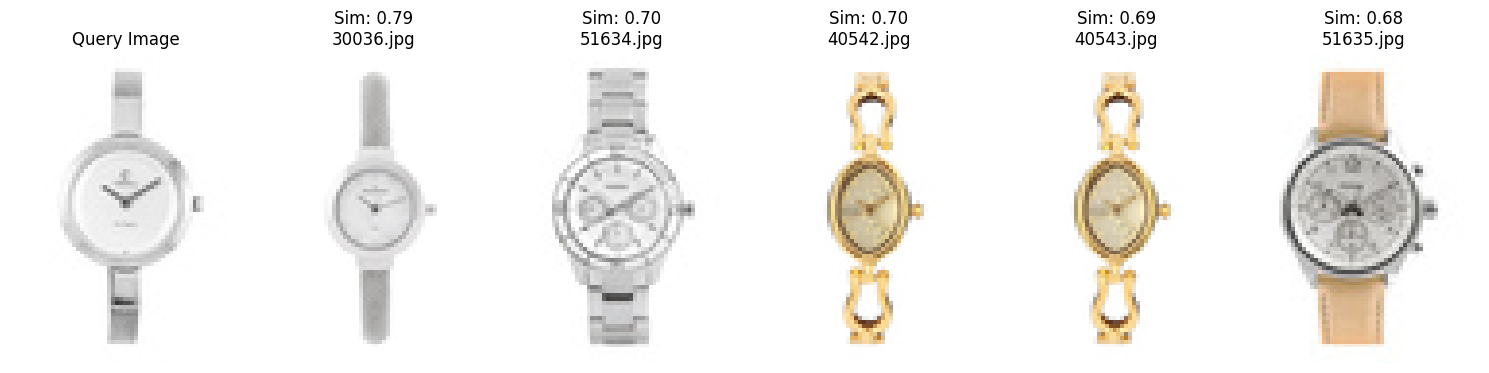

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths
image_folder_path = r"D:\AI stylies\images"  # Path to images
csv_file_path = r"D:\AI stylies\updated_styles_5000.csv"  # Path to CSV
embeddings_path = r"D:\AI stylies\image_embeddings_densenet.npy"  # Path to DenseNet embeddings

# Load the CSV
df = pd.read_csv(csv_file_path)
image_names = df['image_name'].tolist()

# Load pre-trained DenseNet model (only for feature extraction)
densenet_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Function to extract DenseNet embeddings
def extract_densenet_embedding(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = densenet_model.predict(img_array)
        return features.flatten()
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Generate embeddings for all images (if needed)
def generate_embeddings():
    embeddings = []
    for image_name in image_names:
        image_path = os.path.join(image_folder_path, image_name)
        if os.path.exists(image_path):
            embedding = extract_densenet_embedding(image_path)
            if embedding is not None:
                embeddings.append(embedding)
    return np.array(embeddings)

# Generate embeddings if the file does not exist
if not os.path.exists(embeddings_path):
    print("Embeddings file not found. Generating embeddings...")
    embeddings = generate_embeddings()
    np.save(embeddings_path, embeddings)
    print(f"Embeddings saved to: {embeddings_path}")
else:
    embeddings = np.load(embeddings_path)
    print("Embeddings loaded successfully.")

# Uncomment this section if embeddings are not precomputed
# embeddings = generate_embeddings()
# np.save(embeddings_path, embeddings)  # Save for future use

# Load precomputed embeddings
embeddings = np.load(embeddings_path)

# Recommendation Function
def recommend_similar_images_densenet(query_image_name, top_n=5):
    if query_image_name not in image_names:
        print(f"Query image not found in the dataset: {query_image_name}")
        return []

    # Find the index of the query image
    query_index = image_names.index(query_image_name)
    query_embedding = embeddings[query_index].reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the query image itself

    # Get the top-n similar images
    similar_images = [(image_names[i], similarities[i]) for i in similar_indices]
    return similar_images

# Display Recommendations
def display_recommendations(query_image_name, top_n=5):
    similar_images = recommend_similar_images_densenet(query_image_name, top_n)
    if not similar_images:
        return

    # Display the query image
    query_image_path = os.path.join(image_folder_path, query_image_name)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(load_img(query_image_path))
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, (img_name, score) in enumerate(similar_images):
        image_path = os.path.join(image_folder_path, img_name)
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(load_img(image_path))
        plt.title(f"Sim: {score:.2f}\n{img_name}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: Test the Recommendation System
query_image = "59263.jpg"  # Replace with a valid image name
display_recommendations(query_image, top_n=5)


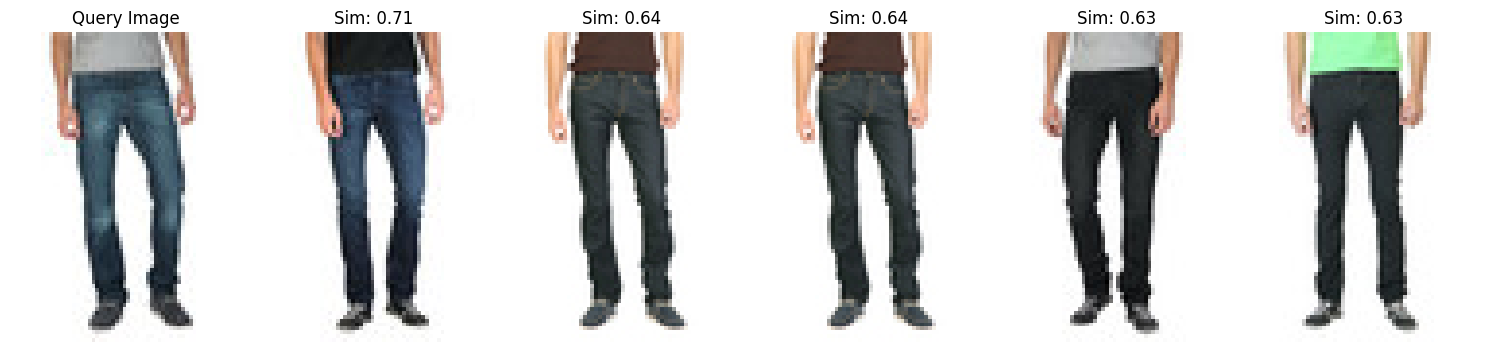

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import load_img

# Paths
image_folder_path = r"D:\AI stylies\images"
csv_file_path = r"D:\AI stylies\updated_styles_5000.csv"
embeddings_path = r"D:\AI stylies\image_embeddings_5000.npy"

# Load the CSV and embeddings
df = pd.read_csv(csv_file_path)
embeddings = np.load(embeddings_path)
valid_image_names = df['image_name'].tolist()

# Step 1: Recommendation Function
def recommend_similar_images(query_image_name, top_n=5):
    # Find the index of the query image
    if query_image_name not in valid_image_names:
        print(f"Query image not found in the dataset: {query_image_name}")
        return []

    query_index = valid_image_names.index(query_image_name)
    query_embedding = embeddings[query_index].reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the query image itself

    # Get the top-n similar images
    similar_images = [(valid_image_names[i], similarities[i]) for i in similar_indices]
    return similar_images

# Step 2: Display Recommendations
def display_recommendations(query_image_name, top_n=5):
    similar_images = recommend_similar_images(query_image_name, top_n)
    if not similar_images:
        return

    # Display the query image
    query_image_path = os.path.join(image_folder_path, query_image_name)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(load_img(query_image_path))
    plt.title("Query Image")
    plt.axis('off')

    # Display similar images
    for i, (img_name, score) in enumerate(similar_images):
        image_path = os.path.join(image_folder_path, img_name)
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(load_img(image_path))
        plt.title(f"Sim: {score:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: Test the Recommendation System
query_image = "39386.jpg"  # Replace with a valid image name
display_recommendations(query_image, top_n=5)


In [11]:
print("15970.jpg" in valid_image_names)


True


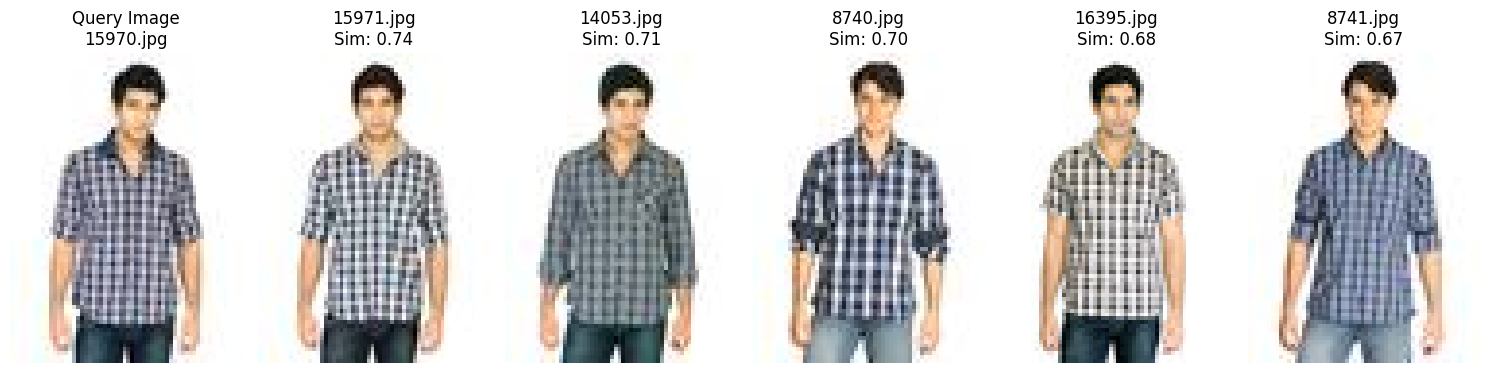

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import load_img

# Paths
image_folder_path = r"D:\AI stylies\images"
csv_file_path = r"D:\AI stylies\updated_styles_5000.csv"
embeddings_path = r"D:\AI stylies\image_embeddings_5000.npy"

# Load the CSV and embeddings
df = pd.read_csv(csv_file_path)
embeddings = np.load(embeddings_path)
valid_image_names = df['image_name'].tolist()

# Step 1: Recommendation Function
def recommend_similar_images(query_image_name, top_n=5):
    # Find the index of the query image
    if query_image_name not in valid_image_names:
        print(f"Query image not found in the dataset: {query_image_name}")
        return []

    query_index = valid_image_names.index(query_image_name)
    query_embedding = embeddings[query_index].reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the query image itself

    # Get the top-n similar images
    similar_images = [(valid_image_names[i], similarities[i]) for i in similar_indices]
    return similar_images

# Step 2: Display Recommendations
def display_recommendations_with_names(query_image_name, top_n=5):
    similar_images = recommend_similar_images(query_image_name, top_n)
    if not similar_images:
        return

    # Display the query image
    query_image_path = os.path.join(image_folder_path, query_image_name)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(load_img(query_image_path))
    plt.title(f"Query Image\n{query_image_name}")
    plt.axis('off')

    # Display similar images with names and similarity scores
    for i, (img_name, score) in enumerate(similar_images):
        image_path = os.path.join(image_folder_path, img_name)
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(load_img(image_path))
        plt.title(f"{img_name}\nSim: {score:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: Test the Recommendation System
query_image = "15970.jpg"  # Replace with a valid image name
display_recommendations_with_names(query_image, top_n=5)



Query Image: 15970.jpg
Query Embedding: [-0. -0. -0. ... -0. -0. -0.]

Recommended Image 1: 15971.jpg
Similarity Score: 0.74
Embedding: [-0.         -0.         -0.         ... -0.          0.53141445
 -0.        ]

Recommended Image 2: 14053.jpg
Similarity Score: 0.71
Embedding: [-0. -0. -0. ... -0. -0. -0.]

Recommended Image 3: 8740.jpg
Similarity Score: 0.70
Embedding: [-0. -0. -0. ... -0. -0. -0.]

Recommended Image 4: 16395.jpg
Similarity Score: 0.68
Embedding: [-0. -0. -0. ... -0. -0. -0.]

Recommended Image 5: 8741.jpg
Similarity Score: 0.67
Embedding: [-0. -0. -0. ... -0. -0. -0.]



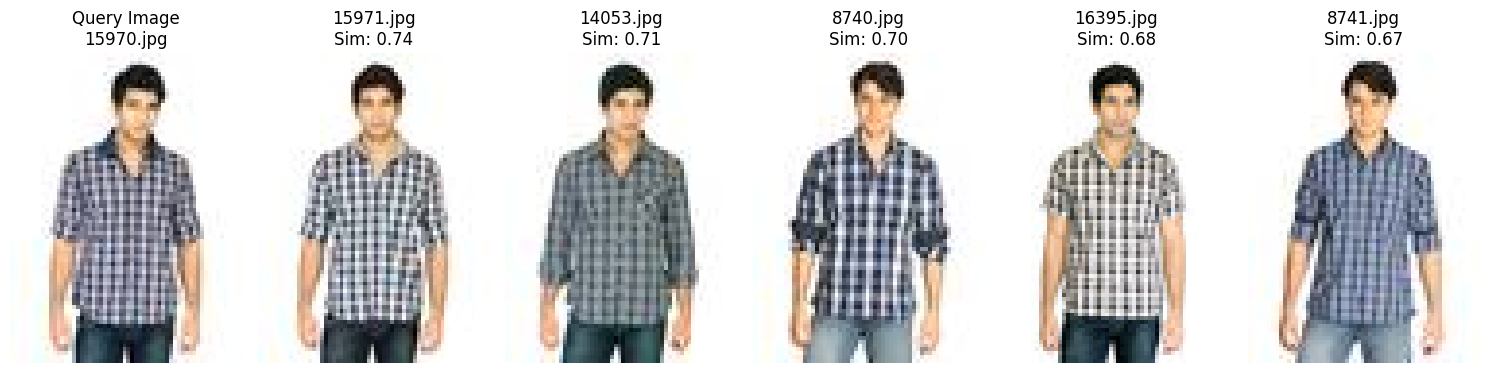

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import load_img

# Paths
image_folder_path = r"D:\AI stylies\images"
csv_file_path = r"D:\AI stylies\updated_styles_5000.csv"
embeddings_path = r"D:\AI stylies\image_embeddings_5000.npy"

# Load the CSV and embeddings
df = pd.read_csv(csv_file_path)
embeddings = np.load(embeddings_path)
valid_image_names = df['image_name'].tolist()

# Step 1: Recommendation Function
def recommend_similar_images(query_image_name, top_n=5):
    # Find the index of the query image
    if query_image_name not in valid_image_names:
        print(f"Query image not found in the dataset: {query_image_name}")
        return []

    query_index = valid_image_names.index(query_image_name)
    query_embedding = embeddings[query_index].reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the query image itself

    # Get the top-n similar images
    similar_images = [(valid_image_names[i], similarities[i], embeddings[i]) for i in similar_indices]
    return query_embedding.flatten(), similar_images

# Step 2: Display Recommendations with Embeddings
def display_recommendations_with_embeddings(query_image_name, top_n=5):
    query_embedding, similar_images = recommend_similar_images(query_image_name, top_n)
    if not similar_images:
        return

    # Print query image embedding
    print(f"\nQuery Image: {query_image_name}")
    print(f"Query Embedding: {query_embedding}\n")

    # Display the query image
    query_image_path = os.path.join(image_folder_path, query_image_name)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(load_img(query_image_path))
    plt.title(f"Query Image\n{query_image_name}")
    plt.axis('off')

    # Display similar images with names, scores, and embeddings
    for i, (img_name, score, embedding) in enumerate(similar_images):
        print(f"Recommended Image {i+1}: {img_name}")
        print(f"Similarity Score: {score:.2f}")
        print(f"Embedding: {embedding}\n")
        
        image_path = os.path.join(image_folder_path, img_name)
        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(load_img(image_path))
        plt.title(f"{img_name}\nSim: {score:.2f}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: Test the Recommendation System
query_image = "15970.jpg"  # Replace with a valid image name
display_recommendations_with_embeddings(query_image, top_n=5)
